<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Unet_GRU_model_on_SUBESCO_using_feature_concatenation(mfcc%26mel_spectrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/THSIS/subesco/SUBESCO.zip'

Streaming output truncated to the last 5000 lines.
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_4.wav  
  inf

In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
subescoSER = "/content/SUBESCO/"
subescoSER_directory_list = os.listdir(subescoSER)
subescoSER_directory_list

['F_10_FAHMEE_S_7_HAPPY_3.wav',
 'M_02_NIPUN_S_1_SAD_3.wav',
 'M_07_SIBLY_S_4_HAPPY_5.wav',
 'M_07_SIBLY_S_4_NEUTRAL_4.wav',
 'M_09_SHUMANTA_S_10_FEAR_5.wav',
 'M_08_PRASUN_S_1_SURPRISE_1.wav',
 'F_10_FAHMEE_S_3_DISGUST_4.wav',
 'F_08_JOYEETA_S_8_DISGUST_4.wav',
 'F_05_MOUNI_S_3_NEUTRAL_4.wav',
 'M_03_ILIAS_S_3_DISGUST_4.wav',
 'M_01_BASHIR_S_4_DISGUST_2.wav',
 'M_02_NIPUN_S_7_NEUTRAL_1.wav',
 'M_01_BASHIR_S_1_SURPRISE_2.wav',
 'F_10_FAHMEE_S_4_SURPRISE_3.wav',
 'F_07_TITHI_S_6_HAPPY_4.wav',
 'F_01_OISHI_S_4_HAPPY_2.wav',
 'M_05_DURANTO_S_3_NEUTRAL_4.wav',
 'M_03_ILIAS_S_5_DISGUST_2.wav',
 'M_09_SHUMANTA_S_1_NEUTRAL_1.wav',
 'F_10_FAHMEE_S_4_SURPRISE_1.wav',
 'F_03_SMITA_S_6_SURPRISE_5.wav',
 'M_06_SHUKANTO_S_7_FEAR_2.wav',
 'M_06_SHUKANTO_S_7_SAD_3.wav',
 'F_08_JOYEETA_S_6_SURPRISE_4.wav',
 'F_01_OISHI_S_4_HAPPY_4.wav',
 'F_05_MOUNI_S_2_SURPRISE_4.wav',
 'M_09_SHUMANTA_S_5_HAPPY_3.wav',
 'M_07_SIBLY_S_8_DISGUST_2.wav',
 'F_08_JOYEETA_S_7_HAPPY_5.wav',
 'M_05_DURANTO_S_8_ANGRY_1.wav',


In [ ]:
# Ravdess preprocess
file_path = []
file_emotion = []
for directory in subescoSER_directory_list :
    # print(directory)
    part1 = directory.split('_')[5]
    # print(part1)
    # part2 = part1.split('-')
    # # print(part2)
    #  # # third part in each file represents the emotion associated to that file
    file_emotion.append(part1)
    # print(file_emotion)
    file_path.append(subescoSER + directory)
    # print(file_path)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
subescoSER_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
# subescoSER_df.Emotions.replace({1:'angry', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}, inplace=True)
subescoSER_df.head()

,Emotions,Path
0,HAPPY,/content/SUBESCO/F_10_FAHMEE_S_7_HAPPY_3.wav
1,SAD,/content/SUBESCO/M_02_NIPUN_S_1_SAD_3.wav
2,HAPPY,/content/SUBESCO/M_07_SIBLY_S_4_HAPPY_5.wav
3,NEUTRAL,/content/SUBESCO/M_07_SIBLY_S_4_NEUTRAL_4.wav
4,FEAR,/content/SUBESCO/M_09_SHUMANTA_S_10_FEAR_5.wav


In [ ]:
subescoSER_df.Emotions.value_counts()

HAPPY       1000
SAD         1000
NEUTRAL     1000
FEAR        1000
SURPRISE    1000
DISGUST     1000
ANGRY       1000
Name: Emotions, dtype: int64

In [ ]:
subescoSER_df

,Emotions,Path
0,HAPPY,/content/SUBESCO/F_10_FAHMEE_S_7_HAPPY_3.wav
1,SAD,/content/SUBESCO/M_02_NIPUN_S_1_SAD_3.wav
2,HAPPY,/content/SUBESCO/M_07_SIBLY_S_4_HAPPY_5.wav
3,NEUTRAL,/content/SUBESCO/M_07_SIBLY_S_4_NEUTRAL_4.wav
4,FEAR,/content/SUBESCO/M_09_SHUMANTA_S_10_FEAR_5.wav
...,...,...
6995,SURPRISE,/content/SUBESCO/M_03_ILIAS_S_4_SURPRISE_4.wav
6996,FEAR,/content/SUBESCO/M_07_SIBLY_S_8_FEAR_2.wav
6997,HAPPY,/content/SUBESCO/F_03_SMITA_S_6_HAPPY_2.wav
6998,SURPRISE,/content/SUBESCO/M_08_PRASUN_S_5_SURPRISE_3.wav


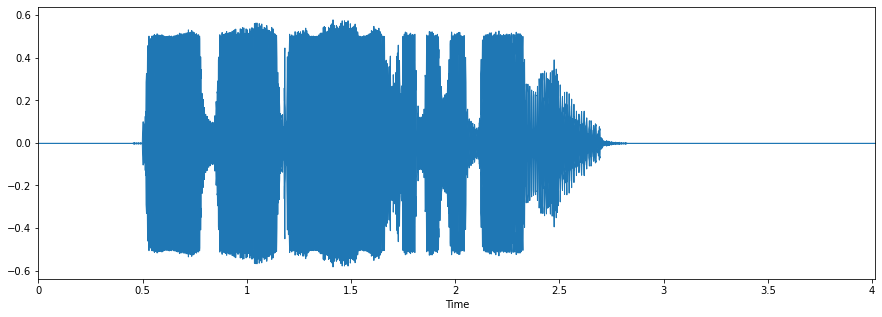

In [ ]:
# Use one audio file in previous parts again
fname = file_path[200]
data, sampling_rate = librosa.load(fname,sr=16000)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
IPython.display.Audio(data, rate=sampling_rate)

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=16000,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

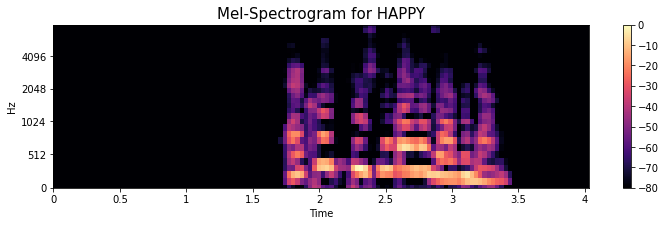

In [ ]:
emotion='HAPPY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=4)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

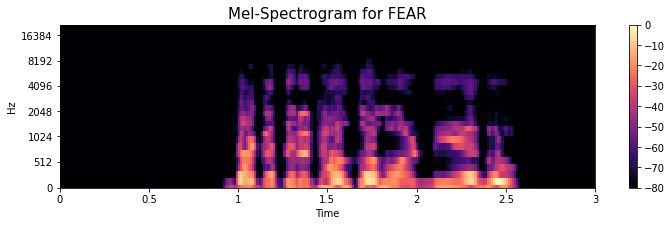

In [ ]:
emotion='FEAR'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=44000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=128)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

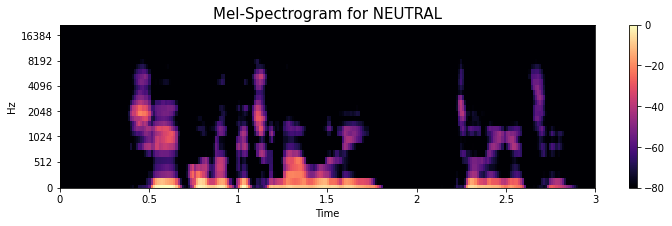

In [ ]:
emotion='NEUTRAL'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=44000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

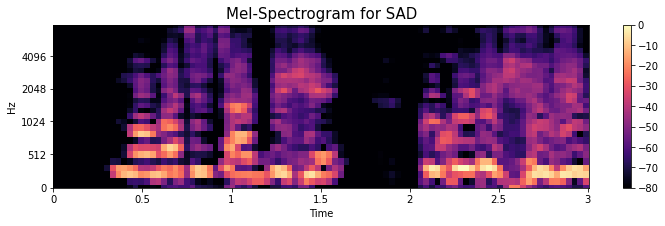

In [ ]:
emotion='SAD'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

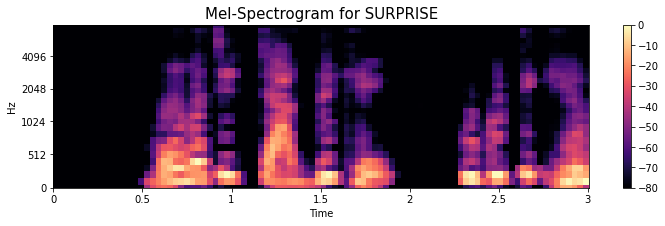

In [ ]:
emotion='SURPRISE'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

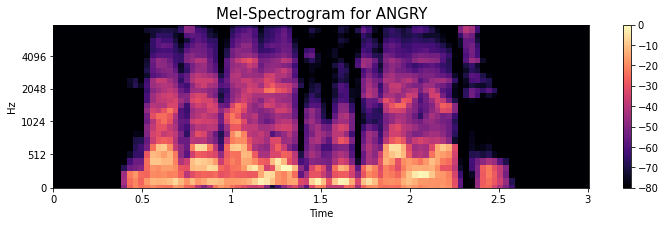

In [ ]:
emotion='ANGRY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

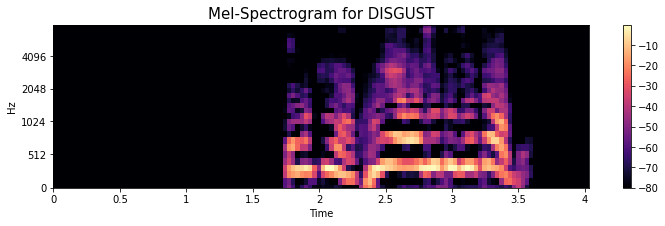

In [ ]:
emotion='DISGUST'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=4)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=512,hop_length=256, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_fft=2048, hop_length=512,n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel=prepare_data(subescoSER_df,n=60,mfcc=1,mel=1)

  0%|          | 2/7000 [00:00<19:01,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 3/7000 [00:00<25:41,  4.54it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 5/7000 [00:01<24:52,  4.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 7/7000 [00:01<25:01,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 9/7000 [00:01<22:22,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 11/7000 [00:02<22:20,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 13/7000 [00:02<22:04,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 15/7000 [00:02<20:41,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 17/7000 [00:03<21:30,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 19/7000 [00:03<20:28,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 21/7000 [00:04<21:08,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 23/7000 [00:04<19:10,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 25/7000 [00:04<19:35,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 27/7000 [00:04<19:28,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 29/7000 [00:05<18:44,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 31/7000 [00:05<21:07,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 33/7000 [00:06<19:23,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 35/7000 [00:06<20:36,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 37/7000 [00:06<19:37,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 39/7000 [00:07<20:51,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 41/7000 [00:07<20:04,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 43/7000 [00:07<19:48,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 45/7000 [00:08<19:23,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 47/7000 [00:08<18:14,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 49/7000 [00:08<19:50,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 51/7000 [00:09<19:33,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 53/7000 [00:09<20:48,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 55/7000 [00:09<19:52,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 57/7000 [00:10<19:55,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 59/7000 [00:10<21:08,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 61/7000 [00:10<20:22,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 63/7000 [00:11<19:50,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 65/7000 [00:11<20:50,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 67/7000 [00:12<21:14,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 68/7000 [00:12<24:57,  4.63it/s]

mfcc_logspec (60, 94, 1)


  1%|          | 69/7000 [00:12<27:48,  4.15it/s]

mfcc_logspec (60, 94, 1)


  1%|          | 71/7000 [00:13<27:31,  4.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 73/7000 [00:13<23:08,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 74/7000 [00:13<22:52,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

  1%|          | 76/7000 [00:14<22:39,  5.09it/s]


mfcc_logspec (60, 94, 1)


  1%|          | 78/7000 [00:14<20:47,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 80/7000 [00:14<18:33,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 82/7000 [00:15<20:03,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 84/7000 [00:15<19:41,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 86/7000 [00:15<20:28,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 88/7000 [00:16<20:24,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 90/7000 [00:16<20:08,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 92/7000 [00:16<20:48,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 94/7000 [00:17<20:07,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 96/7000 [00:17<19:29,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 98/7000 [00:17<19:56,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 99/7000 [00:18<20:28,  5.62it/s]

mfcc_logspec (60, 94, 1)


  1%|▏         | 101/7000 [00:18<21:27,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 103/7000 [00:18<20:27,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 105/7000 [00:19<21:31,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 107/7000 [00:19<21:31,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 109/7000 [00:19<20:03,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 111/7000 [00:20<19:41,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 113/7000 [00:20<19:12,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 115/7000 [00:20<19:09,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 117/7000 [00:21<19:18,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 119/7000 [00:21<19:11,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 121/7000 [00:21<19:30,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 123/7000 [00:22<19:45,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 125/7000 [00:22<20:47,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 127/7000 [00:22<18:46,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 129/7000 [00:23<20:26,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 130/7000 [00:23<20:51,  5.49it/s]

mfcc_logspec (60, 94, 1)


  2%|▏         | 131/7000 [00:23<25:08,  4.55it/s]

mfcc_logspec (60, 94, 1)


  2%|▏         | 132/7000 [00:24<27:14,  4.20it/s]

mfcc_logspec (60, 94, 1)


  2%|▏         | 133/7000 [00:24<30:13,  3.79it/s]

mfcc_logspec (60, 94, 1)


  2%|▏         | 135/7000 [00:24<25:42,  4.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 137/7000 [00:25<22:44,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 139/7000 [00:25<21:07,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 141/7000 [00:25<21:15,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 143/7000 [00:26<21:19,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 145/7000 [00:26<20:41,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 147/7000 [00:26<21:04,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 148/7000 [00:27<21:23,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

  2%|▏         | 149/7000 [00:27<21:51,  5.22it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)

  2%|▏         | 151/7000 [00:27<20:32,  5.56it/s]


mfcc_logspec (60, 94, 1)


  2%|▏         | 153/7000 [00:28<20:59,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 155/7000 [00:28<21:30,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 157/7000 [00:28<21:11,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 159/7000 [00:29<21:14,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 161/7000 [00:29<21:33,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 163/7000 [00:29<20:47,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 165/7000 [00:30<20:56,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 167/7000 [00:30<21:40,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 169/7000 [00:31<20:36,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 171/7000 [00:31<20:54,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 173/7000 [00:31<21:12,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▎         | 175/7000 [00:32<21:26,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 177/7000 [00:32<21:39,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 179/7000 [00:32<20:09,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 181/7000 [00:33<20:49,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 183/7000 [00:33<20:02,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 185/7000 [00:33<19:24,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 187/7000 [00:34<20:40,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 189/7000 [00:34<19:40,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 191/7000 [00:34<19:23,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 193/7000 [00:35<20:13,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 195/7000 [00:35<18:47,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 197/7000 [00:35<18:44,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 199/7000 [00:36<18:56,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 201/7000 [00:36<20:09,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 203/7000 [00:37<19:56,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 205/7000 [00:37<19:19,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 207/7000 [00:37<20:34,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 209/7000 [00:38<19:34,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 211/7000 [00:38<18:59,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 213/7000 [00:38<20:19,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 215/7000 [00:39<20:37,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 217/7000 [00:39<20:02,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 219/7000 [00:39<19:39,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 221/7000 [00:40<19:05,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 223/7000 [00:40<19:14,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 225/7000 [00:40<20:11,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 227/7000 [00:41<19:27,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 229/7000 [00:41<19:32,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 231/7000 [00:41<20:34,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 233/7000 [00:42<18:34,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 235/7000 [00:42<20:04,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 237/7000 [00:42<18:32,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 239/7000 [00:43<19:59,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 241/7000 [00:43<19:52,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 243/7000 [00:44<20:45,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 245/7000 [00:44<19:48,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 247/7000 [00:44<19:41,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 249/7000 [00:45<19:10,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 251/7000 [00:45<19:01,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 253/7000 [00:45<19:13,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 255/7000 [00:46<20:03,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 257/7000 [00:46<19:19,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 259/7000 [00:46<20:48,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 261/7000 [00:47<18:39,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 263/7000 [00:47<20:03,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 265/7000 [00:47<19:59,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 267/7000 [00:48<20:39,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 269/7000 [00:48<19:56,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 271/7000 [00:49<20:31,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 273/7000 [00:49<19:54,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 275/7000 [00:49<18:18,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 277/7000 [00:50<19:06,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 279/7000 [00:50<20:09,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 281/7000 [00:50<20:31,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 283/7000 [00:51<19:51,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 285/7000 [00:51<20:05,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 287/7000 [00:51<20:34,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 289/7000 [00:52<18:40,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 291/7000 [00:52<18:21,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 293/7000 [00:52<19:57,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 295/7000 [00:53<18:39,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 296/7000 [00:53<18:05,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 299/7000 [00:53<20:11,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 301/7000 [00:54<19:15,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 303/7000 [00:54<20:10,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 305/7000 [00:54<19:21,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 307/7000 [00:55<20:11,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 309/7000 [00:55<20:22,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 311/7000 [00:56<19:20,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 313/7000 [00:56<19:50,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 315/7000 [00:56<20:23,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 316/7000 [00:57<23:20,  4.77it/s]

mfcc_logspec (60, 94, 1)


  5%|▍         | 317/7000 [00:57<25:25,  4.38it/s]

mfcc_logspec (60, 94, 1)


  5%|▍         | 318/7000 [00:57<29:17,  3.80it/s]

mfcc_logspec (60, 94, 1)


  5%|▍         | 320/7000 [00:58<26:14,  4.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 322/7000 [00:58<23:38,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 324/7000 [00:58<21:16,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 326/7000 [00:59<21:26,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 328/7000 [00:59<21:21,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 330/7000 [01:00<21:02,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 332/7000 [01:00<20:16,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 334/7000 [01:00<19:45,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 336/7000 [01:00<18:04,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 338/7000 [01:01<17:07,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 340/7000 [01:01<17:42,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 342/7000 [01:01<18:40,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 344/7000 [01:02<19:30,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 346/7000 [01:02<18:10,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 348/7000 [01:03<19:32,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 350/7000 [01:03<19:05,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 352/7000 [01:03<20:34,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 354/7000 [01:04<19:35,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 356/7000 [01:04<18:45,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 358/7000 [01:04<18:14,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 360/7000 [01:05<18:18,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 362/7000 [01:05<18:39,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 364/7000 [01:05<20:08,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 366/7000 [01:06<18:55,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 368/7000 [01:06<19:11,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 370/7000 [01:06<18:36,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 372/7000 [01:07<18:02,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 374/7000 [01:07<19:45,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 376/7000 [01:07<20:00,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 378/7000 [01:08<20:15,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 379/7000 [01:08<20:19,  5.43it/s]

mfcc_logspec (60, 94, 1)


  5%|▌         | 380/7000 [01:08<22:48,  4.84it/s]

mfcc_logspec (60, 94, 1)


  5%|▌         | 382/7000 [01:09<24:27,  4.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 384/7000 [01:09<24:44,  4.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 386/7000 [01:09<21:40,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 388/7000 [01:10<21:13,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 390/7000 [01:10<20:58,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 392/7000 [01:11<19:51,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 394/7000 [01:11<19:12,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 396/7000 [01:11<18:37,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 398/7000 [01:12<19:46,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 400/7000 [01:12<19:02,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 402/7000 [01:12<17:47,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 404/7000 [01:13<16:53,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 406/7000 [01:13<17:22,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 408/7000 [01:13<19:24,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 410/7000 [01:14<18:42,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 412/7000 [01:14<19:40,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 414/7000 [01:14<19:26,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 416/7000 [01:15<20:24,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 418/7000 [01:15<20:33,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 420/7000 [01:15<20:50,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 422/7000 [01:16<18:06,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 424/7000 [01:16<19:38,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 426/7000 [01:16<18:00,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 428/7000 [01:17<19:18,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 430/7000 [01:17<18:51,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 432/7000 [01:17<18:27,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 434/7000 [01:18<18:33,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 436/7000 [01:18<19:29,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 438/7000 [01:19<18:47,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 440/7000 [01:19<18:37,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 442/7000 [01:19<18:23,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 443/7000 [01:19<19:20,  5.65it/s]

mfcc_logspec (60, 94, 1)


  6%|▋         | 444/7000 [01:20<22:33,  4.84it/s]

mfcc_logspec (60, 94, 1)


  6%|▋         | 445/7000 [01:20<23:55,  4.57it/s]

mfcc_logspec (60, 94, 1)


  6%|▋         | 446/7000 [01:20<23:30,  4.65it/s]

mfcc_logspec (60, 94, 1)


  6%|▋         | 447/7000 [01:20<25:43,  4.24it/s]

mfcc_logspec (60, 94, 1)


  6%|▋         | 449/7000 [01:21<23:29,  4.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 451/7000 [01:21<21:48,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 453/7000 [01:22<21:26,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 455/7000 [01:22<20:56,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 457/7000 [01:22<20:51,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 459/7000 [01:23<20:44,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 461/7000 [01:23<19:30,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 463/7000 [01:23<19:25,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 465/7000 [01:24<20:09,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 467/7000 [01:24<18:04,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 469/7000 [01:24<18:18,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 471/7000 [01:25<19:16,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 473/7000 [01:25<18:34,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 475/7000 [01:25<18:23,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 477/7000 [01:26<18:37,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 479/7000 [01:26<19:56,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 481/7000 [01:27<18:53,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 483/7000 [01:27<19:42,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 485/7000 [01:27<19:18,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 486/7000 [01:27<18:34,  5.84it/s]

mfcc_logspec (60, 94, 1)


  7%|▋         | 488/7000 [01:28<19:03,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 490/7000 [01:28<19:43,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 492/7000 [01:28<17:53,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 494/7000 [01:29<18:40,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 496/7000 [01:29<18:24,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 498/7000 [01:29<18:31,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 500/7000 [01:30<17:27,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 502/7000 [01:30<17:52,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 504/7000 [01:30<16:55,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 506/7000 [01:31<18:51,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 507/7000 [01:31<17:50,  6.06it/s]

mfcc_logspec (60, 94, 1)


  7%|▋         | 508/7000 [01:31<20:59,  5.16it/s]

mfcc_logspec (60, 94, 1)


  7%|▋         | 509/7000 [01:31<23:19,  4.64it/s]

mfcc_logspec (60, 94, 1)


  7%|▋         | 510/7000 [01:32<27:26,  3.94it/s]

mfcc_logspec (60, 94, 1)


  7%|▋         | 512/7000 [01:32<24:27,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 514/7000 [01:33<22:00,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 516/7000 [01:33<21:03,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 518/7000 [01:33<20:48,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 520/7000 [01:34<20:34,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 522/7000 [01:34<19:07,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 524/7000 [01:34<17:13,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 526/7000 [01:35<17:51,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 528/7000 [01:35<19:15,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 530/7000 [01:35<17:41,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 531/7000 [01:36<18:38,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 534/7000 [01:36<20:21,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 536/7000 [01:36<19:13,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 538/7000 [01:37<18:17,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 540/7000 [01:37<16:51,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 542/7000 [01:37<18:22,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 544/7000 [01:38<18:00,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 546/7000 [01:38<19:02,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 548/7000 [01:39<19:34,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 550/7000 [01:39<18:43,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 552/7000 [01:39<18:55,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 554/7000 [01:40<17:18,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 556/7000 [01:40<17:56,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 558/7000 [01:40<18:54,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 560/7000 [01:41<18:27,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 562/7000 [01:41<19:20,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 564/7000 [01:41<18:32,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 566/7000 [01:42<19:30,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 568/7000 [01:42<19:51,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 570/7000 [01:42<19:54,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 572/7000 [01:43<19:29,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 573/7000 [01:43<24:49,  4.31it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 574/7000 [01:43<24:31,  4.37it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 576/7000 [01:44<24:08,  4.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 578/7000 [01:44<22:03,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 580/7000 [01:45<20:13,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 582/7000 [01:45<19:09,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 584/7000 [01:45<19:44,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 586/7000 [01:46<20:14,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 588/7000 [01:46<18:52,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 590/7000 [01:46<18:05,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 592/7000 [01:47<19:12,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 594/7000 [01:47<18:06,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 596/7000 [01:47<17:39,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 598/7000 [01:48<18:00,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 600/7000 [01:48<19:01,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 602/7000 [01:48<18:27,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 604/7000 [01:49<17:57,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 606/7000 [01:49<17:37,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 608/7000 [01:49<17:28,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 610/7000 [01:50<19:11,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 612/7000 [01:50<18:42,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 614/7000 [01:50<18:41,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 616/7000 [01:51<18:55,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 618/7000 [01:51<19:37,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 620/7000 [01:52<18:45,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 622/7000 [01:52<19:36,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 624/7000 [01:52<18:37,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 626/7000 [01:53<18:46,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 628/7000 [01:53<18:38,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 630/7000 [01:53<18:12,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 632/7000 [01:54<18:13,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 634/7000 [01:54<17:37,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 636/7000 [01:54<17:50,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 637/7000 [01:55<20:37,  5.14it/s]

mfcc_logspec (60, 94, 1)


  9%|▉         | 638/7000 [01:55<22:51,  4.64it/s]

mfcc_logspec (60, 94, 1)


  9%|▉         | 639/7000 [01:55<23:22,  4.53it/s]

mfcc_logspec (60, 94, 1)


  9%|▉         | 641/7000 [01:55<22:49,  4.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 643/7000 [01:56<20:09,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 645/7000 [01:56<17:53,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 647/7000 [01:56<16:49,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 649/7000 [01:57<17:28,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 650/7000 [01:57<16:57,  6.24it/s]

mfcc_logspec (60, 94, 1)


  9%|▉         | 652/7000 [01:57<17:52,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 654/7000 [01:58<18:57,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 656/7000 [01:58<17:06,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 658/7000 [01:58<18:05,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 660/7000 [01:59<18:10,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 662/7000 [01:59<19:15,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 664/7000 [01:59<19:34,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 666/7000 [02:00<18:34,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 668/7000 [02:00<18:21,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 670/7000 [02:00<16:51,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 672/7000 [02:01<18:16,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 673/7000 [02:01<19:11,  5.50it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 674/7000 [02:01<22:01,  4.79it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 675/7000 [02:02<24:49,  4.25it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 676/7000 [02:02<26:58,  3.91it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 677/7000 [02:02<28:36,  3.68it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 678/7000 [02:02<29:27,  3.58it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 679/7000 [02:03<30:10,  3.49it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 680/7000 [02:03<31:15,  3.37it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 681/7000 [02:03<31:44,  3.32it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 682/7000 [02:04<30:38,  3.44it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 683/7000 [02:04<28:22,  3.71it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 684/7000 [02:04<29:50,  3.53it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 685/7000 [02:05<31:03,  3.39it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 687/7000 [02:05<26:02,  4.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 689/7000 [02:05<23:16,  4.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 690/7000 [02:05<21:24,  4.91it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 691/7000 [02:06<23:12,  4.53it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 692/7000 [02:06<26:47,  3.93it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 693/7000 [02:06<28:28,  3.69it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 694/7000 [02:07<34:14,  3.07it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 695/7000 [02:07<32:05,  3.27it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 696/7000 [02:07<31:54,  3.29it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 697/7000 [02:08<32:02,  3.28it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 698/7000 [02:08<29:21,  3.58it/s]

mfcc_logspec (60, 94, 1)


 10%|▉         | 699/7000 [02:08<30:52,  3.40it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 700/7000 [02:08<28:38,  3.67it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 701/7000 [02:09<29:21,  3.58it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 702/7000 [02:09<29:57,  3.50it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 703/7000 [02:09<30:44,  3.41it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 704/7000 [02:10<31:18,  3.35it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 705/7000 [02:10<28:45,  3.65it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 706/7000 [02:10<29:46,  3.52it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 707/7000 [02:11<30:26,  3.45it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 708/7000 [02:11<31:06,  3.37it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 709/7000 [02:11<31:22,  3.34it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 710/7000 [02:11<31:32,  3.32it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 711/7000 [02:12<31:46,  3.30it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 712/7000 [02:12<31:13,  3.36it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 713/7000 [02:12<32:28,  3.23it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 714/7000 [02:13<30:05,  3.48it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 715/7000 [02:13<28:14,  3.71it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 716/7000 [02:13<30:18,  3.46it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 718/7000 [02:14<25:30,  4.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 720/7000 [02:14<22:41,  4.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 722/7000 [02:14<20:34,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 724/7000 [02:15<19:06,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 726/7000 [02:15<18:22,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 728/7000 [02:15<17:06,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 730/7000 [02:16<18:33,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 732/7000 [02:16<19:16,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 734/7000 [02:16<18:52,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 736/7000 [02:17<17:31,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 738/7000 [02:17<17:32,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 740/7000 [02:17<18:41,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 742/7000 [02:18<17:23,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 743/7000 [02:18<21:57,  4.75it/s]

mfcc_logspec (60, 94, 1)


 11%|█         | 745/7000 [02:19<24:54,  4.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 747/7000 [02:19<22:07,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 749/7000 [02:19<19:40,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 751/7000 [02:20<19:00,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 753/7000 [02:20<17:16,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 755/7000 [02:20<17:40,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 756/7000 [02:20<18:28,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 759/7000 [02:21<18:24,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 761/7000 [02:21<19:18,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 763/7000 [02:22<19:56,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 765/7000 [02:22<18:40,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 767/7000 [02:23<18:12,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 769/7000 [02:23<18:53,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 771/7000 [02:23<18:58,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 773/7000 [02:24<18:21,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 775/7000 [02:24<18:41,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 777/7000 [02:24<16:43,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 779/7000 [02:25<17:18,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 781/7000 [02:25<16:44,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 783/7000 [02:25<16:54,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 785/7000 [02:26<17:15,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 787/7000 [02:26<18:30,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 789/7000 [02:26<17:39,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 791/7000 [02:27<17:44,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 793/7000 [02:27<17:25,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 795/7000 [02:27<18:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 797/7000 [02:28<17:58,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 799/7000 [02:28<17:53,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 801/7000 [02:28<17:44,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 803/7000 [02:29<17:37,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 805/7000 [02:29<16:17,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 807/7000 [02:29<17:41,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 808/7000 [02:30<21:29,  4.80it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 809/7000 [02:30<26:17,  3.93it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 811/7000 [02:30<24:37,  4.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 813/7000 [02:31<21:59,  4.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 815/7000 [02:31<20:39,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 817/7000 [02:32<20:18,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 819/7000 [02:32<19:37,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 821/7000 [02:32<18:01,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 823/7000 [02:33<17:43,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 825/7000 [02:33<18:30,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 827/7000 [02:33<19:02,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 829/7000 [02:34<19:02,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 831/7000 [02:34<17:29,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 833/7000 [02:34<16:08,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 835/7000 [02:35<17:40,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 837/7000 [02:35<16:07,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 839/7000 [02:35<16:51,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 841/7000 [02:36<18:29,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 843/7000 [02:36<19:16,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 845/7000 [02:37<19:25,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 847/7000 [02:37<18:30,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 849/7000 [02:37<19:10,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 851/7000 [02:38<17:03,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 853/7000 [02:38<16:39,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 855/7000 [02:38<17:05,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 857/7000 [02:39<16:17,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 859/7000 [02:39<16:49,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 860/7000 [02:39<17:39,  5.79it/s]

mfcc_logspec (60, 94, 1)


 12%|█▏        | 862/7000 [02:39<18:58,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 864/7000 [02:40<18:31,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 866/7000 [02:40<16:55,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 868/7000 [02:40<17:01,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 870/7000 [02:41<16:51,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 872/7000 [02:41<17:12,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 873/7000 [02:41<22:56,  4.45it/s]

mfcc_logspec (60, 94, 1)


 12%|█▎        | 875/7000 [02:42<21:21,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 877/7000 [02:42<21:48,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 879/7000 [02:43<20:36,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 881/7000 [02:43<19:06,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 883/7000 [02:43<19:02,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 885/7000 [02:44<18:15,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 887/7000 [02:44<17:58,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 889/7000 [02:44<17:39,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 891/7000 [02:45<17:39,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 893/7000 [02:45<18:25,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 895/7000 [02:46<18:51,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 897/7000 [02:46<19:19,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 899/7000 [02:46<17:58,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 901/7000 [02:47<18:57,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 903/7000 [02:47<17:10,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 905/7000 [02:47<17:31,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 907/7000 [02:48<16:23,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 909/7000 [02:48<15:55,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 911/7000 [02:48<16:39,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 913/7000 [02:49<16:56,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 915/7000 [02:49<18:26,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 917/7000 [02:49<17:39,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 919/7000 [02:50<17:33,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 921/7000 [02:50<17:34,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 923/7000 [02:50<18:23,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 925/7000 [02:51<16:38,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 927/7000 [02:51<18:00,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 929/7000 [02:51<18:25,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 930/7000 [02:52<17:11,  5.88it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 932/7000 [02:52<18:28,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 934/7000 [02:52<17:28,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 936/7000 [02:53<16:51,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 937/7000 [02:53<20:53,  4.84it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 938/7000 [02:53<22:52,  4.42it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 940/7000 [02:54<23:23,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 942/7000 [02:54<19:12,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 944/7000 [02:54<16:54,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 946/7000 [02:55<16:34,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 948/7000 [02:55<18:11,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 950/7000 [02:55<17:22,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 952/7000 [02:56<18:20,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 954/7000 [02:56<18:27,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 956/7000 [02:56<18:43,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 958/7000 [02:57<16:50,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 960/7000 [02:57<18:01,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 962/7000 [02:58<18:14,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 964/7000 [02:58<18:49,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 966/7000 [02:58<17:35,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 968/7000 [02:59<17:38,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 970/7000 [02:59<18:42,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 972/7000 [02:59<18:42,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 974/7000 [03:00<17:25,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 976/7000 [03:00<17:10,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 978/7000 [03:00<17:50,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 980/7000 [03:01<17:00,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 981/7000 [03:01<17:38,  5.69it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 983/7000 [03:01<18:31,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 985/7000 [03:02<17:40,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 987/7000 [03:02<16:27,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 989/7000 [03:02<17:40,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 991/7000 [03:03<18:01,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 993/7000 [03:03<17:00,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 995/7000 [03:03<18:23,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 997/7000 [03:04<17:09,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 999/7000 [03:04<16:58,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1000/7000 [03:04<21:33,  4.64it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 1001/7000 [03:05<22:29,  4.45it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 1002/7000 [03:05<24:41,  4.05it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 1004/7000 [03:05<20:57,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1006/7000 [03:06<19:13,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1008/7000 [03:06<18:37,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1010/7000 [03:06<19:08,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1012/7000 [03:07<17:49,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1014/7000 [03:07<17:12,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1016/7000 [03:07<17:35,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1018/7000 [03:08<17:00,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1020/7000 [03:08<17:29,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1022/7000 [03:08<16:23,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1023/7000 [03:09<17:10,  5.80it/s]

mfcc_logspec (60, 94, 1)


 15%|█▍        | 1025/7000 [03:09<18:31,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1027/7000 [03:09<18:27,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1029/7000 [03:10<18:36,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1031/7000 [03:10<16:37,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1033/7000 [03:10<17:41,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1035/7000 [03:11<17:02,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1037/7000 [03:11<16:34,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1039/7000 [03:12<17:32,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1041/7000 [03:12<17:25,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1043/7000 [03:12<17:01,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1045/7000 [03:13<16:43,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1047/7000 [03:13<18:07,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1049/7000 [03:13<17:20,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1051/7000 [03:14<16:42,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1053/7000 [03:14<17:06,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1055/7000 [03:14<17:45,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1057/7000 [03:15<17:14,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1059/7000 [03:15<16:55,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1061/7000 [03:15<17:48,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1063/7000 [03:16<16:49,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1064/7000 [03:16<15:58,  6.19it/s]

mfcc_logspec (60, 94, 1)


 15%|█▌        | 1065/7000 [03:16<20:55,  4.73it/s]

mfcc_logspec (60, 94, 1)


 15%|█▌        | 1066/7000 [03:17<24:46,  3.99it/s]

mfcc_logspec (60, 94, 1)


 15%|█▌        | 1068/7000 [03:17<22:03,  4.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1069/7000 [03:17<21:13,  4.66it/s]

mfcc_logspec (60, 94, 1)


 15%|█▌        | 1071/7000 [03:18<20:42,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1073/7000 [03:18<18:50,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1075/7000 [03:18<19:06,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1077/7000 [03:19<18:44,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1079/7000 [03:19<18:46,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1081/7000 [03:19<19:01,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1083/7000 [03:20<17:00,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1085/7000 [03:20<18:15,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1087/7000 [03:21<18:52,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1089/7000 [03:21<17:40,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1091/7000 [03:21<17:12,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1093/7000 [03:22<15:44,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1095/7000 [03:22<16:52,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1097/7000 [03:22<16:26,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1099/7000 [03:23<17:48,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1101/7000 [03:23<17:57,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1103/7000 [03:23<16:14,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1105/7000 [03:24<17:25,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1107/7000 [03:24<16:35,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1109/7000 [03:24<16:18,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1111/7000 [03:25<16:12,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1113/7000 [03:25<17:18,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1115/7000 [03:25<16:52,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1117/7000 [03:26<16:25,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1119/7000 [03:26<16:48,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1121/7000 [03:26<18:03,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1123/7000 [03:27<17:24,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1124/7000 [03:27<16:40,  5.87it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 1126/7000 [03:27<16:43,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1127/7000 [03:28<18:04,  5.42it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 1128/7000 [03:28<22:35,  4.33it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 1129/7000 [03:28<24:06,  4.06it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 1131/7000 [03:29<22:01,  4.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1133/7000 [03:29<19:27,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1135/7000 [03:29<19:10,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1137/7000 [03:30<16:46,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1139/7000 [03:30<16:08,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1141/7000 [03:30<17:25,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1143/7000 [03:31<17:11,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1145/7000 [03:31<16:52,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1147/7000 [03:31<17:28,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1149/7000 [03:32<18:08,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1151/7000 [03:32<17:21,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1153/7000 [03:32<17:58,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1155/7000 [03:33<18:17,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1157/7000 [03:33<18:20,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1159/7000 [03:34<18:38,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1161/7000 [03:34<17:40,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1163/7000 [03:34<18:07,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1165/7000 [03:35<18:23,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1167/7000 [03:35<16:17,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1169/7000 [03:35<16:00,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1171/7000 [03:36<17:09,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1173/7000 [03:36<16:51,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1175/7000 [03:36<16:22,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1177/7000 [03:37<15:35,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1179/7000 [03:37<16:08,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1181/7000 [03:37<17:38,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1183/7000 [03:38<17:24,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1185/7000 [03:38<17:23,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1187/7000 [03:38<17:43,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1189/7000 [03:39<17:13,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1190/7000 [03:39<17:37,  5.49it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1191/7000 [03:39<22:46,  4.25it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1192/7000 [03:40<24:30,  3.95it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1194/7000 [03:40<21:53,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1196/7000 [03:40<18:58,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1198/7000 [03:41<18:30,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1200/7000 [03:41<17:44,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1202/7000 [03:41<15:57,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1204/7000 [03:42<17:23,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1206/7000 [03:42<17:17,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1208/7000 [03:43<17:37,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1210/7000 [03:43<17:45,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1212/7000 [03:43<17:19,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1214/7000 [03:44<16:58,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1216/7000 [03:44<16:44,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1218/7000 [03:44<17:43,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1220/7000 [03:45<17:02,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1222/7000 [03:45<16:51,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1224/7000 [03:45<17:54,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1226/7000 [03:46<16:16,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1228/7000 [03:46<15:56,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1230/7000 [03:46<16:06,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1232/7000 [03:47<17:00,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1234/7000 [03:47<16:47,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1236/7000 [03:47<17:20,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1238/7000 [03:48<17:39,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1240/7000 [03:48<17:54,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1242/7000 [03:49<17:12,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1244/7000 [03:49<16:46,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1246/7000 [03:49<16:37,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1248/7000 [03:50<17:26,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1250/7000 [03:50<16:33,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1252/7000 [03:50<15:25,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1253/7000 [03:50<16:28,  5.82it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1254/7000 [03:51<18:19,  5.23it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1256/7000 [03:51<21:13,  4.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1258/7000 [03:52<21:19,  4.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1260/7000 [03:52<18:38,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1262/7000 [03:52<18:27,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1264/7000 [03:53<18:36,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1266/7000 [03:53<17:37,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1268/7000 [03:54<18:16,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1270/7000 [03:54<17:59,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1272/7000 [03:54<17:13,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1274/7000 [03:55<15:35,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1276/7000 [03:55<16:50,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1278/7000 [03:55<17:34,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1280/7000 [03:56<16:29,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1282/7000 [03:56<15:56,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1284/7000 [03:56<15:49,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1286/7000 [03:57<16:26,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1288/7000 [03:57<17:27,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1290/7000 [03:57<17:43,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1292/7000 [03:58<16:46,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1294/7000 [03:58<17:30,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1295/7000 [03:58<17:35,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1297/7000 [03:59<18:00,  5.28it/s]

mfcc_logspec (60, 94, 1)


 19%|█▊        | 1299/7000 [03:59<17:09,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1301/7000 [03:59<15:39,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1303/7000 [04:00<17:26,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1305/7000 [04:00<17:26,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1307/7000 [04:01<16:34,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1309/7000 [04:01<16:31,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1311/7000 [04:01<17:05,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1312/7000 [04:01<17:16,  5.49it/s]

mfcc_logspec (60, 94, 1)


 19%|█▉        | 1314/7000 [04:02<16:48,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1316/7000 [04:02<17:23,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1317/7000 [04:03<23:02,  4.11it/s]

mfcc_logspec (60, 94, 1)


 19%|█▉        | 1318/7000 [04:03<24:36,  3.85it/s]

mfcc_logspec (60, 94, 1)


 19%|█▉        | 1320/7000 [04:03<21:36,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1322/7000 [04:04<19:38,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1324/7000 [04:04<18:16,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1326/7000 [04:04<17:06,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1328/7000 [04:05<16:43,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1330/7000 [04:05<17:34,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1332/7000 [04:05<18:01,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1333/7000 [04:06<18:13,  5.18it/s]

mfcc_logspec (60, 94, 1)


 19%|█▉        | 1335/7000 [04:06<18:28,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1337/7000 [04:06<17:22,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1339/7000 [04:07<17:45,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1341/7000 [04:07<16:32,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1343/7000 [04:07<14:58,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1345/7000 [04:08<16:17,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1347/7000 [04:08<15:51,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1349/7000 [04:08<16:34,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1351/7000 [04:09<17:04,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1353/7000 [04:09<16:19,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1355/7000 [04:10<16:48,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1357/7000 [04:10<16:07,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1359/7000 [04:10<16:40,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1361/7000 [04:11<16:52,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1363/7000 [04:11<16:04,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1365/7000 [04:11<14:53,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1367/7000 [04:12<14:58,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1368/7000 [04:12<14:35,  6.43it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1370/7000 [04:12<16:35,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1372/7000 [04:12<15:44,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1374/7000 [04:13<15:44,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1375/7000 [04:13<16:42,  5.61it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1377/7000 [04:13<17:38,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1378/7000 [04:14<17:51,  5.25it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1379/7000 [04:14<20:17,  4.62it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1380/7000 [04:14<24:29,  3.82it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1382/7000 [04:15<21:33,  4.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1384/7000 [04:15<18:39,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1386/7000 [04:15<17:26,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1388/7000 [04:16<16:44,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1390/7000 [04:16<15:12,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1392/7000 [04:16<14:39,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1394/7000 [04:17<16:23,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1396/7000 [04:17<16:59,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1398/7000 [04:17<17:28,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1400/7000 [04:18<16:42,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1402/7000 [04:18<17:19,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1403/7000 [04:18<17:35,  5.30it/s]

mfcc_logspec (60, 94, 1)


 20%|██        | 1405/7000 [04:19<17:46,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1407/7000 [04:19<17:00,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1409/7000 [04:19<17:01,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1411/7000 [04:20<16:01,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1413/7000 [04:20<14:51,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1415/7000 [04:20<14:54,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1417/7000 [04:21<15:04,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1419/7000 [04:21<15:17,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1421/7000 [04:21<16:17,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1423/7000 [04:22<15:16,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1425/7000 [04:22<16:52,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1427/7000 [04:22<15:25,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1429/7000 [04:23<16:10,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1430/7000 [04:23<15:55,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 20%|██        | 1432/7000 [04:23<16:05,  5.77it/s]


mfcc_logspec (60, 94, 1)


 20%|██        | 1434/7000 [04:24<15:39,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1436/7000 [04:24<16:35,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1438/7000 [04:24<17:11,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1440/7000 [04:25<17:28,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1442/7000 [04:25<16:50,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1444/7000 [04:26<16:55,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1445/7000 [04:26<19:51,  4.66it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1446/7000 [04:26<24:20,  3.80it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1448/7000 [04:27<23:10,  3.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1450/7000 [04:27<20:37,  4.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1452/7000 [04:27<18:59,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1454/7000 [04:28<18:32,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1456/7000 [04:28<17:22,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1458/7000 [04:29<16:24,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1460/7000 [04:29<16:09,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1462/7000 [04:29<15:44,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1464/7000 [04:30<15:45,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1465/7000 [04:30<14:57,  6.17it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1467/7000 [04:30<15:54,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1469/7000 [04:30<15:38,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1471/7000 [04:31<16:18,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1473/7000 [04:31<16:51,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1475/7000 [04:32<16:57,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1477/7000 [04:32<16:03,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1479/7000 [04:32<14:54,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1481/7000 [04:33<16:15,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1483/7000 [04:33<16:01,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1485/7000 [04:33<16:00,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1487/7000 [04:34<16:04,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1489/7000 [04:34<15:56,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1491/7000 [04:34<15:51,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1493/7000 [04:35<16:24,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1495/7000 [04:35<15:53,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1497/7000 [04:35<15:35,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1499/7000 [04:36<16:36,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1501/7000 [04:36<16:02,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1503/7000 [04:36<16:14,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1505/7000 [04:37<16:55,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1506/7000 [04:37<17:25,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 22%|██▏       | 1507/7000 [04:37<17:46,  5.15it/s]

 (60, 94, 1)


 22%|██▏       | 1508/7000 [04:37<18:29,  4.95it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1509/7000 [04:38<20:32,  4.45it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1511/7000 [04:38<21:11,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1513/7000 [04:39<19:02,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1515/7000 [04:39<15:55,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1517/7000 [04:39<16:43,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1519/7000 [04:40<16:54,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1521/7000 [04:40<16:54,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1523/7000 [04:40<17:10,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1525/7000 [04:41<16:07,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1527/7000 [04:41<16:26,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1529/7000 [04:41<16:59,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1531/7000 [04:42<15:43,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1533/7000 [04:42<16:44,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1535/7000 [04:43<16:53,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1537/7000 [04:43<16:03,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1539/7000 [04:43<17:05,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1541/7000 [04:44<16:51,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1543/7000 [04:44<15:49,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1545/7000 [04:44<16:34,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1547/7000 [04:45<16:34,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1549/7000 [04:45<15:51,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1551/7000 [04:45<14:51,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1553/7000 [04:46<14:50,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1555/7000 [04:46<15:56,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1557/7000 [04:46<15:54,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1559/7000 [04:47<15:21,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1561/7000 [04:47<15:01,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1563/7000 [04:47<16:28,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1565/7000 [04:48<15:28,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1567/7000 [04:48<16:07,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1569/7000 [04:49<16:33,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1570/7000 [04:49<19:29,  4.64it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1571/7000 [04:49<23:11,  3.90it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1573/7000 [04:50<21:11,  4.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▎       | 1575/7000 [04:50<18:28,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1577/7000 [04:50<17:48,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1579/7000 [04:51<17:43,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1581/7000 [04:51<17:19,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1583/7000 [04:52<16:21,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1585/7000 [04:52<16:02,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1587/7000 [04:52<16:37,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1589/7000 [04:53<16:57,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1591/7000 [04:53<16:16,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1593/7000 [04:53<15:58,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1595/7000 [04:54<16:51,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1597/7000 [04:54<17:02,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1599/7000 [04:54<16:10,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1601/7000 [04:55<15:58,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1603/7000 [04:55<16:23,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1605/7000 [04:55<15:55,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1607/7000 [04:56<15:52,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1609/7000 [04:56<16:42,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1611/7000 [04:57<16:18,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1613/7000 [04:57<16:51,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1615/7000 [04:57<16:16,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1617/7000 [04:58<16:59,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1619/7000 [04:58<15:06,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1621/7000 [04:58<15:17,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1623/7000 [04:59<15:13,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1625/7000 [04:59<15:00,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1627/7000 [04:59<15:02,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1629/7000 [05:00<15:26,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1631/7000 [05:00<14:37,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1632/7000 [05:00<16:18,  5.49it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1633/7000 [05:01<18:11,  4.92it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1634/7000 [05:01<18:57,  4.72it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1636/7000 [05:01<21:02,  4.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1638/7000 [05:02<18:23,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1640/7000 [05:02<17:40,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1642/7000 [05:02<17:06,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1644/7000 [05:03<16:13,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1646/7000 [05:03<16:55,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1648/7000 [05:03<15:11,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1650/7000 [05:04<15:06,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1652/7000 [05:04<14:57,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1654/7000 [05:04<15:45,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1656/7000 [05:05<15:45,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1658/7000 [05:05<16:04,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1660/7000 [05:06<16:00,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1661/7000 [05:06<15:35,  5.71it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1663/7000 [05:06<17:00,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1665/7000 [05:07<16:02,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1667/7000 [05:07<16:24,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1669/7000 [05:07<15:35,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1671/7000 [05:08<15:07,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1673/7000 [05:08<15:23,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1675/7000 [05:08<15:04,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1677/7000 [05:09<14:59,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1679/7000 [05:09<15:08,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1681/7000 [05:09<15:09,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1683/7000 [05:10<16:02,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1685/7000 [05:10<15:38,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1687/7000 [05:10<15:30,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1689/7000 [05:11<15:45,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1691/7000 [05:11<16:34,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1693/7000 [05:11<16:03,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1694/7000 [05:12<16:23,  5.40it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1695/7000 [05:12<19:29,  4.54it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1696/7000 [05:12<22:30,  3.93it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1697/7000 [05:13<23:21,  3.78it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1699/7000 [05:13<19:39,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1701/7000 [05:13<16:23,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1703/7000 [05:14<15:35,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1705/7000 [05:14<16:08,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1707/7000 [05:14<16:34,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1708/7000 [05:15<17:08,  5.15it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1709/7000 [05:15<19:34,  4.50it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1710/7000 [05:15<21:49,  4.04it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1711/7000 [05:15<22:17,  3.95it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1712/7000 [05:16<23:52,  3.69it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1713/7000 [05:16<22:51,  3.86it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1714/7000 [05:16<23:15,  3.79it/s]

mfcc_logspec (60, 94, 1)


 24%|██▍       | 1715/7000 [05:17<23:15,  3.79it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1716/7000 [05:17<23:39,  3.72it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1717/7000 [05:17<23:33,  3.74it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1718/7000 [05:17<24:31,  3.59it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1719/7000 [05:18<24:36,  3.58it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1720/7000 [05:18<23:19,  3.77it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1721/7000 [05:18<23:37,  3.72it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1722/7000 [05:18<23:15,  3.78it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1724/7000 [05:19<21:41,  4.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1726/7000 [05:19<20:17,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1727/7000 [05:20<19:21,  4.54it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1729/7000 [05:20<17:13,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1731/7000 [05:20<16:04,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1733/7000 [05:21<15:46,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1735/7000 [05:21<14:33,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1737/7000 [05:21<14:33,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1739/7000 [05:22<15:02,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1741/7000 [05:22<15:11,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1743/7000 [05:22<15:17,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1745/7000 [05:23<15:51,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1747/7000 [05:23<15:24,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1748/7000 [05:23<16:13,  5.39it/s]

mfcc_logspec (60, 94, 1)


 25%|██▍       | 1749/7000 [05:24<19:50,  4.41it/s]

mfcc_logspec (60, 94, 1)


 25%|██▌       | 1750/7000 [05:24<20:28,  4.27it/s]

mfcc_logspec (60, 94, 1)


 25%|██▌       | 1751/7000 [05:24<19:55,  4.39it/s]

mfcc_logspec (60, 94, 1)


 25%|██▌       | 1753/7000 [05:24<19:36,  4.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1755/7000 [05:25<17:53,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1757/7000 [05:25<15:24,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1759/7000 [05:25<15:02,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1761/7000 [05:26<15:43,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1763/7000 [05:26<15:06,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1765/7000 [05:27<15:52,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1767/7000 [05:27<16:36,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1769/7000 [05:27<16:55,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1771/7000 [05:28<15:30,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1773/7000 [05:28<16:08,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1775/7000 [05:28<16:09,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1777/7000 [05:29<15:07,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1779/7000 [05:29<15:56,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1781/7000 [05:29<14:17,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1783/7000 [05:30<14:32,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1785/7000 [05:30<14:29,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1787/7000 [05:30<14:34,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1789/7000 [05:31<15:38,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1790/7000 [05:31<16:16,  5.34it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1792/7000 [05:31<15:58,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1794/7000 [05:32<15:33,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1796/7000 [05:32<15:26,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1798/7000 [05:32<15:53,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1800/7000 [05:33<14:17,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1801/7000 [05:33<15:08,  5.72it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1803/7000 [05:33<15:20,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1805/7000 [05:34<13:52,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1807/7000 [05:34<14:10,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1809/7000 [05:34<15:36,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1811/7000 [05:35<15:50,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1812/7000 [05:35<16:16,  5.31it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1813/7000 [05:35<18:00,  4.80it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1814/7000 [05:36<19:58,  4.33it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1816/7000 [05:36<20:02,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1818/7000 [05:36<17:53,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1820/7000 [05:37<17:06,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1822/7000 [05:37<14:35,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1824/7000 [05:37<15:15,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1826/7000 [05:38<15:45,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1828/7000 [05:38<15:12,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1830/7000 [05:38<14:40,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1832/7000 [05:39<15:21,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1834/7000 [05:39<15:05,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1835/7000 [05:39<15:53,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1837/7000 [05:40<16:29,  5.22it/s]

mfcc_logspec (60, 94, 1)


 26%|██▋       | 1839/7000 [05:40<16:23,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1841/7000 [05:40<16:09,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1843/7000 [05:41<14:29,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1845/7000 [05:41<14:27,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1846/7000 [05:41<15:08,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 26%|██▋       | 1848/7000 [05:42<15:10,  5.66it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1850/7000 [05:42<16:03,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1852/7000 [05:42<15:16,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1854/7000 [05:43<15:25,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1856/7000 [05:43<15:58,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1858/7000 [05:44<15:30,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1860/7000 [05:44<15:22,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1862/7000 [05:44<14:12,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1864/7000 [05:44<13:31,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1866/7000 [05:45<14:07,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1868/7000 [05:45<14:25,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1870/7000 [05:46<14:42,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1872/7000 [05:46<14:38,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1874/7000 [05:46<14:29,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1875/7000 [05:46<15:12,  5.62it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1876/7000 [05:47<17:58,  4.75it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1877/7000 [05:47<21:15,  4.02it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1879/7000 [05:47<19:13,  4.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1881/7000 [05:48<18:01,  4.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1883/7000 [05:48<17:04,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1885/7000 [05:49<16:34,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1887/7000 [05:49<14:37,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1888/7000 [05:49<14:50,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 27%|██▋       | 1890/7000 [05:50<15:59,  5.32it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1892/7000 [05:50<15:13,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1894/7000 [05:50<14:15,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1896/7000 [05:50<14:24,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1898/7000 [05:51<15:01,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1900/7000 [05:51<14:46,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1902/7000 [05:52<14:39,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1904/7000 [05:52<14:02,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1906/7000 [05:52<13:06,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1908/7000 [05:53<14:27,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1910/7000 [05:53<14:06,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1912/7000 [05:53<14:16,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1914/7000 [05:54<15:00,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1916/7000 [05:54<15:50,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1918/7000 [05:54<15:58,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1920/7000 [05:55<15:13,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1922/7000 [05:55<14:27,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1924/7000 [05:55<14:05,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1926/7000 [05:56<15:21,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1928/7000 [05:56<14:48,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1930/7000 [05:56<14:33,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1932/7000 [05:57<15:14,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1934/7000 [05:57<14:46,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1936/7000 [05:58<15:27,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1938/7000 [05:58<15:47,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1939/7000 [05:58<16:07,  5.23it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1940/7000 [05:58<18:21,  4.60it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1941/7000 [05:59<21:17,  3.96it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1943/7000 [05:59<20:44,  4.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1945/7000 [06:00<16:50,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1947/7000 [06:00<15:32,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1949/7000 [06:00<14:59,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1951/7000 [06:01<13:49,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1953/7000 [06:01<15:07,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1955/7000 [06:01<15:32,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1957/7000 [06:02<15:09,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1959/7000 [06:02<15:31,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1961/7000 [06:02<15:55,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1963/7000 [06:03<15:51,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1965/7000 [06:03<15:06,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1967/7000 [06:04<15:32,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1969/7000 [06:04<14:50,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1971/7000 [06:04<14:15,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1973/7000 [06:05<14:16,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1975/7000 [06:05<14:34,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1977/7000 [06:05<13:27,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1979/7000 [06:06<14:16,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1980/7000 [06:06<14:01,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 28%|██▊       | 1982/7000 [06:06<15:02,  5.56it/s]


mfcc_logspec (60, 94, 1)


 28%|██▊       | 1984/7000 [06:06<15:15,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1986/7000 [06:07<15:35,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1988/7000 [06:07<13:56,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1990/7000 [06:08<15:18,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1991/7000 [06:08<15:43,  5.31it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1992/7000 [06:08<16:13,  5.15it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1993/7000 [06:08<16:39,  5.01it/s]

mfcc_logspec (60, 94, 1)


 28%|██▊       | 1995/7000 [06:09<16:48,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 1997/7000 [06:09<16:23,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 1999/7000 [06:09<16:26,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2001/7000 [06:10<15:06,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2002/7000 [06:10<18:12,  4.57it/s]

mfcc_logspec (60, 94, 1)


 29%|██▊       | 2004/7000 [06:11<19:13,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2006/7000 [06:11<18:37,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2008/7000 [06:11<16:56,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2010/7000 [06:12<16:28,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2012/7000 [06:12<15:07,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2014/7000 [06:12<14:42,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2015/7000 [06:13<14:27,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2017/7000 [06:13<15:18,  5.42it/s]

mfcc_logspec (60, 94, 1)


 29%|██▉       | 2019/7000 [06:13<13:55,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2021/7000 [06:14<14:17,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2023/7000 [06:14<14:03,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2025/7000 [06:14<13:20,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2027/7000 [06:15<14:47,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2029/7000 [06:15<15:16,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2031/7000 [06:15<15:26,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2033/7000 [06:16<14:09,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2035/7000 [06:16<14:27,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2037/7000 [06:16<14:18,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2039/7000 [06:17<14:24,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2041/7000 [06:17<15:16,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2043/7000 [06:18<15:25,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2045/7000 [06:18<14:47,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2047/7000 [06:18<15:33,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2049/7000 [06:19<15:39,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2051/7000 [06:19<15:25,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2053/7000 [06:19<15:13,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2054/7000 [06:20<15:14,  5.41it/s]

mfcc_logspec (60, 94, 1)


 29%|██▉       | 2055/7000 [06:20<15:48,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2058/7000 [06:20<15:54,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2060/7000 [06:21<15:25,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2062/7000 [06:21<14:31,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2064/7000 [06:21<14:48,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2065/7000 [06:22<17:04,  4.82it/s]

mfcc_logspec (60, 94, 1)


 30%|██▉       | 2066/7000 [06:22<19:26,  4.23it/s]

mfcc_logspec (60, 94, 1)


 30%|██▉       | 2068/7000 [06:23<18:58,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2070/7000 [06:23<16:34,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2072/7000 [06:23<15:26,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2074/7000 [06:24<14:51,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2076/7000 [06:24<14:43,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2078/7000 [06:24<13:52,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2080/7000 [06:25<14:41,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2082/7000 [06:25<14:37,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2084/7000 [06:25<15:13,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2086/7000 [06:26<14:36,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2088/7000 [06:26<15:11,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2090/7000 [06:26<13:49,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2092/7000 [06:27<13:54,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2094/7000 [06:27<14:54,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2096/7000 [06:27<15:16,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2098/7000 [06:28<15:25,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2100/7000 [06:28<15:24,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2102/7000 [06:29<15:15,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2104/7000 [06:29<13:27,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2106/7000 [06:29<12:49,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2108/7000 [06:30<13:36,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2110/7000 [06:30<13:18,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2112/7000 [06:30<14:50,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2114/7000 [06:31<15:22,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2116/7000 [06:31<14:20,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2118/7000 [06:31<14:36,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2120/7000 [06:32<14:16,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2121/7000 [06:32<14:52,  5.47it/s]

mfcc_logspec (60, 94, 1)


 30%|███       | 2123/7000 [06:32<15:46,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2125/7000 [06:33<15:18,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2127/7000 [06:33<14:12,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2128/7000 [06:33<17:42,  4.59it/s]

mfcc_logspec (60, 94, 1)


 30%|███       | 2129/7000 [06:34<20:44,  3.91it/s]

mfcc_logspec (60, 94, 1)


 30%|███       | 2130/7000 [06:34<21:29,  3.78it/s]

mfcc_logspec (60, 94, 1)


 30%|███       | 2132/7000 [06:34<18:57,  4.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2133/7000 [06:35<18:20,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 30%|███       | 2135/7000 [06:35<17:04,  4.75it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2137/7000 [06:35<14:44,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2139/7000 [06:36<14:24,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2141/7000 [06:36<14:47,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2143/7000 [06:36<15:34,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2145/7000 [06:37<14:32,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2147/7000 [06:37<14:07,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2149/7000 [06:37<13:34,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2151/7000 [06:38<12:48,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2153/7000 [06:38<14:05,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2155/7000 [06:39<15:13,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2157/7000 [06:39<15:16,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2159/7000 [06:39<14:25,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2161/7000 [06:40<14:23,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2163/7000 [06:40<13:14,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2165/7000 [06:40<13:24,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2167/7000 [06:41<12:41,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2169/7000 [06:41<12:27,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2171/7000 [06:41<13:44,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2173/7000 [06:42<13:30,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2175/7000 [06:42<14:11,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2177/7000 [06:42<13:38,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2179/7000 [06:43<14:35,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2181/7000 [06:43<13:11,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2183/7000 [06:43<13:34,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2185/7000 [06:44<14:07,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2187/7000 [06:44<14:04,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2189/7000 [06:44<14:46,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2190/7000 [06:45<17:28,  4.59it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2191/7000 [06:45<21:56,  3.65it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2192/7000 [06:45<21:42,  3.69it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2193/7000 [06:46<24:31,  3.27it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2194/7000 [06:46<25:12,  3.18it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2195/7000 [06:46<24:52,  3.22it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2196/7000 [06:47<25:02,  3.20it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2197/7000 [06:47<24:40,  3.24it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2198/7000 [06:47<24:41,  3.24it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2199/7000 [06:48<25:42,  3.11it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2200/7000 [06:48<23:44,  3.37it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2201/7000 [06:48<23:47,  3.36it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2202/7000 [06:48<21:51,  3.66it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2203/7000 [06:49<22:40,  3.53it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2204/7000 [06:49<23:16,  3.43it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2205/7000 [06:49<23:14,  3.44it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2206/7000 [06:50<23:18,  3.43it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2207/7000 [06:50<21:57,  3.64it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2208/7000 [06:50<22:58,  3.48it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2209/7000 [06:50<21:47,  3.66it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2210/7000 [06:51<23:24,  3.41it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2211/7000 [06:51<24:04,  3.32it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2212/7000 [06:51<22:19,  3.57it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2213/7000 [06:52<20:51,  3.82it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2214/7000 [06:52<20:04,  3.97it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2215/7000 [06:52<19:44,  4.04it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2216/7000 [06:52<20:55,  3.81it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2217/7000 [06:53<20:26,  3.90it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2218/7000 [06:53<19:45,  4.03it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2219/7000 [06:53<22:10,  3.59it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2221/7000 [06:54<20:43,  3.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2223/7000 [06:54<17:46,  4.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2225/7000 [06:54<15:40,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2227/7000 [06:55<15:26,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2229/7000 [06:55<13:49,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2231/7000 [06:55<14:34,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2233/7000 [06:56<14:50,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2235/7000 [06:56<14:10,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2236/7000 [06:56<16:58,  4.68it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2237/7000 [06:57<20:28,  3.88it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2239/7000 [06:57<19:03,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2241/7000 [06:58<15:57,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2243/7000 [06:58<15:40,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2245/7000 [06:58<14:31,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2247/7000 [06:59<14:36,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2248/7000 [06:59<14:58,  5.29it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2250/7000 [06:59<15:24,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2252/7000 [07:00<14:06,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2254/7000 [07:00<14:42,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2256/7000 [07:00<13:11,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2258/7000 [07:01<14:09,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2260/7000 [07:01<13:33,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2262/7000 [07:01<14:00,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2264/7000 [07:02<13:45,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2266/7000 [07:02<13:39,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2268/7000 [07:02<13:36,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2270/7000 [07:03<14:22,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2271/7000 [07:03<14:47,  5.33it/s]

mfcc_logspec (60, 94, 1)


 32%|███▏      | 2273/7000 [07:03<14:16,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▎      | 2275/7000 [07:04<14:11,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2277/7000 [07:04<14:50,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2279/7000 [07:05<15:08,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2281/7000 [07:05<14:59,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2282/7000 [07:05<14:08,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 33%|███▎      | 2283/7000 [07:05<14:50,  5.30it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)

 33%|███▎      | 2285/7000 [07:06<13:58,  5.62it/s]


mfcc_logspec (60, 94, 1)


 33%|███▎      | 2287/7000 [07:06<12:39,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2289/7000 [07:06<13:06,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2291/7000 [07:07<13:08,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2293/7000 [07:07<13:21,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2295/7000 [07:07<14:08,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2297/7000 [07:08<14:31,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2298/7000 [07:08<15:33,  5.04it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2299/7000 [07:08<17:06,  4.58it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2301/7000 [07:09<18:36,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2303/7000 [07:09<15:36,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2305/7000 [07:09<15:17,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2307/7000 [07:10<14:19,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2309/7000 [07:10<14:08,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2311/7000 [07:11<14:50,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2313/7000 [07:11<13:45,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2315/7000 [07:11<13:40,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2317/7000 [07:12<14:14,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2319/7000 [07:12<14:27,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2321/7000 [07:12<13:46,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2323/7000 [07:13<14:14,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2325/7000 [07:13<14:17,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2327/7000 [07:13<13:14,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2329/7000 [07:14<13:55,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2331/7000 [07:14<13:17,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2333/7000 [07:15<14:06,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2335/7000 [07:15<14:39,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2337/7000 [07:15<14:43,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2339/7000 [07:16<13:29,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2341/7000 [07:16<13:13,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2343/7000 [07:16<13:20,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2345/7000 [07:17<12:58,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2347/7000 [07:17<13:52,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2349/7000 [07:17<14:32,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2351/7000 [07:18<13:37,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2353/7000 [07:18<13:03,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2355/7000 [07:18<12:51,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2357/7000 [07:19<13:25,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2359/7000 [07:19<13:13,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2360/7000 [07:19<16:02,  4.82it/s]

mfcc_logspec (60, 94, 1)


 34%|███▎      | 2361/7000 [07:20<17:10,  4.50it/s]

mfcc_logspec (60, 94, 1)


 34%|███▎      | 2362/7000 [07:20<18:48,  4.11it/s]

mfcc_logspec (60, 94, 1)


 34%|███▍      | 2364/7000 [07:20<17:12,  4.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2366/7000 [07:21<15:51,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2368/7000 [07:21<15:24,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2370/7000 [07:22<14:50,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2372/7000 [07:22<14:21,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2374/7000 [07:22<14:07,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2376/7000 [07:23<14:25,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2378/7000 [07:23<13:54,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2380/7000 [07:23<13:26,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2382/7000 [07:24<13:05,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2384/7000 [07:24<12:16,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2386/7000 [07:24<12:23,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2388/7000 [07:25<13:34,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2390/7000 [07:25<13:28,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2392/7000 [07:25<14:04,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2394/7000 [07:26<13:22,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2396/7000 [07:26<12:28,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2398/7000 [07:26<12:36,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2400/7000 [07:27<13:38,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2402/7000 [07:27<13:59,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2404/7000 [07:27<13:17,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2406/7000 [07:28<12:47,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2408/7000 [07:28<13:13,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2410/7000 [07:28<13:05,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2412/7000 [07:29<13:56,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2414/7000 [07:29<14:37,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2416/7000 [07:30<12:52,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2418/7000 [07:30<12:49,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2420/7000 [07:30<12:52,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2422/7000 [07:31<13:06,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2423/7000 [07:31<15:29,  4.92it/s]

mfcc_logspec (60, 94, 1)


 35%|███▍      | 2424/7000 [07:31<18:40,  4.08it/s]

mfcc_logspec (60, 94, 1)


 35%|███▍      | 2425/7000 [07:32<19:56,  3.82it/s]

mfcc_logspec (60, 94, 1)


 35%|███▍      | 2427/7000 [07:32<17:39,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2429/7000 [07:32<15:03,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2431/7000 [07:33<14:05,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2433/7000 [07:33<13:25,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2435/7000 [07:33<14:03,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2437/7000 [07:34<13:28,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2439/7000 [07:34<13:54,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2440/7000 [07:34<14:03,  5.40it/s]

mfcc_logspec (60, 94, 1)


 35%|███▍      | 2442/7000 [07:35<14:38,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2444/7000 [07:35<13:57,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2446/7000 [07:35<14:15,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2448/7000 [07:36<13:49,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2450/7000 [07:36<12:43,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2452/7000 [07:36<12:38,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2454/7000 [07:37<13:38,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2456/7000 [07:37<13:20,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2458/7000 [07:37<12:25,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2460/7000 [07:38<12:03,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2462/7000 [07:38<13:12,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2464/7000 [07:38<13:04,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2466/7000 [07:39<13:06,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2468/7000 [07:39<12:54,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2470/7000 [07:40<13:29,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2472/7000 [07:40<14:11,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2474/7000 [07:40<14:13,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2476/7000 [07:41<13:28,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2478/7000 [07:41<13:19,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2480/7000 [07:41<13:50,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2482/7000 [07:42<14:04,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2484/7000 [07:42<14:06,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2486/7000 [07:42<13:31,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2487/7000 [07:43<12:45,  5.90it/s]

mfcc_logspec (60, 94, 1)


 36%|███▌      | 2488/7000 [07:43<14:19,  5.25it/s]

mfcc_logspec (60, 94, 1)


 36%|███▌      | 2489/7000 [07:43<16:17,  4.62it/s]

mfcc_logspec (60, 94, 1)


 36%|███▌      | 2490/7000 [07:43<16:10,  4.65it/s]

mfcc_logspec (60, 94, 1)


 36%|███▌      | 2492/7000 [07:44<16:15,  4.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2494/7000 [07:44<15:17,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2496/7000 [07:45<15:05,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2498/7000 [07:45<14:03,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2500/7000 [07:45<13:30,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2502/7000 [07:46<12:43,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2504/7000 [07:46<13:47,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2506/7000 [07:46<13:24,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2508/7000 [07:47<12:24,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2510/7000 [07:47<12:58,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2512/7000 [07:47<12:12,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2514/7000 [07:48<13:19,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2516/7000 [07:48<12:57,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2518/7000 [07:48<13:36,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2520/7000 [07:49<12:57,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2522/7000 [07:49<13:54,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2524/7000 [07:50<14:23,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2525/7000 [07:50<14:34,  5.12it/s]

mfcc_logspec (60, 94, 1)


 36%|███▌      | 2527/7000 [07:50<13:38,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2529/7000 [07:50<12:57,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2531/7000 [07:51<13:32,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2533/7000 [07:51<14:03,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2535/7000 [07:52<14:00,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2537/7000 [07:52<13:07,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2539/7000 [07:52<13:05,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2541/7000 [07:53<12:37,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2542/7000 [07:53<13:00,  5.71it/s]

mfcc_logspec (60, 94, 1)


 36%|███▋      | 2543/7000 [07:53<13:51,  5.36it/s]

mfcc_logspec (60, 94, 1)


 36%|███▋      | 2545/7000 [07:53<14:33,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2547/7000 [07:54<13:46,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2549/7000 [07:54<13:08,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2550/7000 [07:54<14:01,  5.29it/s]

mfcc_logspec (60, 94, 1)


 36%|███▋      | 2551/7000 [07:55<15:23,  4.82it/s]

mfcc_logspec (60, 94, 1)


 36%|███▋      | 2552/7000 [07:55<17:30,  4.23it/s]

mfcc_logspec (60, 94, 1)


 36%|███▋      | 2554/7000 [07:55<17:12,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2556/7000 [07:56<14:19,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2558/7000 [07:56<14:14,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2560/7000 [07:56<14:22,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2562/7000 [07:57<14:22,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2563/7000 [07:57<14:28,  5.11it/s]

mfcc_logspec (60, 94, 1)


 37%|███▋      | 2565/7000 [07:57<13:34,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2567/7000 [07:58<13:02,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2569/7000 [07:58<12:36,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2571/7000 [07:58<13:34,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2573/7000 [07:59<13:52,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2574/7000 [07:59<13:01,  5.66it/s]

mfcc_logspec (60, 94, 1)


 37%|███▋      | 2576/7000 [07:59<13:08,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2578/7000 [08:00<13:35,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2580/7000 [08:00<13:44,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2582/7000 [08:01<14:03,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2584/7000 [08:01<13:57,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2586/7000 [08:01<12:22,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2588/7000 [08:02<12:14,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2590/7000 [08:02<13:15,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2592/7000 [08:02<13:01,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2594/7000 [08:03<13:01,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2596/7000 [08:03<12:29,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2598/7000 [08:03<13:40,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2600/7000 [08:04<12:55,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2602/7000 [08:04<12:56,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2604/7000 [08:04<12:03,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2606/7000 [08:05<13:01,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2608/7000 [08:05<13:18,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2609/7000 [08:05<12:38,  5.79it/s]

mfcc_logspec (60, 94, 1)


 37%|███▋      | 2611/7000 [08:06<13:55,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2612/7000 [08:06<18:33,  3.94it/s]

mfcc_logspec (60, 94, 1)


 37%|███▋      | 2613/7000 [08:06<20:28,  3.57it/s]

mfcc_logspec (60, 94, 1)


 37%|███▋      | 2615/7000 [08:07<18:02,  4.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2617/7000 [08:07<15:54,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2619/7000 [08:08<14:06,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2621/7000 [08:08<13:56,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2623/7000 [08:08<12:52,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2625/7000 [08:09<12:34,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2627/7000 [08:09<13:18,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2629/7000 [08:09<12:15,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2631/7000 [08:10<12:48,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2633/7000 [08:10<13:52,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2635/7000 [08:10<13:05,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2637/7000 [08:11<13:33,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2639/7000 [08:11<13:02,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2641/7000 [08:12<13:03,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2643/7000 [08:12<12:23,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2645/7000 [08:12<12:09,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2647/7000 [08:13<11:38,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2649/7000 [08:13<12:43,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2651/7000 [08:13<13:17,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2653/7000 [08:14<13:42,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2655/7000 [08:14<13:53,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2657/7000 [08:14<13:05,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2659/7000 [08:15<12:42,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2661/7000 [08:15<13:15,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2663/7000 [08:16<13:34,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2665/7000 [08:16<13:06,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2666/7000 [08:16<12:24,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 38%|███▊      | 2668/7000 [08:16<13:26,  5.37it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2670/7000 [08:17<13:43,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2672/7000 [08:17<13:07,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2673/7000 [08:18<15:45,  4.58it/s]

mfcc_logspec (60, 94, 1)


 38%|███▊      | 2674/7000 [08:18<18:37,  3.87it/s]

mfcc_logspec (60, 94, 1)


 38%|███▊      | 2676/7000 [08:18<16:38,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2678/7000 [08:19<14:32,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2680/7000 [08:19<14:11,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2682/7000 [08:19<13:41,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2684/7000 [08:20<13:32,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2686/7000 [08:20<13:04,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2688/7000 [08:20<12:00,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2690/7000 [08:21<11:23,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2691/7000 [08:21<12:23,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 38%|███▊      | 2693/7000 [08:21<13:16,  5.41it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2694/7000 [08:22<15:48,  4.54it/s]

mfcc_logspec (60, 94, 1)


 38%|███▊      | 2695/7000 [08:22<15:51,  4.53it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2697/7000 [08:22<15:51,  4.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2698/7000 [08:23<17:38,  4.06it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2699/7000 [08:23<19:04,  3.76it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2700/7000 [08:23<20:36,  3.48it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2701/7000 [08:23<19:13,  3.73it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2702/7000 [08:24<18:20,  3.90it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2703/7000 [08:24<19:39,  3.64it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2704/7000 [08:24<20:28,  3.50it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2705/7000 [08:25<20:47,  3.44it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2706/7000 [08:25<19:48,  3.61it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2707/7000 [08:25<20:20,  3.52it/s]

mfcc_logspec (60, 94, 1)


 39%|███▊      | 2709/7000 [08:26<17:57,  3.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2711/7000 [08:26<15:10,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2713/7000 [08:26<13:55,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2715/7000 [08:27<13:30,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2717/7000 [08:27<12:20,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2719/7000 [08:27<11:58,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2721/7000 [08:28<12:42,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2723/7000 [08:28<13:14,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2725/7000 [08:28<13:07,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2726/7000 [08:29<13:43,  5.19it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2727/7000 [08:29<15:48,  4.51it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2728/7000 [08:29<18:30,  3.85it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2729/7000 [08:30<20:01,  3.55it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2731/7000 [08:30<17:10,  4.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2733/7000 [08:30<14:50,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2735/7000 [08:31<13:25,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2737/7000 [08:31<12:43,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2738/7000 [08:31<12:06,  5.87it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2740/7000 [08:32<13:05,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2742/7000 [08:32<12:58,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2744/7000 [08:32<13:21,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2746/7000 [08:33<12:12,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2748/7000 [08:33<11:57,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2750/7000 [08:33<12:23,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2752/7000 [08:34<11:56,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2754/7000 [08:34<12:49,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2756/7000 [08:34<12:37,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2758/7000 [08:35<13:18,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2760/7000 [08:35<13:20,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2762/7000 [08:36<12:04,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2764/7000 [08:36<12:56,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2766/7000 [08:36<12:21,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2768/7000 [08:37<13:10,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2770/7000 [08:37<13:24,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2772/7000 [08:37<11:47,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2773/7000 [08:38<11:31,  6.12it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2775/7000 [08:38<13:02,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2777/7000 [08:38<12:29,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2778/7000 [08:39<12:50,  5.48it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2780/7000 [08:39<13:35,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2782/7000 [08:39<12:50,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2783/7000 [08:39<13:09,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2786/7000 [08:40<12:18,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2787/7000 [08:40<12:48,  5.48it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2789/7000 [08:41<17:01,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2790/7000 [08:41<16:22,  4.28it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2792/7000 [08:41<16:14,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2794/7000 [08:42<14:59,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2796/7000 [08:42<13:37,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2798/7000 [08:43<13:13,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2800/7000 [08:43<12:13,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2802/7000 [08:43<12:14,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2804/7000 [08:44<12:09,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2806/7000 [08:44<12:54,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2808/7000 [08:44<12:46,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2810/7000 [08:45<12:51,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2812/7000 [08:45<12:35,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2814/7000 [08:45<12:24,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2816/7000 [08:46<12:25,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2817/7000 [08:46<12:55,  5.40it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2819/7000 [08:46<12:46,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2821/7000 [08:47<13:12,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2822/7000 [08:47<13:21,  5.21it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2823/7000 [08:47<13:50,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 40%|████      | 2825/7000 [08:48<13:07,  5.30it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2827/7000 [08:48<12:30,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2829/7000 [08:48<12:07,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2831/7000 [08:49<12:31,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2833/7000 [08:49<11:56,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2835/7000 [08:49<12:01,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2837/7000 [08:50<11:21,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2839/7000 [08:50<12:14,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2841/7000 [08:50<12:53,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2843/7000 [08:51<11:34,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2845/7000 [08:51<12:32,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2847/7000 [08:51<13:09,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2848/7000 [08:52<12:23,  5.59it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2849/7000 [08:52<12:55,  5.35it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2850/7000 [08:52<14:53,  4.64it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2851/7000 [08:52<16:56,  4.08it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2853/7000 [08:53<16:55,  4.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2855/7000 [08:53<15:00,  4.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2857/7000 [08:54<14:14,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2859/7000 [08:54<13:02,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2860/7000 [08:54<13:15,  5.20it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2862/7000 [08:55<13:15,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2864/7000 [08:55<13:12,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2866/7000 [08:55<12:22,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2868/7000 [08:56<12:49,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2870/7000 [08:56<12:52,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2872/7000 [08:56<13:13,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2874/7000 [08:57<13:22,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2875/7000 [08:57<13:38,  5.04it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2876/7000 [08:57<13:59,  4.91it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2878/7000 [08:58<13:46,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2880/7000 [08:58<12:48,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2882/7000 [08:58<13:16,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2884/7000 [08:59<12:28,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2886/7000 [08:59<12:50,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2888/7000 [09:00<12:38,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2890/7000 [09:00<11:57,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2892/7000 [09:00<12:30,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2894/7000 [09:01<12:10,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2896/7000 [09:01<11:55,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2898/7000 [09:01<12:29,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2900/7000 [09:02<11:56,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2902/7000 [09:02<12:30,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2904/7000 [09:02<12:45,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2906/7000 [09:03<12:07,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2908/7000 [09:03<12:16,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2909/7000 [09:03<12:57,  5.26it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2911/7000 [09:04<16:41,  4.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2912/7000 [09:04<16:07,  4.23it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2914/7000 [09:05<16:00,  4.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2916/7000 [09:05<14:27,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2918/7000 [09:05<13:04,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2920/7000 [09:06<12:08,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2922/7000 [09:06<11:05,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2924/7000 [09:06<11:11,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2926/7000 [09:07<11:24,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2927/7000 [09:07<11:48,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2930/7000 [09:07<11:21,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2932/7000 [09:08<12:14,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2934/7000 [09:08<12:38,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2936/7000 [09:08<11:37,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2938/7000 [09:09<12:23,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2940/7000 [09:09<12:32,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2942/7000 [09:10<12:58,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2944/7000 [09:10<12:42,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2945/7000 [09:10<12:43,  5.31it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2947/7000 [09:11<13:13,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2949/7000 [09:11<12:32,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2951/7000 [09:11<12:43,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2953/7000 [09:12<12:58,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2955/7000 [09:12<12:04,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2957/7000 [09:12<11:52,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2959/7000 [09:13<11:07,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2961/7000 [09:13<12:15,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2963/7000 [09:14<12:43,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2965/7000 [09:14<11:52,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2967/7000 [09:14<12:11,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2969/7000 [09:15<12:22,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2970/7000 [09:15<11:34,  5.80it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2971/7000 [09:15<13:37,  4.93it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2972/7000 [09:15<17:12,  3.90it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2973/7000 [09:16<18:09,  3.70it/s]

mfcc_logspec (60, 94, 1)


 42%|████▎     | 2975/7000 [09:16<14:47,  4.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2977/7000 [09:16<12:51,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2979/7000 [09:17<12:18,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2981/7000 [09:17<12:58,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2983/7000 [09:18<13:12,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2985/7000 [09:18<13:07,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2987/7000 [09:18<11:55,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2989/7000 [09:19<11:56,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2991/7000 [09:19<11:25,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2993/7000 [09:19<11:28,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2995/7000 [09:20<11:49,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2997/7000 [09:20<12:01,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2999/7000 [09:20<12:32,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3001/7000 [09:21<13:09,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3003/7000 [09:21<12:25,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3005/7000 [09:22<12:47,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3007/7000 [09:22<12:20,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3009/7000 [09:22<11:45,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3011/7000 [09:23<11:28,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3013/7000 [09:23<10:40,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3015/7000 [09:23<11:01,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3017/7000 [09:24<11:15,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3019/7000 [09:24<11:48,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3021/7000 [09:24<12:18,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3023/7000 [09:25<11:56,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3025/7000 [09:25<12:11,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3027/7000 [09:26<12:09,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3029/7000 [09:26<11:27,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3031/7000 [09:26<12:15,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3032/7000 [09:27<14:25,  4.59it/s]

mfcc_logspec (60, 94, 1)


 43%|████▎     | 3034/7000 [09:27<15:36,  4.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3036/7000 [09:28<15:27,  4.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3038/7000 [09:28<13:10,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3040/7000 [09:28<12:35,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3042/7000 [09:29<12:07,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3044/7000 [09:29<11:38,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3046/7000 [09:29<12:07,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3048/7000 [09:30<12:09,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3049/7000 [09:30<12:21,  5.33it/s]

mfcc_logspec (60, 94, 1)


 44%|████▎     | 3051/7000 [09:30<11:44,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3053/7000 [09:31<12:11,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3055/7000 [09:31<10:52,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3057/7000 [09:31<11:48,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3059/7000 [09:32<11:41,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3061/7000 [09:32<11:13,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3063/7000 [09:32<12:11,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3065/7000 [09:33<12:39,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3067/7000 [09:33<11:30,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3069/7000 [09:33<11:08,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3071/7000 [09:34<11:39,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3073/7000 [09:34<12:04,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3075/7000 [09:35<12:23,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3077/7000 [09:35<12:48,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3079/7000 [09:35<12:18,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3081/7000 [09:36<11:54,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3083/7000 [09:36<11:55,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3085/7000 [09:36<12:13,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3087/7000 [09:37<11:32,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3089/7000 [09:37<12:04,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3091/7000 [09:38<12:02,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3092/7000 [09:38<12:13,  5.33it/s]

mfcc_logspec (60, 94, 1)


 44%|████▍     | 3093/7000 [09:38<14:03,  4.63it/s]

mfcc_logspec (60, 94, 1)


 44%|████▍     | 3094/7000 [09:38<14:52,  4.38it/s]

mfcc_logspec (60, 94, 1)


 44%|████▍     | 3095/7000 [09:39<16:16,  4.00it/s]

mfcc_logspec (60, 94, 1)


 44%|████▍     | 3097/7000 [09:39<15:52,  4.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3099/7000 [09:39<13:21,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3101/7000 [09:40<12:55,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3103/7000 [09:40<12:29,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3105/7000 [09:41<12:40,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3107/7000 [09:41<12:37,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3109/7000 [09:41<12:17,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3111/7000 [09:42<12:26,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3113/7000 [09:42<11:35,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3115/7000 [09:42<11:48,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3117/7000 [09:43<12:16,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3119/7000 [09:43<10:53,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3121/7000 [09:43<10:18,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3123/7000 [09:44<11:26,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3125/7000 [09:44<11:45,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3127/7000 [09:45<11:35,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3129/7000 [09:45<11:59,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3131/7000 [09:45<11:11,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3132/7000 [09:45<11:48,  5.46it/s]

mfcc_logspec (60, 94, 1)


 45%|████▍     | 3134/7000 [09:46<11:31,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3136/7000 [09:46<11:14,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3137/7000 [09:46<11:54,  5.40it/s]

mfcc_logspec (60, 94, 1)


 45%|████▍     | 3139/7000 [09:47<12:29,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3141/7000 [09:47<11:40,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3143/7000 [09:48<11:23,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3145/7000 [09:48<11:07,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3147/7000 [09:48<10:59,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3149/7000 [09:49<11:03,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3151/7000 [09:49<11:45,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3152/7000 [09:49<12:15,  5.23it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3153/7000 [09:49<13:38,  4.70it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3154/7000 [09:50<14:27,  4.43it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3155/7000 [09:50<16:07,  3.97it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3156/7000 [09:50<17:01,  3.76it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3158/7000 [09:51<15:11,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3160/7000 [09:51<13:42,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3162/7000 [09:51<13:01,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3164/7000 [09:52<12:38,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3166/7000 [09:52<12:09,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3168/7000 [09:53<11:33,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3170/7000 [09:53<11:54,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3172/7000 [09:53<11:39,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3174/7000 [09:54<11:06,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3176/7000 [09:54<10:53,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3178/7000 [09:54<10:58,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3180/7000 [09:55<11:14,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3182/7000 [09:55<11:06,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3184/7000 [09:55<11:46,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3186/7000 [09:56<11:21,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3188/7000 [09:56<11:22,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3190/7000 [09:57<12:05,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3192/7000 [09:57<12:17,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3194/7000 [09:57<12:16,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3196/7000 [09:58<11:31,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3198/7000 [09:58<11:14,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3200/7000 [09:58<10:52,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3201/7000 [09:59<11:35,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 46%|████▌     | 3203/7000 [09:59<11:12,  5.65it/s]


mfcc_logspec (60, 94, 1)


 46%|████▌     | 3205/7000 [09:59<11:54,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3207/7000 [10:00<11:38,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3209/7000 [10:00<11:59,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3211/7000 [10:00<11:24,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3212/7000 [10:01<11:44,  5.38it/s]

mfcc_logspec (60, 94, 1)


 46%|████▌     | 3213/7000 [10:01<13:21,  4.73it/s]

mfcc_logspec (60, 94, 1)


 46%|████▌     | 3214/7000 [10:01<14:16,  4.42it/s]

mfcc_logspec (60, 94, 1)


 46%|████▌     | 3215/7000 [10:01<15:20,  4.11it/s]

mfcc_logspec (60, 94, 1)


 46%|████▌     | 3217/7000 [10:02<15:10,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3219/7000 [10:02<13:10,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3221/7000 [10:03<12:24,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3223/7000 [10:03<11:56,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3225/7000 [10:03<12:16,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3227/7000 [10:04<12:20,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3229/7000 [10:04<11:42,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3231/7000 [10:05<11:14,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3233/7000 [10:05<11:45,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3235/7000 [10:05<11:54,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3237/7000 [10:06<12:18,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3239/7000 [10:06<10:44,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3241/7000 [10:06<10:49,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3243/7000 [10:07<10:40,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3245/7000 [10:07<11:17,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3247/7000 [10:07<10:50,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3249/7000 [10:08<10:01,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3251/7000 [10:08<09:41,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3253/7000 [10:08<10:09,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3254/7000 [10:09<10:56,  5.71it/s]

mfcc_logspec (60, 94, 1)


 46%|████▋     | 3255/7000 [10:09<11:41,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 47%|████▋     | 3257/7000 [10:09<12:02,  5.18it/s]


mfcc_logspec (60, 94, 1)


 47%|████▋     | 3259/7000 [10:10<12:04,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3261/7000 [10:10<11:55,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3263/7000 [10:10<10:35,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3264/7000 [10:10<10:08,  6.14it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3266/7000 [10:11<11:16,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3268/7000 [10:11<10:10,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3270/7000 [10:12<11:26,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3272/7000 [10:12<10:27,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3274/7000 [10:12<10:50,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3275/7000 [10:12<11:20,  5.48it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3276/7000 [10:13<13:45,  4.51it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3277/7000 [10:13<15:55,  3.89it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3279/7000 [10:14<15:24,  4.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3281/7000 [10:14<13:39,  4.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3283/7000 [10:14<12:59,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3285/7000 [10:15<12:40,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3287/7000 [10:15<11:46,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3289/7000 [10:15<11:21,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3291/7000 [10:16<11:27,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3292/7000 [10:16<11:03,  5.58it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3294/7000 [10:16<11:55,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3296/7000 [10:17<10:43,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3298/7000 [10:17<10:33,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3300/7000 [10:17<10:51,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3302/7000 [10:18<10:39,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3303/7000 [10:18<10:54,  5.65it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 3305/7000 [10:18<11:43,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3307/7000 [10:19<11:47,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3309/7000 [10:19<10:36,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3311/7000 [10:19<10:45,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3313/7000 [10:20<10:39,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3315/7000 [10:20<10:35,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3317/7000 [10:20<10:55,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3319/7000 [10:21<11:40,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3321/7000 [10:21<11:51,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3323/7000 [10:22<11:32,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3325/7000 [10:22<10:49,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3327/7000 [10:22<10:44,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3329/7000 [10:23<10:59,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3331/7000 [10:23<10:23,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3333/7000 [10:23<11:21,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3335/7000 [10:24<11:31,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3336/7000 [10:24<13:55,  4.39it/s]

mfcc_logspec (60, 94, 1)


 48%|████▊     | 3337/7000 [10:24<14:31,  4.20it/s]

mfcc_logspec (60, 94, 1)


 48%|████▊     | 3339/7000 [10:25<14:35,  4.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3341/7000 [10:25<13:18,  4.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3342/7000 [10:25<13:02,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3345/7000 [10:26<12:18,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3347/7000 [10:26<11:38,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3349/7000 [10:27<11:33,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3351/7000 [10:27<10:46,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3353/7000 [10:28<10:55,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3355/7000 [10:28<10:46,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3357/7000 [10:28<10:47,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3358/7000 [10:28<10:19,  5.88it/s]

mfcc_logspec (60, 94, 1)


 48%|████▊     | 3360/7000 [10:29<11:13,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3362/7000 [10:29<10:56,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3364/7000 [10:30<11:15,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3366/7000 [10:30<11:39,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3368/7000 [10:30<11:59,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3370/7000 [10:31<11:59,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3372/7000 [10:31<11:14,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3374/7000 [10:31<10:56,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3376/7000 [10:32<11:21,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3378/7000 [10:32<11:22,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3380/7000 [10:33<11:25,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3382/7000 [10:33<10:12,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3384/7000 [10:33<09:40,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3386/7000 [10:34<10:16,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3388/7000 [10:34<10:29,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3390/7000 [10:34<11:18,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3392/7000 [10:35<10:59,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3394/7000 [10:35<11:31,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3395/7000 [10:35<11:43,  5.12it/s]

mfcc_logspec (60, 94, 1)


 49%|████▊     | 3396/7000 [10:36<13:33,  4.43it/s]

mfcc_logspec (60, 94, 1)


 49%|████▊     | 3398/7000 [10:36<14:24,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3400/7000 [10:37<13:32,  4.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3402/7000 [10:37<12:34,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3404/7000 [10:37<11:26,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3406/7000 [10:38<11:34,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3408/7000 [10:38<10:25,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3410/7000 [10:38<10:03,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3412/7000 [10:39<10:08,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3414/7000 [10:39<10:54,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3416/7000 [10:39<10:38,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3418/7000 [10:40<10:48,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3420/7000 [10:40<11:13,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3422/7000 [10:40<10:13,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3424/7000 [10:41<10:28,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3426/7000 [10:41<10:21,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3428/7000 [10:42<10:39,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3430/7000 [10:42<10:33,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3432/7000 [10:42<10:32,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3434/7000 [10:43<11:15,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3436/7000 [10:43<11:17,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3438/7000 [10:43<11:35,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3440/7000 [10:44<11:01,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3442/7000 [10:44<11:15,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3443/7000 [10:44<11:39,  5.09it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3445/7000 [10:45<11:56,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3446/7000 [10:45<11:58,  4.95it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3448/7000 [10:45<11:18,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3450/7000 [10:46<11:12,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3452/7000 [10:46<10:57,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3454/7000 [10:47<11:17,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3456/7000 [10:47<11:31,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3458/7000 [10:47<10:30,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3460/7000 [10:48<11:05,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3461/7000 [10:48<11:24,  5.17it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3462/7000 [10:48<12:56,  4.56it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3463/7000 [10:48<13:56,  4.23it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3464/7000 [10:49<13:46,  4.28it/s]

mfcc_logspec (60, 94, 1)


 50%|████▉     | 3465/7000 [10:49<13:31,  4.36it/s]

mfcc_logspec (60, 94, 1)


 50%|████▉     | 3467/7000 [10:49<13:19,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3469/7000 [10:50<12:37,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3471/7000 [10:50<11:45,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3472/7000 [10:50<11:44,  5.01it/s]

mfcc_logspec (60, 94, 1)


 50%|████▉     | 3474/7000 [10:51<11:06,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3476/7000 [10:51<11:04,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3478/7000 [10:51<11:09,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3480/7000 [10:52<11:17,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3482/7000 [10:52<10:05,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3484/7000 [10:52<09:53,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3486/7000 [10:53<09:25,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3488/7000 [10:53<09:53,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3490/7000 [10:53<10:24,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3492/7000 [10:54<09:38,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3494/7000 [10:54<09:35,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3496/7000 [10:55<10:28,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3497/7000 [10:55<11:00,  5.31it/s]

mfcc_logspec (60, 94, 1)


 50%|████▉     | 3499/7000 [10:55<11:19,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3501/7000 [10:55<10:41,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3503/7000 [10:56<10:56,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3505/7000 [10:56<10:44,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3506/7000 [10:56<11:08,  5.23it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3508/7000 [10:57<11:31,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3510/7000 [10:57<11:32,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3511/7000 [10:57<11:37,  5.00it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3513/7000 [10:58<11:28,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3515/7000 [10:58<10:19,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3517/7000 [10:59<10:14,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3519/7000 [10:59<10:21,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3521/7000 [10:59<10:17,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3523/7000 [11:00<10:44,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3524/7000 [11:00<11:07,  5.21it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3525/7000 [11:00<11:26,  5.06it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3526/7000 [11:00<11:46,  4.92it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3527/7000 [11:01<12:45,  4.53it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3528/7000 [11:01<13:09,  4.40it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3529/7000 [11:01<15:05,  3.83it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3530/7000 [11:01<14:32,  3.98it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3532/7000 [11:02<13:25,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3534/7000 [11:02<11:16,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3536/7000 [11:02<11:13,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3538/7000 [11:03<11:03,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3540/7000 [11:03<10:32,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3541/7000 [11:03<10:52,  5.30it/s]

mfcc_logspec (60, 94, 1)


 51%|█████     | 3543/7000 [11:04<10:35,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3545/7000 [11:04<10:41,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3547/7000 [11:05<10:28,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3549/7000 [11:05<11:01,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3551/7000 [11:05<10:30,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3553/7000 [11:06<10:13,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3555/7000 [11:06<10:18,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3557/7000 [11:06<11:02,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3558/7000 [11:07<11:13,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 51%|█████     | 3559/7000 [11:07<11:27,  5.01it/s]

 (60, 94, 1)
mfcc_logspec

 51%|█████     | 3561/7000 [11:07<11:33,  4.96it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3563/7000 [11:08<10:43,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3565/7000 [11:08<10:58,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3567/7000 [11:08<10:11,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3569/7000 [11:09<10:05,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3571/7000 [11:09<09:10,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3572/7000 [11:09<09:12,  6.21it/s]

mfcc_logspec (60, 94, 1)


 51%|█████     | 3574/7000 [11:09<09:59,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3576/7000 [11:10<10:42,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3578/7000 [11:10<10:15,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3580/7000 [11:11<09:58,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3582/7000 [11:11<10:40,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3584/7000 [11:11<10:54,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3586/7000 [11:12<10:44,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3588/7000 [11:12<10:24,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3590/7000 [11:12<10:19,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3591/7000 [11:13<10:47,  5.27it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3592/7000 [11:13<10:58,  5.18it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3593/7000 [11:13<11:21,  5.00it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3594/7000 [11:13<14:23,  3.94it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3595/7000 [11:14<15:14,  3.73it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3596/7000 [11:14<15:36,  3.63it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3598/7000 [11:14<13:28,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3600/7000 [11:15<12:09,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3602/7000 [11:15<11:43,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3604/7000 [11:16<11:26,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3606/7000 [11:16<10:53,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3608/7000 [11:16<10:27,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3609/7000 [11:17<10:46,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3612/7000 [11:17<10:22,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3614/7000 [11:18<10:07,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3616/7000 [11:18<10:13,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3617/7000 [11:18<09:44,  5.79it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3618/7000 [11:18<12:07,  4.65it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3619/7000 [11:19<12:12,  4.62it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3620/7000 [11:19<14:03,  4.01it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3621/7000 [11:19<15:19,  3.67it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3623/7000 [11:20<14:25,  3.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3624/7000 [11:20<14:10,  3.97it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3625/7000 [11:20<15:24,  3.65it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3626/7000 [11:21<14:38,  3.84it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3627/7000 [11:21<15:47,  3.56it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3628/7000 [11:21<16:27,  3.42it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3629/7000 [11:22<16:49,  3.34it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3630/7000 [11:22<15:23,  3.65it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3631/7000 [11:22<15:31,  3.62it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3632/7000 [11:22<15:34,  3.60it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3633/7000 [11:23<15:31,  3.61it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3634/7000 [11:23<14:41,  3.82it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3635/7000 [11:23<15:48,  3.55it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3636/7000 [11:23<14:33,  3.85it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3637/7000 [11:24<15:39,  3.58it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3638/7000 [11:24<16:19,  3.43it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3639/7000 [11:24<15:25,  3.63it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3640/7000 [11:25<16:48,  3.33it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3641/7000 [11:25<17:25,  3.21it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3642/7000 [11:25<16:27,  3.40it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3643/7000 [11:26<17:26,  3.21it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3644/7000 [11:26<16:14,  3.44it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3645/7000 [11:26<15:14,  3.67it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3646/7000 [11:26<17:51,  3.13it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3647/7000 [11:27<18:55,  2.95it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3648/7000 [11:27<17:20,  3.22it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3649/7000 [11:27<17:55,  3.12it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3651/7000 [11:28<15:56,  3.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3653/7000 [11:28<13:33,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3654/7000 [11:28<12:26,  4.48it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3656/7000 [11:29<11:06,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3658/7000 [11:29<10:20,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3660/7000 [11:30<09:37,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3661/7000 [11:30<10:23,  5.35it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3662/7000 [11:30<11:06,  5.01it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3663/7000 [11:30<12:45,  4.36it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3664/7000 [11:31<13:55,  3.99it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3665/7000 [11:31<14:56,  3.72it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3666/7000 [11:31<15:33,  3.57it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3667/7000 [11:32<15:56,  3.49it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3668/7000 [11:32<16:28,  3.37it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3669/7000 [11:32<16:43,  3.32it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3670/7000 [11:32<15:27,  3.59it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3671/7000 [11:33<15:59,  3.47it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3672/7000 [11:33<16:26,  3.37it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3673/7000 [11:33<16:35,  3.34it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3674/7000 [11:34<16:43,  3.32it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▎    | 3675/7000 [11:34<15:28,  3.58it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3677/7000 [11:34<13:28,  4.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3679/7000 [11:35<11:29,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3680/7000 [11:35<11:35,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 53%|█████▎    | 3682/7000 [11:35<11:17,  4.89it/s]


mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3684/7000 [11:36<10:26,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3685/7000 [11:36<10:48,  5.11it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3686/7000 [11:36<11:05,  4.98it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3688/7000 [11:36<11:26,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3690/7000 [11:37<11:11,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3691/7000 [11:37<10:50,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 53%|█████▎    | 3692/7000 [11:37<11:03,  4.98it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3695/7000 [11:38<09:44,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3697/7000 [11:38<10:15,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3699/7000 [11:38<09:38,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3700/7000 [11:39<09:53,  5.56it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3701/7000 [11:39<11:25,  4.81it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3702/7000 [11:39<11:59,  4.58it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3703/7000 [11:39<13:02,  4.22it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3704/7000 [11:40<14:01,  3.92it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3706/7000 [11:40<12:25,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3708/7000 [11:41<11:37,  4.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3710/7000 [11:41<10:23,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3712/7000 [11:41<10:16,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3714/7000 [11:42<10:33,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3716/7000 [11:42<10:07,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3718/7000 [11:42<10:28,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3720/7000 [11:43<10:41,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3722/7000 [11:43<09:55,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3723/7000 [11:43<10:31,  5.19it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3725/7000 [11:44<10:11,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3727/7000 [11:44<10:08,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3729/7000 [11:44<09:53,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3731/7000 [11:45<09:52,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3733/7000 [11:45<09:25,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3735/7000 [11:45<09:47,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3737/7000 [11:46<08:54,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3739/7000 [11:46<09:46,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3741/7000 [11:47<09:42,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3743/7000 [11:47<10:16,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3745/7000 [11:47<09:39,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3747/7000 [11:48<09:41,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3749/7000 [11:48<10:05,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3751/7000 [11:48<09:52,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3753/7000 [11:49<10:06,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3755/7000 [11:49<09:01,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3757/7000 [11:49<09:44,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3758/7000 [11:50<09:58,  5.42it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3759/7000 [11:50<10:17,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3761/7000 [11:50<11:18,  4.77it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3762/7000 [11:51<11:52,  4.54it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3763/7000 [11:51<14:01,  3.85it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3764/7000 [11:51<13:41,  3.94it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3766/7000 [11:52<12:11,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3768/7000 [11:52<10:46,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3770/7000 [11:52<10:17,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3772/7000 [11:53<10:35,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3774/7000 [11:53<10:36,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3776/7000 [11:53<09:53,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3778/7000 [11:54<10:03,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3780/7000 [11:54<09:43,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3782/7000 [11:54<09:11,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3784/7000 [11:55<09:05,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3786/7000 [11:55<10:04,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3788/7000 [11:56<09:49,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3790/7000 [11:56<09:32,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3792/7000 [11:56<09:24,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3794/7000 [11:57<09:02,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3796/7000 [11:57<09:31,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3798/7000 [11:57<09:23,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3800/7000 [11:58<08:43,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3802/7000 [11:58<09:32,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3804/7000 [11:58<09:35,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3806/7000 [11:59<10:10,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3807/7000 [11:59<09:32,  5.57it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3809/7000 [11:59<09:39,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3811/7000 [12:00<09:59,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3812/7000 [12:00<09:35,  5.54it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3813/7000 [12:00<10:04,  5.27it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3815/7000 [12:00<09:54,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3817/7000 [12:01<09:41,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3819/7000 [12:01<09:32,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3821/7000 [12:02<08:45,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3823/7000 [12:02<08:20,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3824/7000 [12:02<10:37,  4.98it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3826/7000 [12:03<12:17,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3828/7000 [12:03<10:40,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3830/7000 [12:03<10:30,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3832/7000 [12:04<09:56,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3834/7000 [12:04<09:00,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3836/7000 [12:04<08:55,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3838/7000 [12:05<08:50,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3840/7000 [12:05<09:46,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3841/7000 [12:05<09:54,  5.31it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3842/7000 [12:06<10:17,  5.12it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3844/7000 [12:06<10:42,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3846/7000 [12:06<09:33,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3847/7000 [12:06<09:02,  5.81it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3848/7000 [12:07<10:07,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3851/7000 [12:07<08:54,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3852/7000 [12:07<08:47,  5.96it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3854/7000 [12:08<09:16,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3856/7000 [12:08<08:58,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3858/7000 [12:08<08:45,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3860/7000 [12:09<09:39,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3862/7000 [12:09<09:57,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3864/7000 [12:10<09:18,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3866/7000 [12:10<09:15,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3868/7000 [12:10<09:21,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3869/7000 [12:10<09:43,  5.37it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3870/7000 [12:11<10:09,  5.14it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3872/7000 [12:11<10:26,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3874/7000 [12:12<10:16,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3876/7000 [12:12<09:48,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3878/7000 [12:12<10:07,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3879/7000 [12:12<10:16,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3881/7000 [12:13<10:20,  5.03it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3883/7000 [12:13<10:15,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3884/7000 [12:13<10:19,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 56%|█████▌    | 3885/7000 [12:14<10:22,  5.01it/s]

 (60, 94, 1)


 56%|█████▌    | 3886/7000 [12:14<10:28,  4.95it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3888/7000 [12:14<11:31,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3889/7000 [12:15<12:14,  4.24it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3891/7000 [12:15<11:26,  4.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3893/7000 [12:15<10:44,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3895/7000 [12:16<09:56,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3897/7000 [12:16<10:16,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3899/7000 [12:17<09:44,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3901/7000 [12:17<09:45,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3903/7000 [12:17<09:56,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3905/7000 [12:18<09:58,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3907/7000 [12:18<09:16,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3909/7000 [12:18<09:04,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3911/7000 [12:19<08:42,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3913/7000 [12:19<08:18,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3915/7000 [12:19<08:16,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3916/7000 [12:20<08:18,  6.19it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3917/7000 [12:20<09:00,  5.70it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3918/7000 [12:20<09:32,  5.38it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3920/7000 [12:20<10:15,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3921/7000 [12:21<09:34,  5.36it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3923/7000 [12:21<09:56,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3925/7000 [12:21<09:44,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3927/7000 [12:22<09:26,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3929/7000 [12:22<09:48,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3931/7000 [12:23<09:50,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3933/7000 [12:23<08:45,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3935/7000 [12:23<09:16,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3937/7000 [12:24<09:25,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3939/7000 [12:24<09:09,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3941/7000 [12:24<09:36,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3943/7000 [12:25<09:28,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3945/7000 [12:25<09:50,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3946/7000 [12:25<11:17,  4.51it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3947/7000 [12:26<13:23,  3.80it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3948/7000 [12:26<13:09,  3.87it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3949/7000 [12:26<12:12,  4.16it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3951/7000 [12:27<11:39,  4.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3953/7000 [12:27<10:21,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3955/7000 [12:27<09:38,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3957/7000 [12:28<08:27,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3959/7000 [12:28<09:26,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3961/7000 [12:28<09:13,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3963/7000 [12:29<09:25,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3965/7000 [12:29<09:03,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3967/7000 [12:30<09:30,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3969/7000 [12:30<08:58,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3971/7000 [12:30<08:52,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3973/7000 [12:31<09:38,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3975/7000 [12:31<09:45,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3977/7000 [12:31<09:04,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3979/7000 [12:32<09:10,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3981/7000 [12:32<08:47,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3983/7000 [12:32<08:37,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3985/7000 [12:33<09:17,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3987/7000 [12:33<09:10,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3989/7000 [12:34<09:30,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3991/7000 [12:34<09:41,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3993/7000 [12:34<08:45,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3995/7000 [12:35<09:30,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3997/7000 [12:35<08:52,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3999/7000 [12:35<09:12,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4001/7000 [12:36<09:27,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4003/7000 [12:36<09:36,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4004/7000 [12:36<09:59,  5.00it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4005/7000 [12:37<10:07,  4.93it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4006/7000 [12:37<10:46,  4.63it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4007/7000 [12:37<12:59,  3.84it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4008/7000 [12:38<13:12,  3.78it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4010/7000 [12:38<11:43,  4.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4012/7000 [12:38<10:46,  4.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4014/7000 [12:39<10:09,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4016/7000 [12:39<09:06,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4018/7000 [12:39<08:31,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4020/7000 [12:40<08:32,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4022/7000 [12:40<09:15,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4023/7000 [12:40<08:43,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4026/7000 [12:41<08:50,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4028/7000 [12:41<09:00,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4030/7000 [12:42<09:01,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4032/7000 [12:42<08:08,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4034/7000 [12:42<08:25,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4036/7000 [12:43<08:13,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4038/7000 [12:43<08:30,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4040/7000 [12:43<08:36,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4042/7000 [12:44<09:08,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4044/7000 [12:44<08:55,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4046/7000 [12:44<08:37,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4048/7000 [12:45<08:38,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4050/7000 [12:45<09:12,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4052/7000 [12:46<09:23,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4054/7000 [12:46<09:35,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4056/7000 [12:46<09:28,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4058/7000 [12:47<09:12,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4059/7000 [12:47<09:35,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4062/7000 [12:48<09:41,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4064/7000 [12:48<08:30,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4066/7000 [12:48<08:33,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4067/7000 [12:48<08:26,  5.79it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4068/7000 [12:49<09:26,  5.18it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4069/7000 [12:49<11:53,  4.11it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4071/7000 [12:49<11:09,  4.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4073/7000 [12:50<10:14,  4.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4075/7000 [12:50<09:56,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4077/7000 [12:51<09:12,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4079/7000 [12:51<09:19,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4080/7000 [12:51<09:33,  5.09it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4082/7000 [12:52<09:35,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4084/7000 [12:52<09:41,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4086/7000 [12:52<09:29,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4088/7000 [12:53<09:07,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4090/7000 [12:53<09:21,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4092/7000 [12:54<09:30,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4094/7000 [12:54<08:58,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4096/7000 [12:54<09:12,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4097/7000 [12:54<08:57,  5.40it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4098/7000 [12:55<09:19,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4101/7000 [12:55<08:36,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4103/7000 [12:56<09:05,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4105/7000 [12:56<08:21,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4107/7000 [12:56<09:10,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4109/7000 [12:57<08:46,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4110/7000 [12:57<08:44,  5.51it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4112/7000 [12:57<08:36,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4113/7000 [12:57<08:55,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 59%|█████▉    | 4115/7000 [12:58<08:30,  5.65it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4117/7000 [12:58<08:21,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4119/7000 [12:58<08:26,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4121/7000 [12:59<09:03,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4123/7000 [12:59<09:18,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4125/7000 [13:00<09:17,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4127/7000 [13:00<08:31,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4128/7000 [13:00<09:08,  5.23it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4129/7000 [13:00<10:09,  4.71it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4130/7000 [13:01<11:48,  4.05it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4131/7000 [13:01<12:34,  3.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 59%|█████▉    | 4133/7000 [13:01<10:39,  4.48it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4135/7000 [13:02<09:36,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4137/7000 [13:02<08:44,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4139/7000 [13:03<08:44,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4141/7000 [13:03<09:13,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4143/7000 [13:03<08:21,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4145/7000 [13:04<08:17,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4147/7000 [13:04<08:58,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4149/7000 [13:04<08:59,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4151/7000 [13:05<08:35,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4153/7000 [13:05<08:20,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4155/7000 [13:05<08:37,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4157/7000 [13:06<08:02,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4159/7000 [13:06<08:23,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4161/7000 [13:07<08:23,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4162/7000 [13:07<08:04,  5.85it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4164/7000 [13:07<08:42,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4166/7000 [13:07<07:58,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4167/7000 [13:08<08:27,  5.59it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4168/7000 [13:08<09:02,  5.22it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4169/7000 [13:08<09:18,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 60%|█████▉    | 4170/7000 [13:08<09:32,  4.94it/s]

(60, 94, 1)


 60%|█████▉    | 4172/7000 [13:09<09:15,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4174/7000 [13:09<09:23,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4176/7000 [13:09<09:25,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4178/7000 [13:10<09:16,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4180/7000 [13:10<08:16,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4182/7000 [13:11<08:46,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4184/7000 [13:11<08:59,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4186/7000 [13:11<08:41,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4188/7000 [13:12<08:59,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4189/7000 [13:12<11:14,  4.17it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4190/7000 [13:12<12:33,  3.73it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4192/7000 [13:13<11:01,  4.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4193/7000 [13:13<10:39,  4.39it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4194/7000 [13:13<10:26,  4.48it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4196/7000 [13:14<09:17,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4198/7000 [13:14<08:40,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4199/7000 [13:14<09:00,  5.18it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4201/7000 [13:15<08:30,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4203/7000 [13:15<07:47,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4205/7000 [13:15<07:55,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4207/7000 [13:16<08:21,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4208/7000 [13:16<08:14,  5.65it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4209/7000 [13:16<08:40,  5.36it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4211/7000 [13:16<08:40,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4213/7000 [13:17<08:33,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4215/7000 [13:17<08:30,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4217/7000 [13:17<08:04,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4219/7000 [13:18<08:01,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4221/7000 [13:18<08:28,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4223/7000 [13:18<07:52,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4224/7000 [13:19<07:28,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4227/7000 [13:19<07:28,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4229/7000 [13:19<08:23,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4231/7000 [13:20<08:53,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4233/7000 [13:20<08:32,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4235/7000 [13:21<07:50,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4237/7000 [13:21<08:24,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4239/7000 [13:21<08:05,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4241/7000 [13:22<07:36,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4242/7000 [13:22<07:51,  5.85it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4244/7000 [13:22<08:04,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4245/7000 [13:22<07:46,  5.91it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4247/7000 [13:23<07:58,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4249/7000 [13:23<07:36,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4250/7000 [13:23<08:13,  5.57it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4251/7000 [13:23<08:36,  5.32it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4252/7000 [13:24<10:38,  4.31it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4253/7000 [13:24<10:15,  4.46it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4254/7000 [13:24<09:59,  4.58it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4256/7000 [13:25<10:18,  4.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4257/7000 [13:25<09:37,  4.75it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4259/7000 [13:25<09:26,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4261/7000 [13:26<08:28,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4262/7000 [13:26<08:49,  5.18it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4264/7000 [13:26<08:24,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4266/7000 [13:26<07:55,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4268/7000 [13:27<08:01,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4269/7000 [13:27<08:32,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 61%|██████    | 4270/7000 [13:27<08:50,  5.15it/s]

 (60, 94, 1)


 61%|██████    | 4272/7000 [13:28<09:00,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4274/7000 [13:28<08:36,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4276/7000 [13:28<08:52,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4278/7000 [13:29<08:53,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4279/7000 [13:29<09:16,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 61%|██████    | 4281/7000 [13:29<08:40,  5.22it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4283/7000 [13:30<08:10,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4284/7000 [13:30<08:26,  5.36it/s]

mfcc_logspec (60, 94, 1)


 61%|██████    | 4286/7000 [13:30<08:27,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4288/7000 [13:31<08:36,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4289/7000 [13:31<08:54,  5.07it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4290/7000 [13:31<09:15,  4.88it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4291/7000 [13:31<09:28,  4.76it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4292/7000 [13:32<09:31,  4.74it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4294/7000 [13:32<08:58,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4296/7000 [13:32<08:50,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4298/7000 [13:33<08:43,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4300/7000 [13:33<08:14,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4302/7000 [13:33<08:37,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4303/7000 [13:34<08:12,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4306/7000 [13:34<08:26,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4308/7000 [13:35<08:21,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4310/7000 [13:35<07:36,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4311/7000 [13:35<09:22,  4.78it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4313/7000 [13:36<10:13,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4314/7000 [13:36<09:59,  4.48it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4316/7000 [13:36<09:51,  4.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4318/7000 [13:37<09:25,  4.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4320/7000 [13:37<09:06,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4322/7000 [13:38<08:13,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4324/7000 [13:38<08:10,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4326/7000 [13:38<08:02,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4328/7000 [13:39<08:02,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4330/7000 [13:39<08:11,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4332/7000 [13:39<08:21,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4334/7000 [13:40<07:55,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4336/7000 [13:40<08:20,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4338/7000 [13:40<07:38,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4340/7000 [13:41<07:44,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4342/7000 [13:41<07:43,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4344/7000 [13:42<08:12,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4346/7000 [13:42<08:37,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4348/7000 [13:42<08:26,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4350/7000 [13:43<08:22,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4351/7000 [13:43<08:15,  5.34it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4353/7000 [13:43<08:13,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4355/7000 [13:44<08:26,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4357/7000 [13:44<08:11,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4359/7000 [13:44<07:26,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4360/7000 [13:45<07:23,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 62%|██████▏   | 4361/7000 [13:45<07:55,  5.55it/s]

 62%|██████▏   | 4363/7000 [13:45<07:40,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4365/7000 [13:45<07:53,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4367/7000 [13:46<08:05,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4369/7000 [13:46<08:09,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4370/7000 [13:46<07:44,  5.66it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4371/7000 [13:47<08:43,  5.02it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4372/7000 [13:47<09:11,  4.77it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4374/7000 [13:47<10:00,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4376/7000 [13:48<10:05,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4377/7000 [13:48<09:15,  4.72it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4379/7000 [13:48<09:05,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4381/7000 [13:49<07:52,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4383/7000 [13:49<07:44,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4385/7000 [13:49<08:14,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4387/7000 [13:50<07:46,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4388/7000 [13:50<08:10,  5.33it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4390/7000 [13:50<08:29,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4392/7000 [13:51<08:37,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4393/7000 [13:51<08:15,  5.26it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4395/7000 [13:51<08:05,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4397/7000 [13:52<07:47,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4399/7000 [13:52<07:14,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4401/7000 [13:52<07:05,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4403/7000 [13:53<07:44,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4405/7000 [13:53<08:01,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4407/7000 [13:54<08:19,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4409/7000 [13:54<08:22,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4411/7000 [13:54<08:02,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4412/7000 [13:54<07:55,  5.45it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4414/7000 [13:55<08:20,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4416/7000 [13:55<08:33,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4418/7000 [13:56<07:57,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4420/7000 [13:56<07:39,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4422/7000 [13:56<08:01,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4424/7000 [13:57<07:12,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4426/7000 [13:57<06:54,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4427/7000 [13:57<07:26,  5.76it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4428/7000 [13:57<08:06,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4430/7000 [13:58<08:02,  5.32it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4431/7000 [13:58<08:54,  4.81it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4433/7000 [13:59<09:57,  4.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4435/7000 [13:59<09:57,  4.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4437/7000 [14:00<09:06,  4.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4439/7000 [14:00<08:38,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4441/7000 [14:00<08:07,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4442/7000 [14:00<08:09,  5.23it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4444/7000 [14:01<08:20,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4446/7000 [14:01<07:41,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4448/7000 [14:02<07:24,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4450/7000 [14:02<07:36,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4452/7000 [14:02<07:16,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4454/7000 [14:03<07:15,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4456/7000 [14:03<07:52,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4458/7000 [14:03<07:46,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4460/7000 [14:04<07:56,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4462/7000 [14:04<07:54,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4464/7000 [14:04<07:54,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4466/7000 [14:05<08:16,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4468/7000 [14:05<07:52,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4470/7000 [14:06<08:11,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4471/7000 [14:06<08:33,  4.93it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4473/7000 [14:06<08:35,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4475/7000 [14:07<07:48,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4477/7000 [14:07<07:29,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4479/7000 [14:07<06:57,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4481/7000 [14:08<07:17,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4483/7000 [14:08<07:47,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4485/7000 [14:08<07:50,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4486/7000 [14:09<07:30,  5.58it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4487/7000 [14:09<07:52,  5.32it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4488/7000 [14:09<08:21,  5.01it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4489/7000 [14:09<08:29,  4.93it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4490/7000 [14:09<08:42,  4.81it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4491/7000 [14:10<09:15,  4.52it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4492/7000 [14:10<10:28,  3.99it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4493/7000 [14:10<09:52,  4.23it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4494/7000 [14:10<10:15,  4.07it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4495/7000 [14:11<09:59,  4.18it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4497/7000 [14:11<09:27,  4.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4499/7000 [14:11<07:52,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4501/7000 [14:12<07:32,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4503/7000 [14:12<06:58,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4505/7000 [14:12<07:13,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4507/7000 [14:13<07:02,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4509/7000 [14:13<07:49,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4511/7000 [14:14<07:38,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4513/7000 [14:14<07:31,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4515/7000 [14:14<07:58,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4517/7000 [14:15<07:41,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4519/7000 [14:15<08:01,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4521/7000 [14:15<07:26,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4523/7000 [14:16<07:03,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4525/7000 [14:16<07:07,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4527/7000 [14:17<07:36,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4529/7000 [14:17<07:52,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4531/7000 [14:17<08:01,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4533/7000 [14:18<08:08,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4535/7000 [14:18<07:34,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4537/7000 [14:18<07:21,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4539/7000 [14:19<07:32,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4541/7000 [14:19<07:54,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4543/7000 [14:20<07:41,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4545/7000 [14:20<07:34,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4546/7000 [14:20<07:37,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 65%|██████▍   | 4547/7000 [14:20<07:52,  5.19it/s]

 (60, 94, 1)


 65%|██████▍   | 4549/7000 [14:21<08:04,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4551/7000 [14:21<07:33,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4552/7000 [14:21<08:49,  4.63it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4553/7000 [14:22<09:25,  4.32it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4555/7000 [14:22<09:15,  4.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4557/7000 [14:23<09:00,  4.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4559/7000 [14:23<08:01,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4561/7000 [14:23<07:36,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4563/7000 [14:24<07:32,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4565/7000 [14:24<07:51,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4567/7000 [14:24<07:18,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4569/7000 [14:25<07:45,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4571/7000 [14:25<07:24,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4573/7000 [14:25<07:13,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4575/7000 [14:26<07:11,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4577/7000 [14:26<07:42,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4579/7000 [14:27<07:38,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4580/7000 [14:27<07:48,  5.16it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4582/7000 [14:27<07:45,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4584/7000 [14:28<07:42,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4586/7000 [14:28<07:19,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4588/7000 [14:28<07:31,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4590/7000 [14:29<07:50,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4592/7000 [14:29<07:55,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4594/7000 [14:29<07:19,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4595/7000 [14:30<07:33,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4597/7000 [14:30<07:44,  5.17it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4599/7000 [14:30<07:31,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4601/7000 [14:31<07:20,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4603/7000 [14:31<07:23,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4605/7000 [14:32<06:56,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4607/7000 [14:32<07:18,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4608/7000 [14:32<07:00,  5.69it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4609/7000 [14:32<07:29,  5.32it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4610/7000 [14:32<07:50,  5.08it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4611/7000 [14:33<08:56,  4.46it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4613/7000 [14:33<09:27,  4.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4614/7000 [14:33<09:11,  4.33it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4616/7000 [14:34<08:38,  4.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4617/7000 [14:34<08:25,  4.72it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4619/7000 [14:35<08:17,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4621/7000 [14:35<07:36,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4622/7000 [14:35<07:41,  5.16it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4624/7000 [14:35<07:44,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4625/7000 [14:36<07:48,  5.07it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4627/7000 [14:36<07:56,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4629/7000 [14:36<07:35,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4631/7000 [14:37<07:44,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4632/7000 [14:37<07:25,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4633/7000 [14:37<07:35,  5.20it/s]

mfcc_logspec

 66%|██████▌   | 4635/7000 [14:38<07:33,  5.22it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4637/7000 [14:38<06:54,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4639/7000 [14:38<06:54,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4641/7000 [14:39<07:16,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4643/7000 [14:39<06:55,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4644/7000 [14:39<07:15,  5.41it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4645/7000 [14:39<07:31,  5.22it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4647/7000 [14:40<07:37,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4649/7000 [14:40<07:36,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4651/7000 [14:41<07:26,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4653/7000 [14:41<06:42,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4655/7000 [14:41<06:46,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4657/7000 [14:42<07:26,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4659/7000 [14:42<07:05,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4661/7000 [14:42<06:31,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4663/7000 [14:43<06:59,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4664/7000 [14:43<07:18,  5.32it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4666/7000 [14:43<07:05,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4668/7000 [14:44<07:04,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4670/7000 [14:44<06:31,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4671/7000 [14:44<07:19,  5.30it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4672/7000 [14:45<09:20,  4.16it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4674/7000 [14:45<08:32,  4.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4676/7000 [14:45<08:36,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4677/7000 [14:46<07:59,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 67%|██████▋   | 4678/7000 [14:46<08:00,  4.83it/s]

 (60, 94, 1)


 67%|██████▋   | 4680/7000 [14:46<07:42,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4682/7000 [14:47<07:27,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4684/7000 [14:47<07:41,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4685/7000 [14:47<07:49,  4.93it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4686/7000 [14:47<07:51,  4.91it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4688/7000 [14:48<07:36,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4690/7000 [14:48<07:22,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4692/7000 [14:49<07:33,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4693/7000 [14:49<07:51,  4.89it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4695/7000 [14:49<07:24,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4697/7000 [14:50<07:39,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4699/7000 [14:50<07:42,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4701/7000 [14:50<07:10,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4703/7000 [14:51<06:36,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4705/7000 [14:51<07:01,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4707/7000 [14:51<06:46,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4709/7000 [14:52<06:28,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4711/7000 [14:52<06:51,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4713/7000 [14:53<06:56,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4715/7000 [14:53<06:55,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4716/7000 [14:53<08:46,  4.34it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4717/7000 [14:54<09:56,  3.83it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4718/7000 [14:54<10:26,  3.64it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4719/7000 [14:54<10:44,  3.54it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4720/7000 [14:55<11:07,  3.42it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4721/7000 [14:55<10:17,  3.69it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4722/7000 [14:55<09:40,  3.92it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4723/7000 [14:55<10:23,  3.65it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4724/7000 [14:56<10:43,  3.53it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4725/7000 [14:56<10:13,  3.71it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4727/7000 [14:57<12:40,  2.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4728/7000 [14:57<12:34,  3.01it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4729/7000 [14:57<11:27,  3.30it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4730/7000 [14:57<11:34,  3.27it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4731/7000 [14:58<10:34,  3.58it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4732/7000 [14:58<11:20,  3.33it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4734/7000 [14:59<10:15,  3.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4735/7000 [14:59<09:32,  3.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 68%|██████▊   | 4736/7000 [14:59<08:59,  4.20it/s]

 (60, 94, 1)


 68%|██████▊   | 4738/7000 [14:59<08:22,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4740/7000 [15:00<07:54,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4742/7000 [15:00<07:24,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4744/7000 [15:01<07:28,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4746/7000 [15:01<07:26,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4747/7000 [15:01<07:35,  4.95it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4748/7000 [15:01<07:49,  4.79it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4750/7000 [15:02<07:20,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4752/7000 [15:02<07:08,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4754/7000 [15:02<07:11,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4755/7000 [15:03<07:20,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 68%|██████▊   | 4756/7000 [15:03<07:29,  5.00it/s]

 (60, 94, 1)


 68%|██████▊   | 4758/7000 [15:03<07:37,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4760/7000 [15:04<07:11,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4762/7000 [15:04<06:49,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4763/7000 [15:04<07:08,  5.22it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4765/7000 [15:05<07:22,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4766/7000 [15:05<07:03,  5.28it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4767/7000 [15:05<07:19,  5.08it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4768/7000 [15:05<07:31,  4.95it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4769/7000 [15:05<07:45,  4.79it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4771/7000 [15:06<07:13,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4773/7000 [15:06<06:37,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4775/7000 [15:07<06:36,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4777/7000 [15:07<07:10,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4778/7000 [15:07<07:20,  5.04it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4779/7000 [15:07<07:32,  4.91it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4781/7000 [15:08<07:45,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4783/7000 [15:08<07:18,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4784/7000 [15:08<07:00,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 68%|██████▊   | 4785/7000 [15:09<07:13,  5.11it/s]

 (60, 94, 1)


 68%|██████▊   | 4787/7000 [15:09<07:19,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4789/7000 [15:09<06:23,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4791/7000 [15:10<06:12,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4793/7000 [15:10<06:27,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4795/7000 [15:10<06:58,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4797/7000 [15:11<07:12,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4799/7000 [15:11<07:15,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4801/7000 [15:12<07:26,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4803/7000 [15:12<07:13,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4805/7000 [15:12<06:20,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4807/7000 [15:13<06:25,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4809/7000 [15:13<06:57,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4811/7000 [15:14<07:04,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4813/7000 [15:14<06:54,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4814/7000 [15:14<06:32,  5.57it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4816/7000 [15:14<06:29,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4818/7000 [15:15<06:35,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4820/7000 [15:15<06:52,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4822/7000 [15:16<07:07,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4824/7000 [15:16<07:13,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4825/7000 [15:16<07:06,  5.10it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4827/7000 [15:17<07:19,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4829/7000 [15:17<07:22,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4830/7000 [15:17<09:07,  3.96it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4831/7000 [15:18<09:43,  3.72it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4832/7000 [15:18<09:19,  3.88it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4833/7000 [15:18<10:44,  3.36it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4834/7000 [15:19<11:13,  3.22it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4835/7000 [15:19<11:55,  3.03it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4836/7000 [15:19<11:39,  3.09it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4838/7000 [15:20<09:27,  3.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4840/7000 [15:20<07:56,  4.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4841/7000 [15:20<07:23,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 69%|██████▉   | 4842/7000 [15:21<07:27,  4.82it/s]


mfcc_logspec

 69%|██████▉   | 4844/7000 [15:21<06:50,  5.25it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4846/7000 [15:21<06:30,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4848/7000 [15:22<06:28,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4850/7000 [15:22<06:44,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4852/7000 [15:22<06:55,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4854/7000 [15:23<06:37,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4856/7000 [15:23<06:43,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4858/7000 [15:24<06:59,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4860/7000 [15:24<06:38,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4862/7000 [15:24<06:48,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4864/7000 [15:25<06:41,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4866/7000 [15:25<06:39,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4868/7000 [15:25<06:23,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4870/7000 [15:26<06:45,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4872/7000 [15:26<06:21,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4874/7000 [15:26<06:35,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4875/7000 [15:27<06:48,  5.21it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4877/7000 [15:27<06:36,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4878/7000 [15:27<06:28,  5.46it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4879/7000 [15:27<06:51,  5.15it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4881/7000 [15:28<06:34,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4883/7000 [15:28<06:34,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4885/7000 [15:28<06:08,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4887/7000 [15:29<05:56,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4888/7000 [15:29<06:20,  5.54it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4889/7000 [15:29<06:47,  5.18it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4890/7000 [15:29<07:00,  5.02it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4891/7000 [15:30<07:09,  4.91it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4893/7000 [15:30<07:13,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4894/7000 [15:30<08:42,  4.03it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4895/7000 [15:31<09:29,  3.70it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4896/7000 [15:31<09:22,  3.74it/s]

mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4898/7000 [15:31<08:11,  4.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4900/7000 [15:32<07:11,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4902/7000 [15:32<06:59,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4903/7000 [15:33<08:37,  4.05it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4904/7000 [15:33<08:46,  3.98it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4905/7000 [15:33<09:59,  3.49it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4906/7000 [15:34<11:17,  3.09it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4908/7000 [15:34<09:36,  3.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4910/7000 [15:35<09:07,  3.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4911/7000 [15:35<10:00,  3.48it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4913/7000 [15:35<09:09,  3.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4914/7000 [15:36<08:42,  3.99it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4915/7000 [15:36<10:42,  3.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4917/7000 [15:37<10:44,  3.23it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4919/7000 [15:37<09:07,  3.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4920/7000 [15:37<08:23,  4.13it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4922/7000 [15:38<07:41,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4924/7000 [15:38<06:38,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4926/7000 [15:38<06:31,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4927/7000 [15:39<06:37,  5.21it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4928/7000 [15:39<06:56,  4.98it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4930/7000 [15:39<07:04,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4932/7000 [15:40<06:57,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4934/7000 [15:40<06:54,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4935/7000 [15:40<08:31,  4.04it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4936/7000 [15:41<08:54,  3.86it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4937/7000 [15:41<08:58,  3.83it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4939/7000 [15:41<07:40,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4940/7000 [15:42<06:59,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 71%|███████   | 4941/7000 [15:42<06:58,  4.92it/s]

 71%|███████   | 4942/7000 [15:42<07:01,  4.88it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4943/7000 [15:42<08:33,  4.00it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4944/7000 [15:43<08:46,  3.90it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4945/7000 [15:43<08:57,  3.82it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4947/7000 [15:43<08:32,  4.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4949/7000 [15:44<07:13,  4.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4951/7000 [15:44<06:26,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4953/7000 [15:44<06:09,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4955/7000 [15:45<06:04,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4957/7000 [15:45<06:35,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4959/7000 [15:45<06:04,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4961/7000 [15:46<06:32,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4963/7000 [15:46<06:45,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4964/7000 [15:46<06:27,  5.26it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4965/7000 [15:47<06:41,  5.07it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4967/7000 [15:47<07:04,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4969/7000 [15:48<06:57,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4970/7000 [15:48<07:55,  4.27it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4971/7000 [15:48<09:36,  3.52it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4972/7000 [15:49<14:11,  2.38it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4973/7000 [15:50<22:45,  1.48it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4974/7000 [15:51<21:24,  1.58it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4975/7000 [15:51<20:27,  1.65it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4976/7000 [15:52<19:49,  1.70it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4977/7000 [15:52<17:19,  1.95it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4978/7000 [15:53<18:03,  1.87it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4979/7000 [15:53<16:16,  2.07it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4980/7000 [15:54<14:53,  2.26it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4981/7000 [15:54<13:58,  2.41it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4982/7000 [15:55<23:57,  1.40it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4983/7000 [15:56<22:28,  1.50it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4984/7000 [15:56<18:56,  1.77it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4985/7000 [15:57<16:28,  2.04it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4986/7000 [15:57<15:09,  2.21it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4987/7000 [15:57<13:06,  2.56it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4988/7000 [15:57<12:37,  2.66it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4989/7000 [15:58<11:17,  2.97it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4990/7000 [15:58<10:05,  3.32it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4991/7000 [15:58<09:14,  3.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4993/7000 [15:59<07:54,  4.23it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4995/7000 [15:59<07:16,  4.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4997/7000 [15:59<06:45,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4999/7000 [16:00<06:11,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 5001/7000 [16:00<06:11,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 5003/7000 [16:00<06:06,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5005/7000 [16:01<06:18,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5007/7000 [16:01<05:58,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5009/7000 [16:01<05:51,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5010/7000 [16:02<06:19,  5.24it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5012/7000 [16:02<06:33,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5014/7000 [16:02<06:17,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5016/7000 [16:03<05:44,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5018/7000 [16:03<05:45,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5020/7000 [16:04<06:15,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5021/7000 [16:04<06:01,  5.47it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5023/7000 [16:04<06:06,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5025/7000 [16:05<06:24,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5026/7000 [16:05<06:22,  5.17it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5028/7000 [16:05<06:10,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5029/7000 [16:05<07:21,  4.46it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5030/7000 [16:06<08:38,  3.80it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5031/7000 [16:06<09:16,  3.54it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5032/7000 [16:06<08:47,  3.73it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5034/7000 [16:07<07:25,  4.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5036/7000 [16:07<06:40,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5038/7000 [16:07<06:28,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5040/7000 [16:08<06:14,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5042/7000 [16:08<06:08,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5044/7000 [16:09<06:10,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5046/7000 [16:09<06:22,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5047/7000 [16:09<06:27,  5.04it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5048/7000 [16:09<06:39,  4.89it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5050/7000 [16:10<06:44,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5052/7000 [16:10<06:22,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5054/7000 [16:11<06:02,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5056/7000 [16:11<05:49,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5058/7000 [16:11<05:45,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5060/7000 [16:12<05:40,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5062/7000 [16:12<05:35,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5064/7000 [16:12<05:37,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5065/7000 [16:13<06:02,  5.34it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5067/7000 [16:13<06:04,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5069/7000 [16:13<05:58,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5071/7000 [16:14<06:19,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5073/7000 [16:14<06:10,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▎  | 5075/7000 [16:15<06:22,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5076/7000 [16:15<06:17,  5.10it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5078/7000 [16:15<05:56,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5079/7000 [16:15<05:54,  5.42it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5081/7000 [16:16<05:49,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5083/7000 [16:16<05:24,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5084/7000 [16:16<05:48,  5.50it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5086/7000 [16:17<06:18,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5088/7000 [16:17<06:23,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5089/7000 [16:17<06:30,  4.90it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5091/7000 [16:18<06:03,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5093/7000 [16:18<05:52,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5095/7000 [16:18<05:48,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5096/7000 [16:19<06:06,  5.19it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5097/7000 [16:19<06:19,  5.02it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5098/7000 [16:19<06:24,  4.95it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5099/7000 [16:19<06:31,  4.86it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5100/7000 [16:19<06:32,  4.84it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5102/7000 [16:20<06:18,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5104/7000 [16:20<05:37,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5105/7000 [16:20<05:38,  5.60it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5107/7000 [16:21<05:56,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5109/7000 [16:21<05:51,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5111/7000 [16:21<05:38,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5113/7000 [16:22<05:11,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5115/7000 [16:22<05:40,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5116/7000 [16:22<05:51,  5.36it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5118/7000 [16:23<05:48,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5120/7000 [16:23<06:00,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5122/7000 [16:23<05:51,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5123/7000 [16:24<06:10,  5.07it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5125/7000 [16:24<05:49,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5127/7000 [16:24<06:06,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5129/7000 [16:25<05:52,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5131/7000 [16:25<06:03,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5133/7000 [16:26<06:03,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5134/7000 [16:26<07:25,  4.19it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5135/7000 [16:26<08:41,  3.58it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5136/7000 [16:27<08:22,  3.71it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5137/7000 [16:27<08:10,  3.80it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5139/7000 [16:27<08:27,  3.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5140/7000 [16:28<09:59,  3.10it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5141/7000 [16:28<09:27,  3.28it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5142/7000 [16:28<08:51,  3.49it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5143/7000 [16:29<08:38,  3.58it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5144/7000 [16:29<09:14,  3.35it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5146/7000 [16:29<08:05,  3.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5147/7000 [16:30<07:35,  4.07it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5149/7000 [16:30<06:56,  4.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5151/7000 [16:30<06:28,  4.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5152/7000 [16:31<06:27,  4.76it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5154/7000 [16:31<06:08,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5156/7000 [16:31<05:40,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5158/7000 [16:32<05:31,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5160/7000 [16:32<05:57,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5162/7000 [16:33<06:00,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5164/7000 [16:33<05:54,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5166/7000 [16:33<05:32,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5168/7000 [16:34<05:41,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5170/7000 [16:34<05:52,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5172/7000 [16:34<05:53,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5174/7000 [16:35<05:21,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5176/7000 [16:35<05:13,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5178/7000 [16:35<05:31,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5180/7000 [16:36<05:51,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5182/7000 [16:36<05:50,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5184/7000 [16:37<05:53,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5186/7000 [16:37<06:01,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5188/7000 [16:37<06:04,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5189/7000 [16:38<05:52,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 74%|███████▍  | 5190/7000 [16:38<05:59,  5.04it/s]

(60, 94, 1)


 74%|███████▍  | 5192/7000 [16:38<05:45,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5194/7000 [16:39<05:31,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5196/7000 [16:39<05:18,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5198/7000 [16:39<05:14,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5200/7000 [16:40<05:15,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5202/7000 [16:40<05:17,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5204/7000 [16:40<05:16,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5206/7000 [16:41<05:25,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5208/7000 [16:41<05:45,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5210/7000 [16:42<05:29,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5211/7000 [16:42<05:36,  5.32it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5212/7000 [16:42<05:48,  5.13it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5213/7000 [16:42<06:21,  4.68it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5215/7000 [16:43<05:54,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5217/7000 [16:43<05:39,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5219/7000 [16:43<05:57,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5221/7000 [16:44<05:22,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5223/7000 [16:44<05:09,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5225/7000 [16:44<05:35,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5227/7000 [16:45<05:24,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5228/7000 [16:45<05:19,  5.54it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5229/7000 [16:45<05:36,  5.27it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5230/7000 [16:45<05:51,  5.04it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5231/7000 [16:46<06:03,  4.87it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5233/7000 [16:46<05:49,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5235/7000 [16:46<05:31,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5237/7000 [16:47<05:12,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5239/7000 [16:47<05:14,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5241/7000 [16:48<05:39,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5243/7000 [16:48<05:31,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5244/7000 [16:48<05:43,  5.11it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5246/7000 [16:48<05:38,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5247/7000 [16:49<05:45,  5.07it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5249/7000 [16:49<05:40,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5251/7000 [16:49<05:19,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5253/7000 [16:50<05:28,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5255/7000 [16:50<05:29,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5257/7000 [16:51<05:43,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5259/7000 [16:51<05:20,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5261/7000 [16:51<05:22,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5262/7000 [16:52<05:24,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5265/7000 [16:52<05:23,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5267/7000 [16:53<05:32,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5268/7000 [16:53<05:21,  5.38it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5269/7000 [16:53<05:40,  5.09it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5270/7000 [16:53<05:46,  4.99it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5271/7000 [16:53<05:55,  4.86it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5273/7000 [16:54<05:35,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5275/7000 [16:54<05:12,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5277/7000 [16:54<05:23,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5279/7000 [16:55<05:15,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5281/7000 [16:55<05:22,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5282/7000 [16:55<05:06,  5.61it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5284/7000 [16:56<05:05,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5286/7000 [16:56<05:18,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5288/7000 [16:57<05:34,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5290/7000 [16:57<05:00,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5292/7000 [16:57<05:16,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5293/7000 [16:57<05:30,  5.17it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5294/7000 [16:58<05:45,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 76%|███████▌  | 5295/7000 [16:58<05:45,  4.94it/s]

 (60, 94, 1)


 76%|███████▌  | 5297/7000 [16:58<05:53,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5298/7000 [16:58<05:33,  5.11it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5299/7000 [16:59<05:38,  5.02it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5300/7000 [16:59<05:44,  4.93it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5302/7000 [16:59<05:27,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5304/7000 [17:00<05:31,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5306/7000 [17:00<05:28,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5308/7000 [17:00<05:23,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5309/7000 [17:01<05:11,  5.42it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5311/7000 [17:01<05:04,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5313/7000 [17:01<05:11,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5315/7000 [17:02<04:58,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5317/7000 [17:02<04:58,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5319/7000 [17:02<04:42,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5321/7000 [17:03<04:52,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5323/7000 [17:03<05:06,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5324/7000 [17:03<04:58,  5.62it/s]

mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5326/7000 [17:04<04:57,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5328/7000 [17:04<05:20,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5330/7000 [17:04<05:01,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5332/7000 [17:05<04:46,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5334/7000 [17:05<05:10,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5336/7000 [17:06<05:24,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5338/7000 [17:06<05:01,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5340/7000 [17:06<05:04,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5342/7000 [17:07<05:25,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5343/7000 [17:07<05:28,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 76%|███████▋  | 5345/7000 [17:07<05:15,  5.25it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5347/7000 [17:08<04:49,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5349/7000 [17:08<04:59,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5351/7000 [17:08<05:05,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5353/7000 [17:09<04:55,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5354/7000 [17:09<05:12,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 77%|███████▋  | 5356/7000 [17:09<05:03,  5.41it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5358/7000 [17:10<04:48,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5359/7000 [17:10<04:38,  5.88it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5361/7000 [17:10<05:11,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5363/7000 [17:10<04:48,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5365/7000 [17:11<04:33,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5367/7000 [17:11<04:41,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5368/7000 [17:11<05:03,  5.38it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5370/7000 [17:12<05:17,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5371/7000 [17:12<04:56,  5.49it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5372/7000 [17:12<05:35,  4.86it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5373/7000 [17:13<06:58,  3.89it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5374/7000 [17:13<07:17,  3.71it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5375/7000 [17:13<07:23,  3.66it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5377/7000 [17:14<06:15,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5379/7000 [17:14<05:19,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5380/7000 [17:14<05:10,  5.22it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5381/7000 [17:14<06:38,  4.06it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5383/7000 [17:15<06:21,  4.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5384/7000 [17:15<07:53,  3.41it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5385/7000 [17:16<08:42,  3.09it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5386/7000 [17:16<08:38,  3.12it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5387/7000 [17:16<07:59,  3.37it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5388/7000 [17:17<07:26,  3.61it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5390/7000 [17:17<06:48,  3.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5391/7000 [17:17<06:48,  3.93it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5392/7000 [17:18<07:50,  3.41it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5393/7000 [17:18<07:25,  3.61it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5394/7000 [17:18<07:45,  3.45it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5396/7000 [17:19<07:10,  3.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5398/7000 [17:19<05:39,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5400/7000 [17:19<05:02,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5402/7000 [17:20<04:55,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5404/7000 [17:20<04:47,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5406/7000 [17:21<05:11,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5408/7000 [17:21<04:58,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5410/7000 [17:21<04:57,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5411/7000 [17:21<05:03,  5.23it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5412/7000 [17:22<05:15,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 77%|███████▋  | 5414/7000 [17:22<04:58,  5.31it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5416/7000 [17:22<05:08,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5418/7000 [17:23<05:12,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5420/7000 [17:23<05:03,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5422/7000 [17:24<04:53,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5424/7000 [17:24<04:48,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5425/7000 [17:24<04:45,  5.51it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5426/7000 [17:24<05:00,  5.24it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5427/7000 [17:25<05:15,  4.98it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5428/7000 [17:25<05:21,  4.89it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5429/7000 [17:25<05:26,  4.81it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5431/7000 [17:25<05:15,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5433/7000 [17:26<05:01,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5435/7000 [17:26<04:55,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5437/7000 [17:27<05:14,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5439/7000 [17:27<05:13,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5441/7000 [17:27<04:58,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5443/7000 [17:28<05:05,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5445/7000 [17:28<05:13,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5447/7000 [17:29<05:14,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5449/7000 [17:29<05:07,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5451/7000 [17:29<05:13,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5453/7000 [17:30<05:04,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5455/7000 [17:30<04:54,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5457/7000 [17:30<04:31,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5458/7000 [17:31<04:55,  5.22it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5460/7000 [17:31<04:49,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5462/7000 [17:31<04:33,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5464/7000 [17:32<04:53,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5466/7000 [17:32<04:49,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5467/7000 [17:32<05:00,  5.10it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5468/7000 [17:33<05:16,  4.84it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5470/7000 [17:33<05:03,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5471/7000 [17:33<04:56,  5.16it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5472/7000 [17:33<05:06,  4.99it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5473/7000 [17:34<05:18,  4.80it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5475/7000 [17:34<05:05,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5477/7000 [17:34<05:05,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5479/7000 [17:35<04:43,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5481/7000 [17:35<04:34,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5483/7000 [17:36<04:34,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5485/7000 [17:36<04:33,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5487/7000 [17:36<04:15,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5489/7000 [17:37<04:35,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5491/7000 [17:37<04:39,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5493/7000 [17:37<04:48,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5495/7000 [17:38<04:17,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5497/7000 [17:38<04:23,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5499/7000 [17:38<04:45,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5501/7000 [17:39<04:51,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5503/7000 [17:39<04:20,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5505/7000 [17:40<04:23,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5506/7000 [17:40<04:22,  5.68it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5507/7000 [17:40<04:41,  5.31it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5509/7000 [17:40<04:40,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5511/7000 [17:41<04:45,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5513/7000 [17:41<04:38,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5515/7000 [17:41<04:30,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5517/7000 [17:42<04:21,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5519/7000 [17:42<04:48,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5521/7000 [17:43<04:41,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5522/7000 [17:43<04:50,  5.09it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5523/7000 [17:44<08:49,  2.79it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5525/7000 [17:44<07:07,  3.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5527/7000 [17:44<05:56,  4.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5529/7000 [17:45<05:16,  4.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5531/7000 [17:45<04:48,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5533/7000 [17:46<04:48,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5535/7000 [17:46<04:47,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5537/7000 [17:46<04:46,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5538/7000 [17:47<04:47,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 79%|███████▉  | 5540/7000 [17:47<04:38,  5.24it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5541/7000 [17:47<04:31,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 79%|███████▉  | 5542/7000 [17:47<04:42,  5.17it/s]

 (60, 94, 1)


 79%|███████▉  | 5543/7000 [17:48<04:55,  4.94it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5545/7000 [17:48<04:37,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5547/7000 [17:48<04:42,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5549/7000 [17:49<04:53,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5550/7000 [17:49<04:56,  4.90it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5551/7000 [17:49<05:00,  4.83it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5552/7000 [17:49<05:01,  4.81it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5554/7000 [17:50<04:53,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5556/7000 [17:50<04:39,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5558/7000 [17:51<04:55,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5560/7000 [17:51<04:30,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5562/7000 [17:51<04:29,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5564/7000 [17:52<04:22,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5565/7000 [17:52<04:28,  5.35it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5566/7000 [17:52<04:39,  5.13it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5567/7000 [17:52<05:23,  4.44it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5568/7000 [17:53<06:44,  3.54it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5569/7000 [17:53<06:24,  3.72it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5570/7000 [17:54<08:31,  2.80it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5571/7000 [17:54<07:59,  2.98it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5572/7000 [17:54<07:29,  3.18it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5573/7000 [17:54<07:10,  3.32it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5574/7000 [17:55<06:28,  3.67it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5575/7000 [17:55<07:23,  3.21it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5576/7000 [17:55<06:44,  3.52it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5577/7000 [17:55<06:33,  3.61it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5578/7000 [17:56<07:48,  3.03it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5579/7000 [17:57<09:44,  2.43it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5580/7000 [17:57<10:12,  2.32it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5582/7000 [17:58<08:18,  2.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5584/7000 [17:58<06:28,  3.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5586/7000 [17:58<05:37,  4.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5588/7000 [17:59<05:10,  4.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5589/7000 [17:59<05:09,  4.56it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5591/7000 [17:59<04:43,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5592/7000 [18:00<04:52,  4.82it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5594/7000 [18:00<04:31,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5596/7000 [18:00<04:04,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5598/7000 [18:01<04:12,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5600/7000 [18:01<04:13,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5602/7000 [18:01<04:17,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5604/7000 [18:02<04:11,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5606/7000 [18:02<04:25,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5607/7000 [18:02<04:35,  5.05it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5608/7000 [18:03<04:53,  4.74it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5609/7000 [18:03<04:58,  4.66it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5610/7000 [18:03<05:01,  4.62it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5611/7000 [18:03<05:48,  3.99it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5612/7000 [18:04<05:38,  4.10it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5613/7000 [18:04<05:59,  3.86it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5614/7000 [18:04<05:48,  3.98it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5615/7000 [18:04<05:35,  4.13it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5616/7000 [18:05<05:27,  4.22it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5617/7000 [18:05<05:51,  3.93it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5618/7000 [18:05<05:41,  4.04it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5619/7000 [18:05<05:39,  4.07it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5620/7000 [18:06<06:08,  3.74it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5621/7000 [18:06<06:40,  3.44it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5622/7000 [18:06<06:51,  3.35it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5623/7000 [18:07<06:51,  3.34it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5624/7000 [18:07<06:22,  3.60it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5625/7000 [18:07<06:33,  3.49it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5626/7000 [18:08<06:55,  3.31it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5628/7000 [18:08<06:11,  3.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5630/7000 [18:08<05:11,  4.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5632/7000 [18:09<04:34,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5633/7000 [18:09<04:25,  5.15it/s]

mfcc_logspec (60, 94, 1)


 80%|████████  | 5634/7000 [18:09<04:37,  4.92it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5636/7000 [18:10<04:29,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5637/7000 [18:10<04:27,  5.10it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5638/7000 [18:10<04:34,  4.96it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5640/7000 [18:10<04:44,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5642/7000 [18:11<04:37,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5643/7000 [18:11<05:32,  4.08it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5644/7000 [18:11<05:40,  3.98it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5645/7000 [18:12<06:52,  3.28it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5646/7000 [18:12<07:27,  3.02it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5647/7000 [18:13<09:07,  2.47it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5648/7000 [18:13<10:32,  2.14it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5649/7000 [18:14<09:36,  2.34it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5650/7000 [18:14<10:17,  2.19it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5651/7000 [18:15<08:45,  2.57it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5652/7000 [18:15<09:09,  2.45it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5653/7000 [18:15<07:52,  2.85it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5654/7000 [18:15<07:00,  3.20it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5656/7000 [18:16<05:36,  3.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5658/7000 [18:16<04:52,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5659/7000 [18:16<04:48,  4.65it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5661/7000 [18:17<04:27,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5663/7000 [18:17<04:06,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5665/7000 [18:18<03:55,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5667/7000 [18:18<04:15,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5669/7000 [18:18<04:10,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5670/7000 [18:18<04:08,  5.35it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5671/7000 [18:19<04:16,  5.19it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5672/7000 [18:19<04:25,  5.01it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5673/7000 [18:19<04:30,  4.90it/s]

mfcc_logspec (60, 94, 1)


 81%|████████  | 5675/7000 [18:20<04:39,  4.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5677/7000 [18:20<04:34,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5679/7000 [18:20<04:31,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5681/7000 [18:21<04:29,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5683/7000 [18:21<04:29,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5685/7000 [18:22<04:15,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5687/7000 [18:22<04:10,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5688/7000 [18:22<04:17,  5.09it/s]

mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5690/7000 [18:23<04:08,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5692/7000 [18:23<04:13,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5694/7000 [18:23<04:11,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5696/7000 [18:24<04:05,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5697/7000 [18:24<03:59,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 81%|████████▏ | 5698/7000 [18:24<04:08,  5.23it/s]


mfcc_logspec

 81%|████████▏ | 5700/7000 [18:24<04:05,  5.29it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5701/7000 [18:25<04:14,  5.10it/s]

mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5702/7000 [18:25<04:51,  4.46it/s]

mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5703/7000 [18:25<05:34,  3.87it/s]

mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5704/7000 [18:26<06:30,  3.32it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5705/7000 [18:26<07:45,  2.78it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5706/7000 [18:26<07:04,  3.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 82%|████████▏ | 5708/7000 [18:27<05:35,  3.85it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5710/7000 [18:27<05:35,  3.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5711/7000 [18:28<06:21,  3.38it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5712/7000 [18:28<06:47,  3.16it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5713/7000 [18:29<07:24,  2.90it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5714/7000 [18:29<07:24,  2.89it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5715/7000 [18:30<10:19,  2.07it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5716/7000 [18:30<08:39,  2.47it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5717/7000 [18:30<08:24,  2.54it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5718/7000 [18:31<08:07,  2.63it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5719/7000 [18:31<07:56,  2.69it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5720/7000 [18:31<07:25,  2.87it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5721/7000 [18:32<07:33,  2.82it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5722/7000 [18:32<07:50,  2.72it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5723/7000 [18:32<08:03,  2.64it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5724/7000 [18:33<07:40,  2.77it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5725/7000 [18:33<06:49,  3.11it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5726/7000 [18:33<06:12,  3.42it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5727/7000 [18:34<06:00,  3.53it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5729/7000 [18:34<05:01,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5730/7000 [18:34<04:53,  4.33it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5731/7000 [18:34<04:45,  4.45it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5732/7000 [18:35<04:44,  4.46it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5734/7000 [18:35<04:33,  4.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5736/7000 [18:35<04:22,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5737/7000 [18:36<04:26,  4.74it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5739/7000 [18:36<04:14,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5740/7000 [18:36<04:23,  4.77it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5741/7000 [18:36<04:25,  4.73it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5743/7000 [18:37<04:05,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5745/7000 [18:37<04:00,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5747/7000 [18:38<03:36,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5749/7000 [18:38<03:59,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5750/7000 [18:38<03:43,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 82%|████████▏ | 5751/7000 [18:38<03:54,  5.33it/s]

 (60, 94, 1)


 82%|████████▏ | 5753/7000 [18:39<04:12,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5755/7000 [18:39<04:02,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5757/7000 [18:40<04:10,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5758/7000 [18:40<04:03,  5.11it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5760/7000 [18:40<03:58,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5761/7000 [18:40<04:14,  4.87it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5762/7000 [18:41<05:00,  4.12it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5763/7000 [18:41<05:42,  3.61it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5764/7000 [18:41<05:50,  3.53it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5766/7000 [18:42<05:02,  4.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5767/7000 [18:42<04:33,  4.50it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5769/7000 [18:42<04:29,  4.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5770/7000 [18:43<05:03,  4.05it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5771/7000 [18:43<05:51,  3.50it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5772/7000 [18:43<06:17,  3.26it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5773/7000 [18:44<06:19,  3.23it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5774/7000 [18:44<06:57,  2.94it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▎ | 5775/7000 [18:44<06:28,  3.15it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5776/7000 [18:45<06:52,  2.97it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5777/7000 [18:45<06:16,  3.25it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5778/7000 [18:45<05:56,  3.42it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5779/7000 [18:46<06:26,  3.16it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5780/7000 [18:46<06:08,  3.31it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5781/7000 [18:46<06:44,  3.02it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5782/7000 [18:47<06:56,  2.93it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5783/7000 [18:47<07:59,  2.54it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5784/7000 [18:48<08:20,  2.43it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5785/7000 [18:48<07:43,  2.62it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5786/7000 [18:48<07:43,  2.62it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5787/7000 [18:49<06:57,  2.91it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5789/7000 [18:49<06:02,  3.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5791/7000 [18:50<04:53,  4.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5792/7000 [18:50<05:32,  3.63it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5793/7000 [18:50<06:08,  3.27it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5794/7000 [18:51<06:35,  3.05it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5796/7000 [18:51<05:51,  3.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5797/7000 [18:51<05:31,  3.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 83%|████████▎ | 5799/7000 [18:52<04:36,  4.35it/s]


mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5801/7000 [18:52<04:06,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5802/7000 [18:52<03:53,  5.14it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5803/7000 [18:53<03:57,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5806/7000 [18:53<03:48,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5808/7000 [18:54<03:45,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5809/7000 [18:54<03:30,  5.66it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5811/7000 [18:54<03:36,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5812/7000 [18:54<03:55,  5.05it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5813/7000 [18:54<04:03,  4.87it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5814/7000 [18:55<04:16,  4.62it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5816/7000 [18:55<04:04,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5817/7000 [18:55<04:06,  4.80it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5818/7000 [18:56<04:10,  4.71it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5820/7000 [18:56<04:05,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5822/7000 [18:56<03:59,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5824/7000 [18:57<03:50,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5826/7000 [18:57<03:44,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5828/7000 [18:58<03:30,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5829/7000 [18:58<03:27,  5.65it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5830/7000 [18:58<03:42,  5.26it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5832/7000 [18:58<03:58,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5834/7000 [18:59<04:07,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5836/7000 [18:59<03:49,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5837/7000 [18:59<03:53,  4.98it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5839/7000 [19:00<03:51,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5841/7000 [19:00<03:54,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5842/7000 [19:00<03:51,  5.00it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5844/7000 [19:01<03:53,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5845/7000 [19:01<03:56,  4.89it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5846/7000 [19:01<03:59,  4.82it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5848/7000 [19:02<03:47,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5850/7000 [19:02<03:51,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5852/7000 [19:02<03:40,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5853/7000 [19:03<03:49,  4.99it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5855/7000 [19:03<03:38,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5857/7000 [19:03<03:35,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5858/7000 [19:04<03:43,  5.12it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5859/7000 [19:04<03:45,  5.05it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5860/7000 [19:04<03:51,  4.92it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5862/7000 [19:04<03:50,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5863/7000 [19:05<03:34,  5.29it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5865/7000 [19:05<03:34,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5867/7000 [19:05<03:29,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5869/7000 [19:06<03:32,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5870/7000 [19:06<03:47,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 84%|████████▍ | 5872/7000 [19:06<03:42,  5.06it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5874/7000 [19:07<03:26,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5876/7000 [19:07<03:29,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5877/7000 [19:07<03:27,  5.41it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5878/7000 [19:07<03:33,  5.25it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5880/7000 [19:08<03:37,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5882/7000 [19:08<03:33,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5883/7000 [19:08<03:32,  5.26it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5884/7000 [19:09<03:41,  5.04it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5885/7000 [19:09<03:57,  4.69it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5886/7000 [19:09<03:59,  4.66it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5888/7000 [19:09<03:44,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5890/7000 [19:10<03:43,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5892/7000 [19:10<03:44,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5894/7000 [19:11<03:44,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5896/7000 [19:11<03:23,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5898/7000 [19:11<03:34,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5899/7000 [19:12<03:42,  4.95it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5901/7000 [19:12<03:37,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5903/7000 [19:12<03:38,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5905/7000 [19:13<03:27,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5907/7000 [19:13<03:22,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5909/7000 [19:14<03:29,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5911/7000 [19:14<03:22,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5913/7000 [19:14<03:11,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5915/7000 [19:15<03:02,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5917/7000 [19:15<03:21,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5919/7000 [19:15<03:28,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5921/7000 [19:16<03:33,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5923/7000 [19:16<03:26,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5925/7000 [19:17<03:27,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5926/7000 [19:17<03:35,  4.97it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5927/7000 [19:17<03:41,  4.85it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5929/7000 [19:17<03:43,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5931/7000 [19:18<03:30,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5933/7000 [19:18<03:33,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5935/7000 [19:19<03:10,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5937/7000 [19:19<03:12,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5938/7000 [19:19<03:25,  5.16it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5939/7000 [19:19<03:34,  4.95it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5940/7000 [19:20<03:43,  4.75it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5942/7000 [19:20<03:37,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5943/7000 [19:20<03:44,  4.70it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5944/7000 [19:21<04:02,  4.36it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5945/7000 [19:21<03:59,  4.40it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5946/7000 [19:21<03:58,  4.42it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5947/7000 [19:21<04:03,  4.32it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5948/7000 [19:22<04:51,  3.61it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5949/7000 [19:22<04:30,  3.88it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5951/7000 [19:22<03:59,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5952/7000 [19:23<04:49,  3.62it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5953/7000 [19:23<05:24,  3.22it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5954/7000 [19:23<05:09,  3.38it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5955/7000 [19:24<05:11,  3.35it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5956/7000 [19:24<05:49,  2.99it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5957/7000 [19:25<07:11,  2.41it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5958/7000 [19:26<10:12,  1.70it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5959/7000 [19:26<10:03,  1.73it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5960/7000 [19:26<08:24,  2.06it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5961/7000 [19:27<07:01,  2.46it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5962/7000 [19:27<07:32,  2.30it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5963/7000 [19:28<07:22,  2.34it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5964/7000 [19:28<06:53,  2.51it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5965/7000 [19:28<06:07,  2.82it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5966/7000 [19:29<06:45,  2.55it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5967/7000 [19:29<06:49,  2.53it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5968/7000 [19:29<06:54,  2.49it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5969/7000 [19:30<06:54,  2.49it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5970/7000 [19:30<06:52,  2.50it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5972/7000 [19:31<05:01,  3.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5974/7000 [19:31<04:18,  3.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5976/7000 [19:31<03:39,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5978/7000 [19:32<03:33,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5980/7000 [19:32<03:29,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5982/7000 [19:33<03:32,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5983/7000 [19:33<03:34,  4.75it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5984/7000 [19:33<03:37,  4.67it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5986/7000 [19:34<03:31,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5988/7000 [19:34<03:13,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5990/7000 [19:34<03:17,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5992/7000 [19:35<03:12,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5993/7000 [19:35<03:19,  5.06it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5994/7000 [19:35<03:20,  5.01it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5996/7000 [19:36<03:33,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5997/7000 [19:36<04:29,  3.72it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5998/7000 [19:36<04:30,  3.71it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5999/7000 [19:36<04:27,  3.74it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6001/7000 [19:37<03:44,  4.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6002/7000 [19:37<03:40,  4.52it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6003/7000 [19:37<04:14,  3.92it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6004/7000 [19:38<05:33,  2.99it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6005/7000 [19:38<05:09,  3.21it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6006/7000 [19:38<05:09,  3.21it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6007/7000 [19:39<04:38,  3.56it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6008/7000 [19:39<04:21,  3.79it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6009/7000 [19:39<04:08,  3.99it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6010/7000 [19:39<04:21,  3.78it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6011/7000 [19:40<04:46,  3.46it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6012/7000 [19:40<04:31,  3.63it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6014/7000 [19:40<04:02,  4.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6016/7000 [19:41<03:43,  4.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6017/7000 [19:41<03:48,  4.30it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6018/7000 [19:41<04:15,  3.84it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6019/7000 [19:42<04:23,  3.73it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6020/7000 [19:42<05:12,  3.14it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6021/7000 [19:43<06:19,  2.58it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6023/7000 [19:43<05:38,  2.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6024/7000 [19:44<05:15,  3.10it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6025/7000 [19:44<05:22,  3.02it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6026/7000 [19:44<05:07,  3.16it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6028/7000 [19:45<04:26,  3.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6029/7000 [19:45<04:46,  3.39it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6030/7000 [19:45<04:58,  3.25it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6031/7000 [19:46<04:35,  3.52it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6032/7000 [19:46<04:52,  3.31it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6033/7000 [19:46<05:22,  3.00it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6034/7000 [19:47<06:18,  2.55it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6035/7000 [19:47<06:33,  2.45it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6036/7000 [19:48<07:16,  2.21it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6037/7000 [19:48<06:40,  2.41it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6038/7000 [19:49<06:48,  2.35it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6039/7000 [19:49<06:32,  2.45it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6040/7000 [19:49<05:46,  2.77it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6041/7000 [19:50<05:15,  3.04it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6043/7000 [19:50<04:19,  3.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6044/7000 [19:50<04:12,  3.79it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6046/7000 [19:51<04:08,  3.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6047/7000 [19:51<04:00,  3.96it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6048/7000 [19:51<03:54,  4.06it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6050/7000 [19:52<03:45,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6051/7000 [19:52<04:32,  3.49it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6052/7000 [19:53<04:45,  3.32it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6053/7000 [19:53<04:29,  3.52it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6055/7000 [19:53<03:52,  4.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6056/7000 [19:54<04:22,  3.59it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6057/7000 [19:54<04:39,  3.38it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6058/7000 [19:54<04:53,  3.21it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6060/7000 [19:55<04:18,  3.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6062/7000 [19:55<03:27,  4.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6063/7000 [19:55<03:12,  4.86it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6065/7000 [19:56<03:12,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6066/7000 [19:56<03:12,  4.84it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6068/7000 [19:56<03:02,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6070/7000 [19:57<02:57,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6071/7000 [19:57<02:46,  5.57it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6073/7000 [19:57<02:50,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6074/7000 [19:57<03:00,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 87%|████████▋ | 6075/7000 [19:58<03:04,  5.01it/s]

 (60, 94, 1)


 87%|████████▋ | 6077/7000 [19:58<03:03,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6079/7000 [19:58<03:07,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6081/7000 [19:59<02:53,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6082/7000 [19:59<03:00,  5.10it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6084/7000 [19:59<02:54,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6086/7000 [20:00<03:04,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6087/7000 [20:00<03:06,  4.89it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6088/7000 [20:00<03:10,  4.78it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6090/7000 [20:01<03:01,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6092/7000 [20:01<02:56,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6093/7000 [20:01<02:59,  5.05it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6094/7000 [20:01<03:00,  5.02it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6095/7000 [20:02<03:16,  4.62it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6096/7000 [20:02<03:12,  4.71it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6098/7000 [20:02<03:05,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6100/7000 [20:03<03:04,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6102/7000 [20:03<03:03,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6103/7000 [20:03<03:09,  4.73it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6104/7000 [20:04<03:12,  4.66it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6106/7000 [20:04<03:10,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6107/7000 [20:04<03:12,  4.63it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6108/7000 [20:04<03:12,  4.63it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6109/7000 [20:05<03:15,  4.56it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6110/7000 [20:05<03:11,  4.65it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6112/7000 [20:05<02:57,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6114/7000 [20:06<02:56,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6116/7000 [20:06<02:49,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6117/7000 [20:06<02:58,  4.95it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6118/7000 [20:06<03:02,  4.84it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6119/7000 [20:07<03:01,  4.86it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6121/7000 [20:07<02:53,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6122/7000 [20:07<03:40,  3.99it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6124/7000 [20:08<03:44,  3.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6126/7000 [20:08<03:19,  4.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6128/7000 [20:09<02:59,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6130/7000 [20:09<02:58,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6132/7000 [20:10<02:54,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6134/7000 [20:10<02:35,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6135/7000 [20:10<02:41,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6138/7000 [20:11<02:42,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6140/7000 [20:11<02:27,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6142/7000 [20:11<02:38,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6144/7000 [20:12<02:36,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6145/7000 [20:12<02:44,  5.19it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6146/7000 [20:12<02:49,  5.04it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6147/7000 [20:12<03:02,  4.69it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6148/7000 [20:13<03:04,  4.62it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6150/7000 [20:13<02:59,  4.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6152/7000 [20:13<02:45,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6154/7000 [20:14<02:49,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6156/7000 [20:14<02:38,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6157/7000 [20:14<02:43,  5.16it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6158/7000 [20:15<02:48,  5.01it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6160/7000 [20:15<02:45,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6162/7000 [20:15<02:45,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6163/7000 [20:16<03:01,  4.62it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6164/7000 [20:16<03:22,  4.13it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6165/7000 [20:16<03:46,  3.69it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6166/7000 [20:17<05:11,  2.68it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6168/7000 [20:17<04:11,  3.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6170/7000 [20:18<03:21,  4.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6171/7000 [20:18<03:03,  4.52it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6172/7000 [20:18<03:02,  4.54it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6173/7000 [20:19<03:21,  4.11it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6174/7000 [20:19<03:32,  3.89it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6176/7000 [20:19<03:11,  4.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6177/7000 [20:20<03:50,  3.57it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6178/7000 [20:20<04:06,  3.34it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6179/7000 [20:20<04:19,  3.17it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6180/7000 [20:21<04:30,  3.03it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6181/7000 [20:21<04:04,  3.35it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6183/7000 [20:21<03:23,  4.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6184/7000 [20:22<03:08,  4.32it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6186/7000 [20:22<02:52,  4.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6188/7000 [20:22<02:41,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6189/7000 [20:23<02:53,  4.69it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6190/7000 [20:23<03:36,  3.73it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6191/7000 [20:23<04:25,  3.05it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6192/7000 [20:24<05:12,  2.59it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6193/7000 [20:24<05:09,  2.61it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6194/7000 [20:25<04:36,  2.91it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6195/7000 [20:25<04:33,  2.94it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6196/7000 [20:25<04:45,  2.82it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6197/7000 [20:26<05:31,  2.43it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6198/7000 [20:26<06:00,  2.23it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6199/7000 [20:27<06:32,  2.04it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6200/7000 [20:27<06:00,  2.22it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6201/7000 [20:28<05:23,  2.47it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6202/7000 [20:28<04:59,  2.66it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6203/7000 [20:28<05:37,  2.36it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6204/7000 [20:29<05:32,  2.39it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6205/7000 [20:30<06:49,  1.94it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6206/7000 [20:30<06:50,  1.93it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6207/7000 [20:30<05:46,  2.29it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6208/7000 [20:31<06:17,  2.10it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6209/7000 [20:31<05:59,  2.20it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6210/7000 [20:32<05:31,  2.38it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6211/7000 [20:32<05:56,  2.21it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6212/7000 [20:33<05:34,  2.36it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6213/7000 [20:33<04:48,  2.73it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6214/7000 [20:34<06:53,  1.90it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6215/7000 [20:34<06:27,  2.03it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6216/7000 [20:35<06:16,  2.08it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6217/7000 [20:35<05:26,  2.40it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6218/7000 [20:35<04:52,  2.68it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6219/7000 [20:36<04:53,  2.66it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6220/7000 [20:36<04:52,  2.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6222/7000 [20:36<03:32,  3.66it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6223/7000 [20:37<03:58,  3.26it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6225/7000 [20:37<03:41,  3.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6226/7000 [20:37<03:30,  3.69it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6228/7000 [20:38<03:15,  3.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6230/7000 [20:38<02:45,  4.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6231/7000 [20:38<02:42,  4.73it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6233/7000 [20:39<02:30,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6235/7000 [20:39<02:33,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6237/7000 [20:40<02:16,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6239/7000 [20:40<02:20,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6241/7000 [20:40<02:18,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6242/7000 [20:41<02:45,  4.57it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6243/7000 [20:41<03:18,  3.80it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6244/7000 [20:41<03:12,  3.93it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6245/7000 [20:42<03:22,  3.74it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6246/7000 [20:42<03:11,  3.93it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6248/7000 [20:42<02:45,  4.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6249/7000 [20:42<02:43,  4.60it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6251/7000 [20:43<02:31,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6253/7000 [20:43<02:26,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6255/7000 [20:43<02:14,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6257/7000 [20:44<02:14,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6259/7000 [20:44<02:08,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6261/7000 [20:45<02:14,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6263/7000 [20:45<02:16,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6264/7000 [20:45<02:29,  4.93it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6266/7000 [20:46<02:24,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6268/7000 [20:46<02:33,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6270/7000 [20:46<02:18,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6272/7000 [20:47<02:26,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6274/7000 [20:47<02:18,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6276/7000 [20:48<02:24,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6278/7000 [20:48<02:18,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6279/7000 [20:48<02:24,  4.99it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6280/7000 [20:48<02:30,  4.79it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6281/7000 [20:49<02:32,  4.72it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6282/7000 [20:49<02:32,  4.70it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6284/7000 [20:49<02:22,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6285/7000 [20:49<02:26,  4.87it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6286/7000 [20:50<02:29,  4.79it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6287/7000 [20:50<02:29,  4.77it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6289/7000 [20:50<02:18,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6290/7000 [20:50<02:16,  5.19it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6292/7000 [20:51<02:15,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6294/7000 [20:51<02:13,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6295/7000 [20:51<02:25,  4.85it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6296/7000 [20:52<02:28,  4.73it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6297/7000 [20:52<02:37,  4.45it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6298/7000 [20:52<02:59,  3.91it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6299/7000 [20:53<03:21,  3.49it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6300/7000 [20:53<03:19,  3.51it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6301/7000 [20:53<03:41,  3.15it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6302/7000 [20:54<03:46,  3.08it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6303/7000 [20:54<03:55,  2.96it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6304/7000 [20:54<03:50,  3.02it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6306/7000 [20:55<03:16,  3.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6308/7000 [20:55<02:46,  4.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6310/7000 [20:56<02:29,  4.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6312/7000 [20:56<02:15,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6313/7000 [20:56<02:12,  5.19it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6314/7000 [20:56<02:17,  4.98it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6315/7000 [20:57<02:23,  4.76it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6317/7000 [20:57<02:20,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6318/7000 [20:57<02:14,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6320/7000 [20:58<02:13,  5.09it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6321/7000 [20:58<02:19,  4.86it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6322/7000 [20:58<02:22,  4.74it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6324/7000 [20:58<02:18,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6326/7000 [20:59<02:06,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6327/7000 [20:59<02:03,  5.44it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6329/7000 [20:59<02:10,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6330/7000 [21:00<02:05,  5.34it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6331/7000 [21:00<02:13,  5.01it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6332/7000 [21:00<02:18,  4.83it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6333/7000 [21:00<02:18,  4.81it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6334/7000 [21:00<02:22,  4.69it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6335/7000 [21:01<02:22,  4.65it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6337/7000 [21:01<02:16,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6338/7000 [21:01<02:09,  5.11it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6339/7000 [21:01<02:12,  4.98it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6340/7000 [21:02<02:14,  4.91it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6342/7000 [21:02<02:10,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6344/7000 [21:02<01:57,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6346/7000 [21:03<01:57,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6347/7000 [21:03<02:06,  5.17it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6348/7000 [21:03<02:10,  5.01it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6350/7000 [21:04<02:09,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6351/7000 [21:04<02:15,  4.78it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6352/7000 [21:04<02:14,  4.82it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6354/7000 [21:04<02:07,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6356/7000 [21:05<02:03,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6357/7000 [21:05<02:08,  5.00it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6358/7000 [21:05<02:11,  4.88it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6360/7000 [21:06<02:09,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6361/7000 [21:06<02:15,  4.72it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6363/7000 [21:06<02:11,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6365/7000 [21:07<02:02,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6367/7000 [21:07<01:54,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6368/7000 [21:07<02:00,  5.23it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6369/7000 [21:07<02:03,  5.09it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6370/7000 [21:08<02:15,  4.65it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6371/7000 [21:08<02:52,  3.64it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6373/7000 [21:09<02:46,  3.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6375/7000 [21:09<02:39,  3.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6376/7000 [21:10<02:58,  3.50it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6377/7000 [21:10<03:07,  3.32it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6379/7000 [21:10<02:30,  4.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6381/7000 [21:11<02:17,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6382/7000 [21:11<02:23,  4.31it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6383/7000 [21:11<03:26,  2.99it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6385/7000 [21:12<03:09,  3.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6387/7000 [21:12<02:24,  4.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6388/7000 [21:13<02:13,  4.60it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6389/7000 [21:13<02:31,  4.04it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6390/7000 [21:13<02:45,  3.69it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6391/7000 [21:14<02:51,  3.55it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6392/7000 [21:14<02:55,  3.47it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6393/7000 [21:14<02:41,  3.75it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6394/7000 [21:14<02:50,  3.55it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6395/7000 [21:15<02:53,  3.49it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6396/7000 [21:15<02:51,  3.52it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6397/7000 [21:15<02:58,  3.37it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6398/7000 [21:16<02:44,  3.67it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6399/7000 [21:16<02:52,  3.49it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6400/7000 [21:16<02:43,  3.67it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6401/7000 [21:16<02:31,  3.96it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6402/7000 [21:17<02:48,  3.54it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6403/7000 [21:17<02:52,  3.47it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6404/7000 [21:17<02:54,  3.41it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6405/7000 [21:18<02:57,  3.34it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6406/7000 [21:18<03:00,  3.30it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6407/7000 [21:18<03:01,  3.26it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6408/7000 [21:18<02:44,  3.59it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6410/7000 [21:19<02:24,  4.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6411/7000 [21:19<02:17,  4.27it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6413/7000 [21:19<02:04,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6415/7000 [21:20<02:05,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6417/7000 [21:20<02:01,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6418/7000 [21:20<01:56,  5.00it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6419/7000 [21:21<02:00,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 92%|█████████▏| 6420/7000 [21:21<01:59,  4.85it/s]

 (60, 94, 1)


 92%|█████████▏| 6421/7000 [21:21<02:03,  4.68it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6422/7000 [21:21<02:03,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 92%|█████████▏| 6423/7000 [21:22<02:01,  4.74it/s]

 (60, 94, 1)


 92%|█████████▏| 6424/7000 [21:22<02:08,  4.47it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6425/7000 [21:22<02:05,  4.59it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6427/7000 [21:22<01:57,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6428/7000 [21:23<02:03,  4.63it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6429/7000 [21:23<02:02,  4.65it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6430/7000 [21:23<02:09,  4.41it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6432/7000 [21:24<02:01,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6434/7000 [21:24<01:58,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6436/7000 [21:24<01:50,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6437/7000 [21:25<01:55,  4.88it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6439/7000 [21:25<01:50,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6440/7000 [21:25<01:47,  5.21it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6442/7000 [21:25<01:46,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6444/7000 [21:26<01:48,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6445/7000 [21:26<01:52,  4.92it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6446/7000 [21:26<01:57,  4.72it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6447/7000 [21:27<02:02,  4.51it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6448/7000 [21:27<02:06,  4.38it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6450/7000 [21:27<01:56,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6452/7000 [21:28<01:50,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6454/7000 [21:28<01:54,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6455/7000 [21:28<01:56,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6458/7000 [21:29<01:42,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6460/7000 [21:29<01:42,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6462/7000 [21:30<01:44,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6463/7000 [21:30<01:48,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 92%|█████████▏| 6464/7000 [21:30<01:49,  4.91it/s]

 (60, 94, 1)


 92%|█████████▏| 6465/7000 [21:30<01:52,  4.75it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6467/7000 [21:31<01:46,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6468/7000 [21:31<01:54,  4.66it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6469/7000 [21:31<02:28,  3.58it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6470/7000 [21:32<02:50,  3.12it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6471/7000 [21:32<02:40,  3.29it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6472/7000 [21:32<02:49,  3.11it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6473/7000 [21:33<02:42,  3.25it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6474/7000 [21:33<03:02,  2.89it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▎| 6475/7000 [21:34<03:16,  2.67it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6477/7000 [21:34<02:28,  3.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6479/7000 [21:34<02:01,  4.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6481/7000 [21:35<01:54,  4.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6482/7000 [21:35<01:46,  4.85it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6484/7000 [21:35<01:43,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6486/7000 [21:36<01:40,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6488/7000 [21:36<01:44,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6490/7000 [21:36<01:34,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6491/7000 [21:37<01:33,  5.46it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6492/7000 [21:37<01:39,  5.13it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6494/7000 [21:37<01:36,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6495/7000 [21:37<01:43,  4.87it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6496/7000 [21:38<01:45,  4.77it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6497/7000 [21:38<01:44,  4.79it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6499/7000 [21:38<01:40,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6500/7000 [21:38<01:36,  5.18it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6502/7000 [21:39<01:35,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6503/7000 [21:39<01:30,  5.52it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6505/7000 [21:39<01:30,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6506/7000 [21:40<01:39,  4.95it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6508/7000 [21:40<01:35,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6510/7000 [21:40<01:27,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6512/7000 [21:41<01:33,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6514/7000 [21:41<01:30,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6515/7000 [21:41<01:49,  4.45it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6517/7000 [21:42<01:48,  4.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6518/7000 [21:42<02:17,  3.51it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6519/7000 [21:43<02:29,  3.22it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6520/7000 [21:43<02:32,  3.14it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6521/7000 [21:43<02:35,  3.08it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6522/7000 [21:44<02:40,  2.99it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6523/7000 [21:44<02:48,  2.83it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6524/7000 [21:44<02:37,  3.01it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6525/7000 [21:45<02:47,  2.84it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6526/7000 [21:45<02:39,  2.97it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6527/7000 [21:46<02:50,  2.77it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6528/7000 [21:46<03:21,  2.34it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6529/7000 [21:47<05:04,  1.55it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6530/7000 [21:48<04:24,  1.78it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6531/7000 [21:48<03:46,  2.07it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6533/7000 [21:48<02:41,  2.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6535/7000 [21:49<02:18,  3.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6537/7000 [21:49<01:52,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6539/7000 [21:50<01:36,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6541/7000 [21:50<01:36,  4.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6543/7000 [21:50<01:23,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6544/7000 [21:51<01:31,  4.98it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6545/7000 [21:51<01:32,  4.92it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6546/7000 [21:51<01:37,  4.68it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6547/7000 [21:51<01:37,  4.65it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6548/7000 [21:52<01:36,  4.69it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6549/7000 [21:52<01:37,  4.61it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6551/7000 [21:52<01:31,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6552/7000 [21:52<01:26,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6554/7000 [21:53<01:33,  4.78it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6556/7000 [21:53<01:30,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6558/7000 [21:54<01:29,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6560/7000 [21:54<01:23,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6562/7000 [21:54<01:26,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6563/7000 [21:55<01:22,  5.27it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6565/7000 [21:55<01:21,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6567/7000 [21:55<01:21,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6569/7000 [21:56<01:25,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6571/7000 [21:56<01:29,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6573/7000 [21:57<01:25,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6574/7000 [21:57<01:26,  4.94it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6575/7000 [21:57<01:29,  4.75it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6577/7000 [21:57<01:24,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6579/7000 [21:58<01:20,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6580/7000 [21:58<01:35,  4.39it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6581/7000 [21:58<01:34,  4.42it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6583/7000 [21:59<01:26,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6584/7000 [21:59<01:23,  4.99it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6586/7000 [21:59<01:18,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6588/7000 [22:00<01:28,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6589/7000 [22:00<01:20,  5.13it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6590/7000 [22:00<01:22,  4.96it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6592/7000 [22:00<01:19,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6594/7000 [22:01<01:17,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6595/7000 [22:01<01:24,  4.81it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6597/7000 [22:02<01:22,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6599/7000 [22:02<01:14,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6601/7000 [22:02<01:15,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6602/7000 [22:02<01:18,  5.06it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6604/7000 [22:03<01:19,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6606/7000 [22:03<01:22,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6608/7000 [22:04<01:12,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6609/7000 [22:04<01:19,  4.92it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6611/7000 [22:04<01:15,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6613/7000 [22:05<01:12,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6615/7000 [22:05<01:07,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6617/7000 [22:05<01:07,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6619/7000 [22:06<01:08,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6621/7000 [22:06<01:12,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6623/7000 [22:07<01:13,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6625/7000 [22:07<01:11,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6626/7000 [22:07<01:15,  4.97it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6628/7000 [22:07<01:12,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6629/7000 [22:08<01:13,  5.06it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6631/7000 [22:08<01:10,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6633/7000 [22:08<01:10,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6635/7000 [22:09<01:12,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6636/7000 [22:09<01:08,  5.32it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6637/7000 [22:09<01:10,  5.15it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6638/7000 [22:09<01:12,  4.99it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6639/7000 [22:10<01:15,  4.81it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6640/7000 [22:10<01:22,  4.34it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6642/7000 [22:11<01:30,  3.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6644/7000 [22:11<01:29,  4.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6645/7000 [22:11<01:25,  4.17it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6646/7000 [22:11<01:22,  4.27it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6647/7000 [22:12<01:25,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6650/7000 [22:12<01:16,  4.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6652/7000 [22:13<01:13,  4.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6653/7000 [22:13<01:10,  4.94it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6654/7000 [22:13<01:14,  4.62it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6655/7000 [22:13<01:13,  4.71it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6657/7000 [22:14<01:10,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6659/7000 [22:14<01:10,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6661/7000 [22:15<01:06,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6662/7000 [22:15<01:08,  4.96it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6664/7000 [22:15<01:05,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6666/7000 [22:16<01:07,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6667/7000 [22:16<01:02,  5.31it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6669/7000 [22:16<01:02,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6670/7000 [22:16<01:01,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 95%|█████████▌| 6671/7000 [22:17<01:03,  5.19it/s]

 (60, 94, 1)


 95%|█████████▌| 6673/7000 [22:17<01:03,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6675/7000 [22:17<01:06,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6677/7000 [22:18<01:00,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6679/7000 [22:18<00:57,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6681/7000 [22:19<01:01,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6682/7000 [22:19<00:59,  5.37it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6684/7000 [22:19<00:59,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6686/7000 [22:20<01:01,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6688/7000 [22:20<00:59,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6690/7000 [22:20<00:57,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6691/7000 [22:20<01:01,  5.01it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6692/7000 [22:21<01:03,  4.86it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6694/7000 [22:21<01:00,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6695/7000 [22:21<01:01,  4.96it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6696/7000 [22:22<01:02,  4.90it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6697/7000 [22:22<01:07,  4.51it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6698/7000 [22:22<01:09,  4.35it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6699/7000 [22:23<01:41,  2.96it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6701/7000 [22:23<01:28,  3.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6703/7000 [22:24<01:11,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6705/7000 [22:24<01:07,  4.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6707/7000 [22:24<00:59,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6709/7000 [22:25<00:55,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6711/7000 [22:25<00:57,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6713/7000 [22:26<00:55,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6714/7000 [22:26<00:58,  4.89it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6715/7000 [22:26<00:59,  4.80it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6716/7000 [22:26<01:01,  4.64it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6717/7000 [22:26<01:01,  4.63it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6718/7000 [22:27<01:02,  4.52it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6720/7000 [22:27<00:58,  4.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6722/7000 [22:27<00:57,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6723/7000 [22:28<00:59,  4.63it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6725/7000 [22:28<00:54,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6727/7000 [22:29<00:55,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6728/7000 [22:29<00:52,  5.16it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6729/7000 [22:29<00:54,  5.02it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6730/7000 [22:29<00:55,  4.87it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6732/7000 [22:29<00:51,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6734/7000 [22:30<00:52,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6736/7000 [22:30<00:48,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6737/7000 [22:30<00:50,  5.21it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6738/7000 [22:31<00:52,  4.95it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6739/7000 [22:31<00:54,  4.79it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6741/7000 [22:31<00:52,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6742/7000 [22:31<00:50,  5.09it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6744/7000 [22:32<00:49,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6746/7000 [22:32<00:48,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6748/7000 [22:33<00:47,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6750/7000 [22:33<00:42,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6752/7000 [22:33<00:45,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6754/7000 [22:34<00:45,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6756/7000 [22:34<00:44,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6758/7000 [22:35<00:47,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6760/7000 [22:35<00:47,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6761/7000 [22:35<00:46,  5.16it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6763/7000 [22:36<00:45,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6764/7000 [22:36<00:50,  4.69it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6766/7000 [22:36<00:48,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6768/7000 [22:37<00:44,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6770/7000 [22:37<00:44,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6772/7000 [22:37<00:42,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6773/7000 [22:37<00:43,  5.19it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6774/7000 [22:38<00:44,  5.11it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6776/7000 [22:38<00:43,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6777/7000 [22:38<00:45,  4.86it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6778/7000 [22:39<00:46,  4.77it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6780/7000 [22:39<00:45,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6782/7000 [22:39<00:44,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6783/7000 [22:40<00:42,  5.14it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6784/7000 [22:40<01:18,  2.77it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6785/7000 [22:41<01:15,  2.85it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6787/7000 [22:41<00:57,  3.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6789/7000 [22:41<00:48,  4.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6791/7000 [22:42<00:45,  4.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6792/7000 [22:42<00:44,  4.64it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6793/7000 [22:42<00:53,  3.86it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6795/7000 [22:43<00:52,  3.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6796/7000 [22:43<00:53,  3.82it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6797/7000 [22:43<00:51,  3.92it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6799/7000 [22:44<00:46,  4.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6801/7000 [22:44<00:38,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6803/7000 [22:45<00:36,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6805/7000 [22:45<00:35,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6807/7000 [22:45<00:37,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6809/7000 [22:46<00:36,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6810/7000 [22:46<00:38,  4.94it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6811/7000 [22:46<00:39,  4.82it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6812/7000 [22:46<00:40,  4.65it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6813/7000 [22:47<00:40,  4.61it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6815/7000 [22:47<00:38,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6817/7000 [22:47<00:38,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6818/7000 [22:48<00:38,  4.68it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6819/7000 [22:48<00:39,  4.54it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6821/7000 [22:48<00:36,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6823/7000 [22:49<00:31,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6824/7000 [22:49<00:34,  5.17it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6826/7000 [22:49<00:33,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6828/7000 [22:50<00:32,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6829/7000 [22:50<00:33,  5.17it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6831/7000 [22:50<00:32,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6832/7000 [22:50<00:31,  5.32it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6833/7000 [22:51<00:32,  5.07it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6834/7000 [22:51<00:34,  4.78it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6835/7000 [22:51<00:35,  4.59it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6836/7000 [22:51<00:35,  4.64it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6838/7000 [22:52<00:31,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6839/7000 [22:52<00:31,  5.15it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6840/7000 [22:52<00:31,  5.06it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6841/7000 [22:52<00:32,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 98%|█████████▊| 6842/7000 [22:52<00:32,  4.85it/s]

 (60, 94, 1)


 98%|█████████▊| 6843/7000 [22:53<00:35,  4.45it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6844/7000 [22:53<00:35,  4.41it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6846/7000 [22:53<00:32,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6847/7000 [22:54<00:32,  4.70it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6849/7000 [22:54<00:30,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6851/7000 [22:54<00:28,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6853/7000 [22:55<00:29,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6854/7000 [22:55<00:28,  5.11it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6856/7000 [22:55<00:28,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6858/7000 [22:56<00:28,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6859/7000 [22:56<00:31,  4.51it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6860/7000 [22:56<00:36,  3.83it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6861/7000 [22:57<00:33,  4.10it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6863/7000 [22:57<00:32,  4.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6864/7000 [22:57<00:31,  4.25it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6866/7000 [22:58<00:28,  4.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6868/7000 [22:58<00:26,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6870/7000 [22:59<00:26,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6871/7000 [22:59<00:25,  5.08it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6873/7000 [22:59<00:24,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6875/7000 [22:59<00:23,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6876/7000 [23:00<00:24,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6879/7000 [23:00<00:22,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6880/7000 [23:00<00:23,  5.12it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6882/7000 [23:01<00:22,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6883/7000 [23:01<00:23,  4.99it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6884/7000 [23:01<00:23,  4.86it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6886/7000 [23:02<00:22,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6888/7000 [23:02<00:20,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6890/7000 [23:02<00:20,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6891/7000 [23:03<00:20,  5.29it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6892/7000 [23:03<00:21,  4.99it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6893/7000 [23:03<00:21,  4.92it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6895/7000 [23:03<00:21,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6897/7000 [23:04<00:21,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6898/7000 [23:04<00:21,  4.77it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6899/7000 [23:04<00:21,  4.79it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6901/7000 [23:05<00:20,  4.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6902/7000 [23:05<00:21,  4.62it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6903/7000 [23:05<00:21,  4.58it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6905/7000 [23:06<00:21,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6907/7000 [23:06<00:20,  4.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6908/7000 [23:06<00:18,  4.87it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6909/7000 [23:06<00:19,  4.78it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6910/7000 [23:07<00:19,  4.64it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6911/7000 [23:07<00:19,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 99%|█████████▊| 6912/7000 [23:07<00:18,  4.70it/s]

 (60, 94, 1)


 99%|█████████▉| 6914/7000 [23:08<00:17,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6915/7000 [23:08<00:19,  4.27it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6916/7000 [23:08<00:22,  3.67it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6918/7000 [23:09<00:19,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6919/7000 [23:09<00:16,  4.82it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6920/7000 [23:09<00:18,  4.35it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6921/7000 [23:09<00:18,  4.37it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6922/7000 [23:10<00:18,  4.21it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6924/7000 [23:10<00:16,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6925/7000 [23:10<00:16,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 99%|█████████▉| 6926/7000 [23:10<00:15,  4.75it/s]

 (60, 94, 1)


 99%|█████████▉| 6927/7000 [23:11<00:16,  4.46it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6928/7000 [23:11<00:15,  4.62it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6930/7000 [23:11<00:14,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6931/7000 [23:11<00:13,  5.07it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6932/7000 [23:12<00:13,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6935/7000 [23:12<00:12,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6936/7000 [23:12<00:12,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 99%|█████████▉| 6938/7000 [23:13<00:12,  5.15it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6940/7000 [23:13<00:11,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6941/7000 [23:13<00:11,  5.02it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6942/7000 [23:14<00:11,  4.98it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6943/7000 [23:14<00:11,  4.84it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6944/7000 [23:14<00:12,  4.56it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6945/7000 [23:14<00:12,  4.55it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6946/7000 [23:14<00:11,  4.55it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6948/7000 [23:15<00:11,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6950/7000 [23:15<00:10,  4.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6951/7000 [23:16<00:10,  4.57it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6952/7000 [23:16<00:10,  4.57it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6954/7000 [23:16<00:09,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6955/7000 [23:16<00:09,  4.69it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6957/7000 [23:17<00:08,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6958/7000 [23:17<00:08,  5.01it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6959/7000 [23:17<00:08,  4.89it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6961/7000 [23:18<00:08,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6963/7000 [23:18<00:07,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6965/7000 [23:18<00:06,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6967/7000 [23:19<00:06,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6969/7000 [23:19<00:05,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6971/7000 [23:20<00:05,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6972/7000 [23:20<00:05,  5.00it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6973/7000 [23:20<00:06,  4.28it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6974/7000 [23:20<00:06,  4.03it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6975/7000 [23:21<00:05,  4.19it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6976/7000 [23:21<00:05,  4.37it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6978/7000 [23:21<00:04,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6979/7000 [23:21<00:04,  4.62it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6981/7000 [23:22<00:03,  4.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6983/7000 [23:22<00:03,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6984/7000 [23:22<00:03,  4.68it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6985/7000 [23:23<00:03,  4.65it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6986/7000 [23:23<00:03,  4.28it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6987/7000 [23:23<00:03,  4.33it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6989/7000 [23:24<00:02,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6990/7000 [23:24<00:02,  4.68it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6992/7000 [23:24<00:01,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6993/7000 [23:24<00:01,  5.00it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6994/7000 [23:25<00:01,  4.91it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6995/7000 [23:25<00:01,  4.61it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6996/7000 [23:25<00:00,  4.58it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6997/7000 [23:25<00:00,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

100%|█████████▉| 6998/7000 [23:26<00:00,  4.49it/s]

 (60, 94, 1)


100%|█████████▉| 6999/7000 [23:26<00:00,  4.29it/s]

mfcc_logspec (60, 94, 1)


100%|██████████| 7000/7000 [23:26<00:00,  4.98it/s]

mfcc_logspec (60, 94, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(subescoSER_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_ANGRY,Emotions_DISGUST,Emotions_FEAR,Emotions_HAPPY,Emotions_NEUTRAL,Emotions_SAD,Emotions_SURPRISE
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6996,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6997,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True)

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5600, 60, 94, 1) (280, 60, 94, 1) (1120, 60, 94, 1) (5600, 7) (280, 7) (1120, 7)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5600, 60, 94, 1) (280, 60, 94, 1) (1120, 60, 94, 1) (5600, 7) (280, 7) (1120, 7)


In [ ]:
y_train.nunique()

Emotions_ANGRY       2
Emotions_DISGUST     2
Emotions_FEAR        2
Emotions_HAPPY       2
Emotions_NEUTRAL     2
Emotions_SAD         2
Emotions_SURPRISE    2
dtype: int64

In [ ]:
y_train.Emotions_ANGRY.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_HAPPY.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_NEUTRAL.unique()

array([1., 0.])

In [ ]:
y_train.Emotions_SAD.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_SURPRISE.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_DISGUST.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_FEAR.unique()

array([0., 1.])

In [ ]:
y_val.nunique()

Emotions_ANGRY       2
Emotions_DISGUST     2
Emotions_FEAR        2
Emotions_HAPPY       2
Emotions_NEUTRAL     2
Emotions_SAD         2
Emotions_SURPRISE    2
dtype: int64

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
def unet():

    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(64, 3,  padding='same', activation = 'relu')(x_input)
    print('CONV1',conv_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',  activation = 'relu')(pool_1)
    print('CONV2',conv_2.shape)
    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same', activation = 'relu')(pool_2)
    print('CONV3',conv_3.shape)
    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(128, 3,  padding='same', activation = 'relu')(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(256, 3,  padding='same', activation = 'relu')(pool_4)
    print('CONV5',conv_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_5)
    print('pool_5',pool_5.shape)

    conv_6 = Conv2D(256, 3,  padding='same', activation = 'relu')(pool_5)
    print('CONV6',conv_6.shape)
    pool_6 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_6)
    print('pool_6',pool_6.shape)



    pool_6 = tf.squeeze(pool_6,axis=1)
    print('pool_6_f',pool_6.shape)
    gru_1 = tf.keras.layers.GRU(256,return_sequences=True)(pool_6)
    gru_1 = tf.expand_dims(gru_1,axis=1)
    print('gru_1',gru_1.shape)

    up7a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(gru_1)
    print('De-Conv1',up7a.shape)
    y1 = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(up7a)
    print('y1_shape',y1.shape)
    up7b = Concatenate(axis=3)([conv_6, y1])
    print(up7b.shape)
    conv_8 = Conv2D(filters=256,kernel_size=3,activation='relu',padding='same')(up7b)

    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([conv_5, up9a])
    print(up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,activation='relu',padding='same')(up9b)

    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([conv_4, up11a])
    print(up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,activation='relu',padding='same')(up11b)

    up13a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(conv_12)
    print('De-Conv4',up13a.shape)
    y2 = tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(up13a)
    print('y2_shape',y2.shape)
    up13b = Concatenate(axis=3)([conv_3, y2])
    print(up13b.shape)
    conv_14 = Conv2D(filters=128,kernel_size=3,activation='relu',padding='same')(up13b)

    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(conv_14)
    print('De-Conv5',up15a.shape)
    y3 = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(up15a)
    print('y3_shape',y3.shape)
    up15b = Concatenate(axis=3)([conv_2, y3])
    print(up15b.shape)
    conv_16 = Conv2D(filters=64,kernel_size=3,activation='relu',padding='same')(up15b)

    up17a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation='relu',padding='same')(conv_16)
    print('De-Conv6',up17a.shape)
    up17b = Concatenate(axis=3)([conv_1, up17a])
    print(up17b.shape)
    conv_18 = Conv2D(filters=64,kernel_size=3,activation='relu',padding='same')(up17b)

    flat_1 = Flatten()(conv_18)
    den_1= Dense(7, activation='softmax')(flat_1)




    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=unet()
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
CONV1 (None, 60, 94, 64)
pool_1 (None, 30, 47, 64)
CONV2 (None, 30, 47, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 128)
pool_4 (None, 4, 6, 128)
CONV5 (None, 4, 6, 256)
pool_5 (None, 2, 3, 256)
CONV6 (None, 2, 3, 256)
pool_6 (None, 1, 2, 256)
pool_6_f (None, 2, 256)
gru_1 (None, 1, 2, 256)
De-Conv1 (None, 2, 4, 256)
y1_shape (None, 2, 3, 256)
(None, 2, 3, 512)
De-Conv2 (None, 4, 6, 256)
(None, 4, 6, 512)
De-Conv3 (None, 8, 12, 128)
(None, 8, 12, 256)
De-Conv4 (None, 16, 24, 128)
y2_shape (None, 15, 24, 128)
(None, 15, 24, 256)
De-Conv5 (None, 30, 48, 64)
y3_shape (None, 30, 47, 64)
(None, 30, 47, 128)
De-Conv6 (None, 60, 94, 64)
(None, 60, 94, 128)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)    

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.compile(optimizer = opt , loss = 'kullback_leibler_divergence' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 1.6609 - accuracy: 0.3770
Epoch 1: val_accuracy improved from -inf to 0.46696, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [==============================] - 33s 205ms/step - loss: 1.6609 - accuracy: 0.3770 - val_loss: 1.3678 - val_accuracy: 0.4670
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 1.1443 - accuracy: 0.5704
Epoch 2: val_accuracy improved from 0.46696 to 0.52857, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [==============================] - 12s 133ms/step - loss: 1.1443 - accuracy: 0.5704 - val_loss: 1.1976 - val_accuracy: 0.5286
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.8667 - accuracy: 0.6812
Epoch 3: val_accuracy improved from 0.52857 to 0.60893, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [========================

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 1s 95ms/step - loss: 2.5309 - accuracy: 0.7071
Accuracy of our model on test data :  70.71428298950195 %


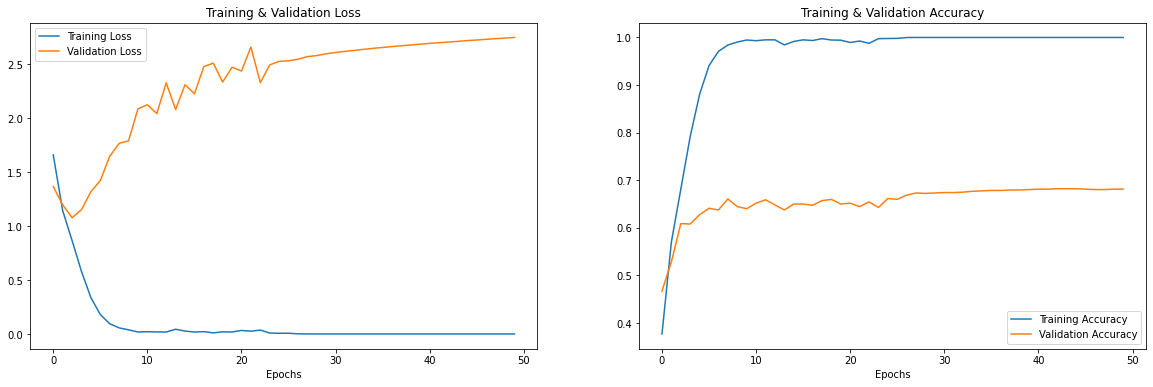

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


9/9 [==============================] - 1s 36ms/step


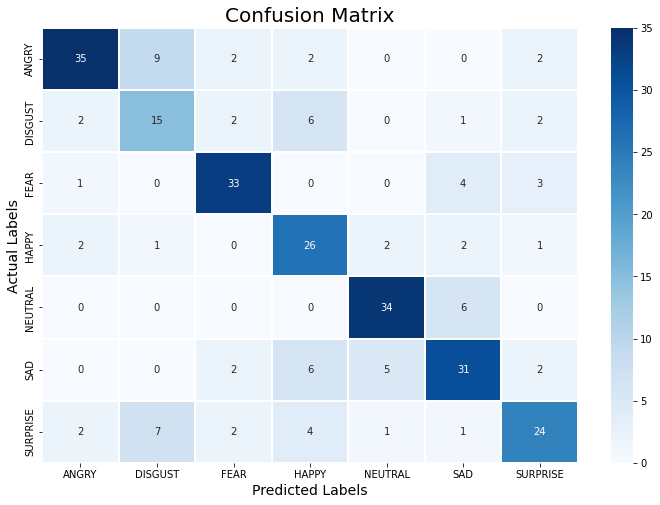

              precision    recall  f1-score   support

       ANGRY       0.83      0.70      0.76        50
     DISGUST       0.47      0.54      0.50        28
        FEAR       0.80      0.80      0.80        41
       HAPPY       0.59      0.76      0.67        34
     NEUTRAL       0.81      0.85      0.83        40
         SAD       0.69      0.67      0.68        46
    SURPRISE       0.71      0.59      0.64        41

    accuracy                           0.71       280
   macro avg       0.70      0.70      0.70       280
weighted avg       0.72      0.71      0.71       280



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))